Vamos a realizar el analisis exploratorio de los datos para lo cual importare la libreria pandas

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Crearé un dataset a partir del csv penetracion1

In [95]:
df_pentracion_internet = pd.read_csv('../ETL/penetracion1.csv')

In [96]:
df_pentracion_internet

Año  Trimestre            Provincia  Accesos por cada 100 hogares
0    2022          4         Buenos Aires                         78.94
1    2022          4      Capital Federal                        122.73
2    2022          4            Catamarca                         65.77
3    2022          4                Chaco                         43.62
4    2022          4               Chubut                         85.57
..    ...        ...                  ...                           ...
859  2014          1           Santa Cruz                         28.94
860  2014          1             Santa Fe                         47.85
861  2014          1  Santiago Del Estero                         16.31
862  2014          1     Tierra Del Fuego                         63.97
863  2014          1              Tucumán                         33.42

[864 rows x 4 columns]

Veré la informacion del df_penetracion_internet para ver si hay nulos o no

In [4]:
df_pentracion_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Analizaré si hay duplicados 

In [5]:
duplicates = df_pentracion_internet.duplicated()
if duplicates.any():
    print("Hay filas duplicadas en el conjunto de datos:")
    print(df_pentracion_internet[duplicates])
else:
    print("No hay filas duplicadas en el conjunto de datos.")

No hay filas duplicadas en el conjunto de datos.


El dataset df_penetracion_internet nos muestra los accesos a Internet por provincia y nos inidca el trimestre y año al que pertenece la medición. Este dataset cuenta con 864 datos y 4 columnas. No posee nulos.No posee duplicados.Tiene 4 columnas:
- Año: Detalla el año al que pertenece la medición desde el 2014 a 2022.
- Trimestre: Detalla el trimestre al que pertenece la medición.
- Provincia: Nombre de la provincia de Argentina en la que se realizó la medición.
- Accesos por cada 100 hogares: Número de accesos al servicio de Internet fijo por cada 100 hogares. La medición de accesos a internet por cada 100 hogares es una forma de expresar la cantidad de hogares que tienen acceso a internet en relación con el total de hogares.

Vamos a analizar las variables categoricas. 

Voy a analizar la columna Año como una variable categorica y tomaré el promedio los accesos por cada 100 hogares por año

Cambio el tipo de de dato a Categorica de la columna Año 

In [6]:
df_pentracion_internet['Año']= df_pentracion_internet['Año'].astype('category')

Voy a realizar un grafico con el promedio de Acceso por cada 100 hogares por año

C:\Users\MI PC\AppData\Local\Temp\ipykernel_14444\1428640687.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df_pentracion_internet.groupby('Año')['Accesos por cada 100 hogares'].mean()


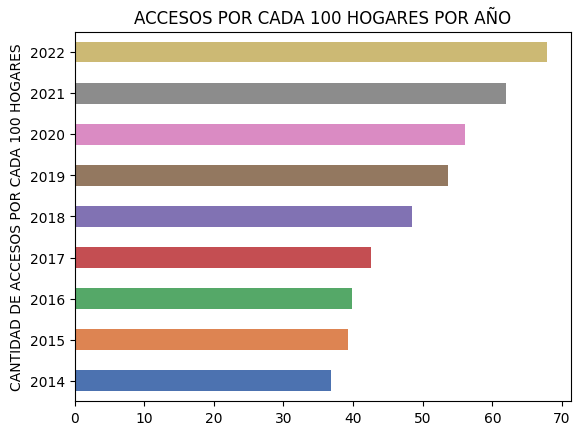

In [23]:
# Contamos el número de accesos por cada 100 hogares por año
counts = df_pentracion_internet.groupby('Año')['Accesos por cada 100 hogares'].mean()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje y
plt.ylabel('CANTIDAD DE ACCESOS POR CADA 100 HOGARES')

# Agregamos el título al gráfico
plt.title('ACCESOS POR CADA 100 HOGARES POR AÑO')

# Mostramos el gráfico
plt.show()

Este grafico de barras nos muestra el promedio por año de los accesos a Internet fijo por cada 100 hogares. En el año 2014 en promedio, el acceso a internet por cada 100 hogares es de 36.89, en el año 2017 en promedio el acceso a internet por cada 100 hogares es de 42.52 y el el año 2022 en promedio el acceso a internet por cada 100 hogares es de 67.82. 

Según un informe de Statista, desde finales de la década de los 90, Argentina se ha convertido en uno de los países con la mayor tasa de penetración de internet en América Latina.

El informe también señala que la penetración de Internet fijo en Argentina ha aumentado en un 1,3% en comparación con el mismo período de tiempo de 2021 2. Además, la penetración de Internet fija fue de 87,7% en 2023, lo que representa un aumento de 1,3 puntos porcentuales en comparación con el año anterior 2.

TRIMIESTRE

Voy a realizar un grafico por Trimestre de los Accesos por cada 100 hogares

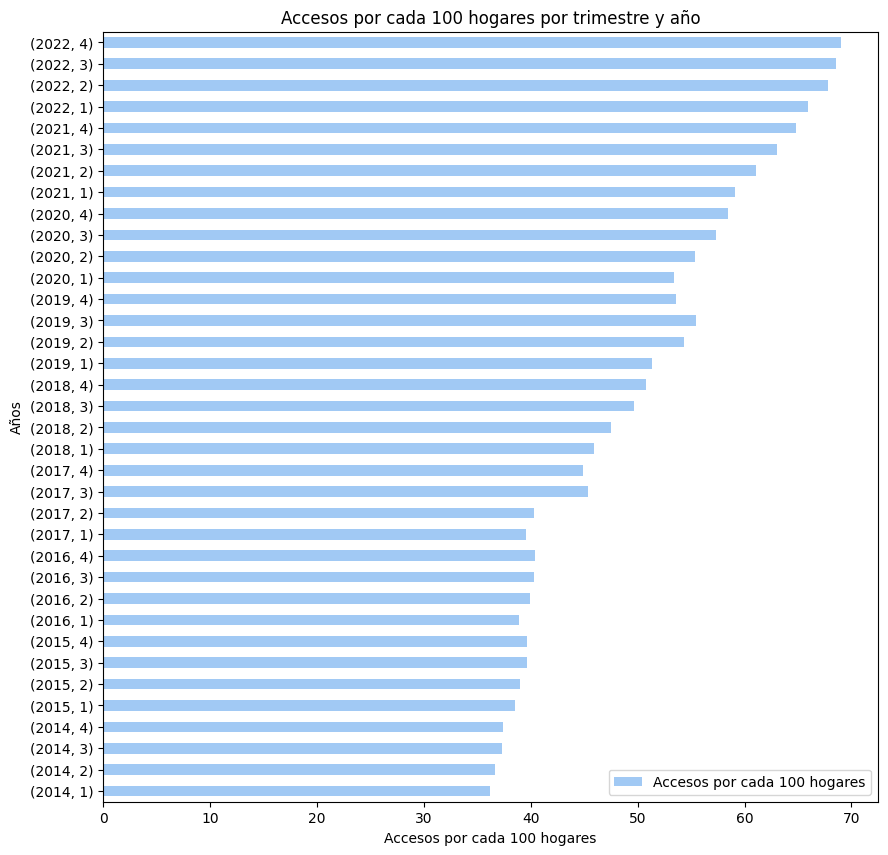

In [43]:
# Creamos una paleta de colores pastel
colores = sns.color_palette("pastel", n_colors=len(tabla_pivote))

# Grafica los datos con los colores correspondientes
tabla_pivote.plot(kind='barh', figsize=(10, 10), color=colores)

# Agrega el título al eje x
plt.xlabel('Accesos por cada 100 hogares')

# Agrega el título al eje y
plt.ylabel('Años')

# Agrega el título al gráfico
plt.title('Accesos por cada 100 hogares por trimestre y año')

# Muestra el gráfico
plt.show()

En este grafico podemos ver los accesos por cada 100 hogares teniendo en cuenta los trimestre de cada año. Por ejemplo en el año 2021 en el primer trimestre el acceso a internet por cada 100 hogares es de 59.07, el el segundo trimestre de 2021 el acceso a internet por cada 100 hogares es de 61.04 y en el ultimo trimestre del año 2022 el acceso a internet por cada 100 hogares es de 69.02.

PROVINCIA

Voy a realizar un grafico de los Accesos por cada 100 hogares por provincia

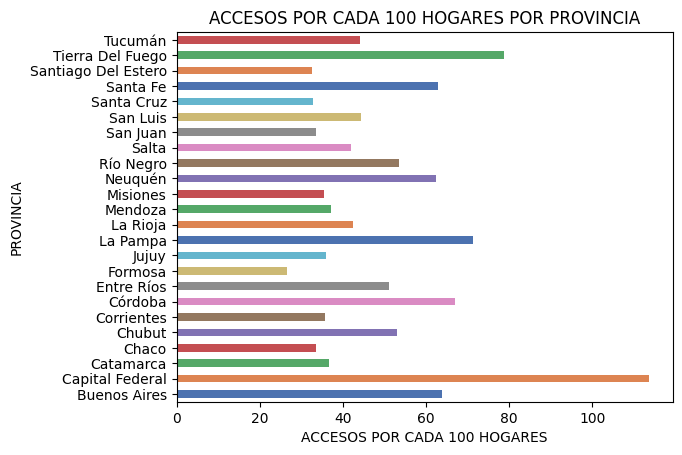

In [36]:
promedio_por_provincia = df_pentracion_internet.groupby('Provincia')['Accesos por cada 100 hogares'].mean()

# Crea una paleta de colores pastel
colores = sns.color_palette("deep", n_colors=len(promedio_por_provincia))

# Grafica los datos con los colores correspondientes
promedio_por_provincia.plot(kind='barh', color=colores)

# Agrega el título al eje x
plt.xlabel('ACCESOS POR CADA 100 HOGARES')

# Agrega el título al eje y
plt.ylabel('PROVINCIA')

# Agrega el título al gráfico
plt.title('ACCESOS POR CADA 100 HOGARES POR PROVINCIA')

# Muestra el gráfico
plt.show()

Este grafico nos muestra promedio de los accesos a Internet fijo por cada 100 hogares por provincia. En Tucumán el promedio de accesos a Internet por cada 100 hogares es de 44.12. El mayor promedio de acceso a Internet por cada 100 hogares se produje en Capital Federal y es de 113.69 y en Chubut el promedio de accesos a Internet por cada 100 hogares es de 53.11.

Voy a realizar el analisis estadístico de la variable numérica 

ACCESOS POR CADA 100 HOGARES

In [5]:
df_pentracion_internet['Accesos por cada 100 hogares'].describe()

count    864.000000
mean      49.620301
std       23.319150
min        9.350000
25%       32.220000
50%       46.390000
75%       62.442500
max      124.060000
Name: Accesos por cada 100 hogares, dtype: float64

La columna Accesos por cada 100 hogares tiene 864 datos. El promedio de Accesos por cada 100 hogares es de 49.62. La desviación estandar de los Accesos por cada 100 hogares es de 23.31. El minimo de accesos por cada 100 hogares es de 9.35 Y el máximo de accesos por cada 100 hogares es de 124.06. El 25% de los accesos por cada 100 hogares toma como valor máximo 32.22 y el 75% de los accesos por cada 100 hogares toma como valor máximo 62.44.

HISTOGRAMA DE LOS ACCESOS POR CADA 100 HOGARES

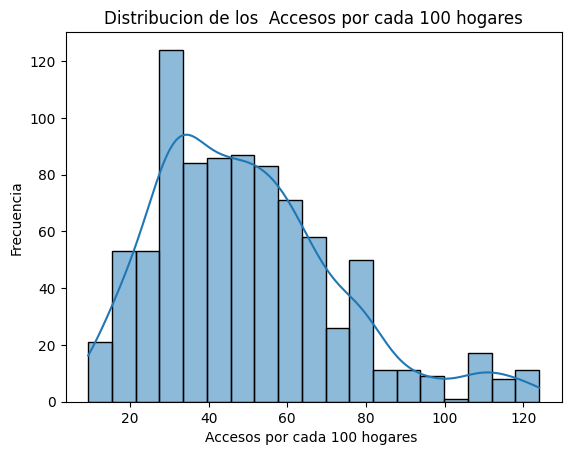

In [5]:
sns.histplot(df_pentracion_internet, x="Accesos por cada 100 hogares", kde=True)
plt.xlabel('Accesos por cada 100 hogares ')
plt.ylabel('Frecuencia')
plt.title('Distribucion de los  Accesos por cada 100 hogares')
plt.show()

In [5]:
#Calcularé la media de Accesos por cada 100 hogares
media = df_pentracion_internet['Accesos por cada 100 hogares'].mean()
media
# Cabe aclarar que este dato de la media de los accesos a Internet por cada 100 hogares ya se lo habia mostrado anteriormente cuando se realizo el analisis 
#estadístico con la función describe().  

49.62030092592593

In [6]:
# Calcular la mediana de la columna Accesos por cada 100 hogares
mediana = df_pentracion_internet['Accesos por cada 100 hogares'].median()
mediana

46.39

En el histograma de vemos que la columna Accesos por cada 100 hogares muestra una distribución asimétrica positiva. También lo hemos comprobado al calcular la media y la mediana. Ya que la media es mayor a la mediana.

DIAGRAMA DE CAJA DE ACCESOS POR CADA 100 HOGARES

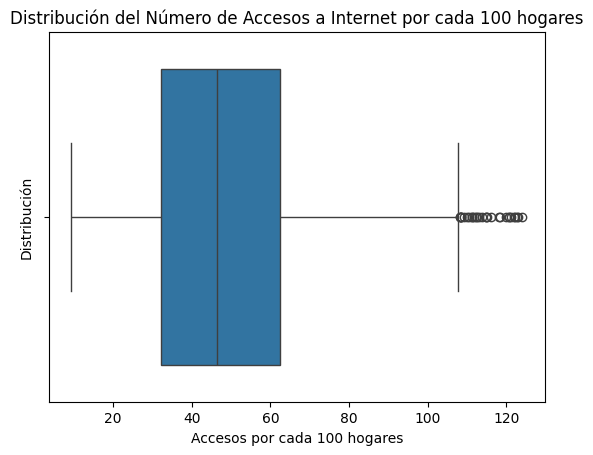

In [15]:
sns.boxplot(x=df_pentracion_internet['Accesos por cada 100 hogares'])
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Distribución')
plt.title('Distribución del Número de Accesos a Internet por cada 100 hogares')
plt.show()

Este grafico de caja muestra la distribución de los datos de los accesos por cada 100 hogares. En este gráfico vemos que la línea que está dentro de caja representa la mediana. Hay valores atipicos en los datos de accesos por cada 100 hogares ya que fuera del rango intercuartílico hay valores que se muestran como puntos individuales en el diagrama.

GRAFICO DE DISPERSION

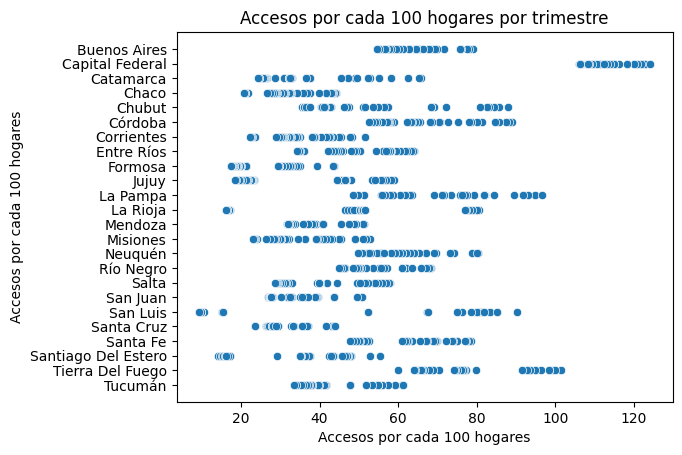

In [9]:
# Crea el gráfico de dispersión
sns.scatterplot(y='Provincia', x='Accesos por cada 100 hogares', data=df_pentracion_internet)

# Agrega el título al eje y
plt.ylabel('Accesos por cada 100 hogares')

# Agrega el título al gráfico
plt.title('Accesos por cada 100 hogares por trimestre')

# Muestra el gráfico
plt.show()

Este es un gráfico de dispersión que muestra la cantidad de accesos a Internet por cada 100 hogares para cada provincia de Argentina. El eje X representa el número de accesos a Internet por cada 100 hogares y el eje Y representa las provincias. Los puntos de datos son círculos azules. Los puntos de datos están dispersos en todo el gráfico y algunas provincias tienen más acceso a Internet que otras.

MAPA DE CALOR

Realizaré un mapa de calor teniendo en cuenta el acceso por cada 100 hogares por trimestres y por provinca

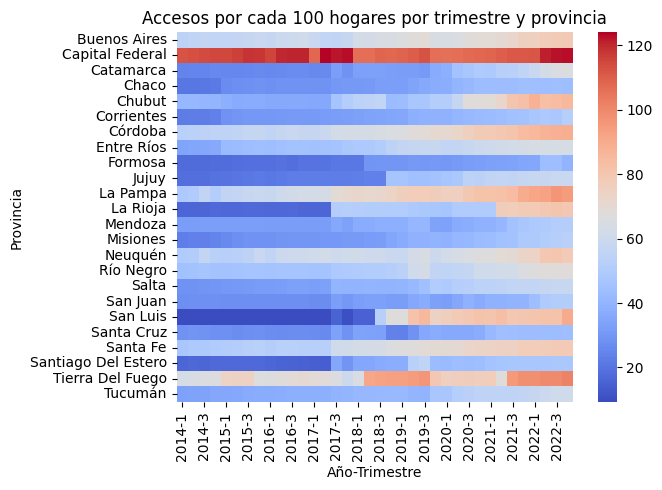

In [18]:
# Crea una tabla pivote con los accesos por cada 100 hogares por trimestre y provincia
tabla_pivote = pd.pivot_table(df_pentracion_internet, values='Accesos por cada 100 hogares', index=['Provincia'], columns=['Año', 'Trimestre'])

# Crea el mapa de calor
sns.heatmap(tabla_pivote, cmap='coolwarm')

#Agrega el titulo al eje y
plt.ylabel('Provincia')

# Agrega el título al gráfico
plt.title('Accesos por cada 100 hogares por trimestre y provincia')

# Muestra el gráfico
plt.show()

Este mapa de calor muestra la cantidad de accesos a Internet por cada 100 hogares para cada provincia de Argentina desde 2014 hasta 2022. El eje X representa el año y el trimestre, y el eje Y representa las provincias de Argentina. El color del mapa de calor varía de azul a rojo, con el azul representando un menor acceso a Internet y el rojo representando un mayor acceso a Internet. Las provincias con el mayor acceso a Internet son Buenos Aires, Capital Federal y Córdoba, mientras que las provincias con el menor acceso son Formosa, La Pampa y Santiago del Estero.

Voy a crear otro Dataframe a partir de un csv internet_penetración.csv.


In [58]:
df_penetracion_internet_hab= pd.read_csv('../ETL/penetracion2.csv')

In [59]:
df_penetracion_internet_hab

Año  Trimestre  Accesos por cada 100 hogares  Accesos por cada 100 hab  \
0   2022          4                         77.21                     24.15   
1   2022          3                         76.64                     23.95   
2   2022          2                         75.97                     23.72   
3   2022          1                         73.88                     23.05   
4   2021          4                         73.18                     22.81   
5   2021          3                         70.58                     21.98   
6   2021          2                         69.24                     21.55   
7   2021          1                         67.95                     21.13   
8   2020          4                         67.62                     21.01   
9   2020          3                         66.31                     20.59   
10  2020          2                         64.21                     19.92   
11  2020          1                         62.86                     19.48   
12  2019          4                         62.92                     19.49   
13  2019          3                         65.79                     20.36   
14  2019          2                         64.53                     19.96   
15  2019          1                         62.48                     19.31   
16  2018          4                         61.42                     18.97   
17  2018          3                         60.69                     18.73   
18  2018          2                         59.16                     18.24   
19  2018          1                         58.82                     18.12   
20  2017          4                         57.78                     17.79   
21  2017          3                         56.90                     17.51   
22  2017          2                         54.90                     16.88   
23  2017          1                         54.16                     16.64   
24  2016          4                         53.94                     16.56   
25  2016          3                         53.73                     16.50   
26  2016          2                         53.34                     16.37   
27  2016          1                         51.85                     15.90   
28  2015          4                         52.63                     16.12   
29  2015          3                         52.46                     16.05   
30  2015          2                         51.76                     15.82   
31  2015          1                         51.36                     15.68   
32  2014          4                         50.50                     15.39   
33  2014          3                         50.67                     15.43   
34  2014          2                         49.86                     15.16   
35  2014          1                         49.55                     15.05   

          Periodo  
0    Oct-Dic 2022  
1   Jul-Sept 2022  
2    Abr-Jun 2022  
3    Ene-Mar 2022  
4    Oct-Dic 2021  
5   Jul-Sept 2021  
6    Abr-Jun 2021  
7    Ene-Mar 2021  
8    Oct-Dic 2020  
9   Jul-Sept 2020  
10   Abr-Jun 2020  
11   Ene-Mar 2020  
12   Oct-Dic 2019  
13  Jul-Sept 2019  
14   Abr-Jun 2019  
15   Ene-Mar 2019  
16   Oct-Dic 2018  
17  Jul-Sept 2018  
18   Abr-Jun 2018  
19   Ene-Mar 2018  
20   Oct-Dic 2017  
21  Jul-Sept 2017  
22   Abr-Jun 2017  
23   Ene-Mar 2017  
24   Oct-Dic 2016  
25  Jul-Sept 2016  
26   Abr-Jun 2016  
27   Ene-Mar 2016  
28   Oct-Dic 2015  
29  Jul-Sept 2015  
30   Abr-Jun 2015  
31   Ene-Mar 2015  
32   Oct-Dic 2014  
33  Jul-Sept 2014  
34   Abr-Jun 2014  
35   Ene-Mar 2014

Voy a ver la información para saber si hay nulos o no

In [60]:
df_penetracion_internet_hab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           36 non-null     int64  
 1   Trimestre                     36 non-null     int64  
 2   Accesos por cada 100 hogares  36 non-null     float64
 3   Accesos por cada 100 hab      36 non-null     float64
 4   Periodo                       36 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


Analizaré si hay o no duplicados

In [50]:
duplicates = df_penetracion_internet_hab.duplicated()
if duplicates.any():
    print("Hay filas duplicadas en el conjunto de datos:")
    print(df_penetracion_internet_hab[duplicates])
else:
    print("No hay filas duplicadas en el conjunto de datos.")

No hay filas duplicadas en el conjunto de datos.


El dataset df_penetracion_internet_hab nos muestra los accesos a Internet por cada 100 hogares y los accesos por cada 100 habitantes y nos inidca el trimestre y año al que pertenece la medición. Este dataset cuenta con 36 datos y 5 columnas. No posee nulos.No posee duplicados.Realizaré un detalle de las columnas:
- Año: Detalla el año al que pertenece la medición desde el 2014 a 2022.
- Trimestre: Detalla el trimestre al que pertenece la medición.
- Accesos por cada 100 hogares: Número de accesos al servicio de Internet fijo por cada 100 hogares. La medición de accesos a internet por cada 100 hogares es una forma de expresar la cantidad de hogares que tienen acceso a internet en relación con el total de hogares.
- Accesos por cada 100 habitantes: es un indicador que mide el número de conexiones de Internet fijo por cada 100 habitantes en un país o región en este caso Argentina. Este indicador se utiliza para medir la penetración de Internet en una población determinada y se expresa como un porcentaje.

Voy a realizar el analisis de las variables categoricas

Al Año lo vamos a ver como una variable categorica y tendremos en cuenta los Accesos por cada 100 hogares por año

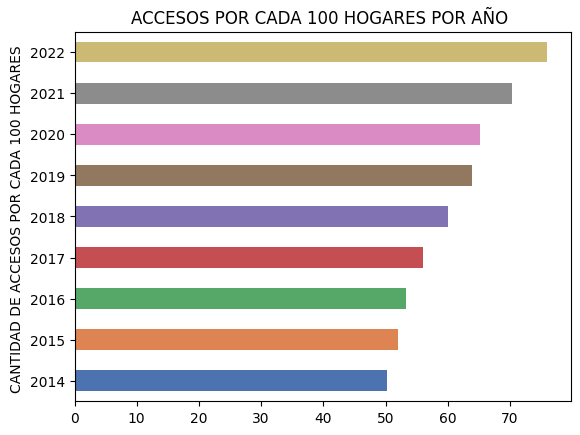

In [61]:
#Contaré el numero de Accesos por cada 100 hogares por año
counts = df_penetracion_internet_hab.groupby('Año')['Accesos por cada 100 hogares'].mean()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje y
plt.ylabel('CANTIDAD DE ACCESOS POR CADA 100 HOGARES ')

#Agrego el título al grafico
plt.title('ACCESOS POR CADA 100 HOGARES POR AÑO ')

#Muestro el grafico
plt.show()

Este grafico nos muestra los accesos a Internet por cada 100 hogares por año. En el 2014 los accesos a Internet por cada 100 hogares era de 50.14 y en el 2015 los accesos a Internet por cada 100 hogares era de 52.05. Y en el año 2021 el acceso a internet por cada 100 hogares era de 70.23.

Vamos a tomar en cuenta los accesos a Internet por cada 100 habitantes por año

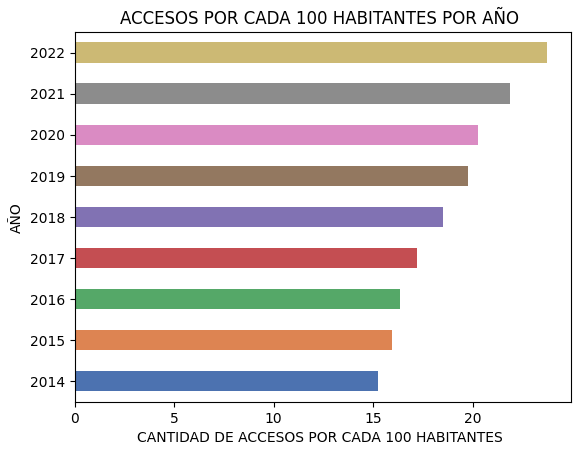

In [62]:
#Contaré el numero de Accesos por cada 100 hogares por año
counts = df_penetracion_internet_hab.groupby('Año')['Accesos por cada 100 hab'].mean()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje y
plt.xlabel('CANTIDAD DE ACCESOS POR CADA 100 HABITANTES ')

# Agrego el título al eje x
plt.ylabel('AÑO')

#Agrego el título al grafico
plt.title('ACCESOS POR CADA 100 HABITANTES POR AÑO ')

#Muestro el grafico
plt.show()

Este grafico nos muestra los accesos a Internet por cada 100 habitantes. En el año 2014 los accesos a Internet por cada 100 habitantes son de 15.25, en el año 2018 los accesos a Internet por cada 100 habitantes son de 18.51 y en el año 2022 los accesos a Internet por cada 100 habitantes son de 23.71.

Voy a realizar un grafico de los Accesos a Internet por cada 100 hogares por trimestre

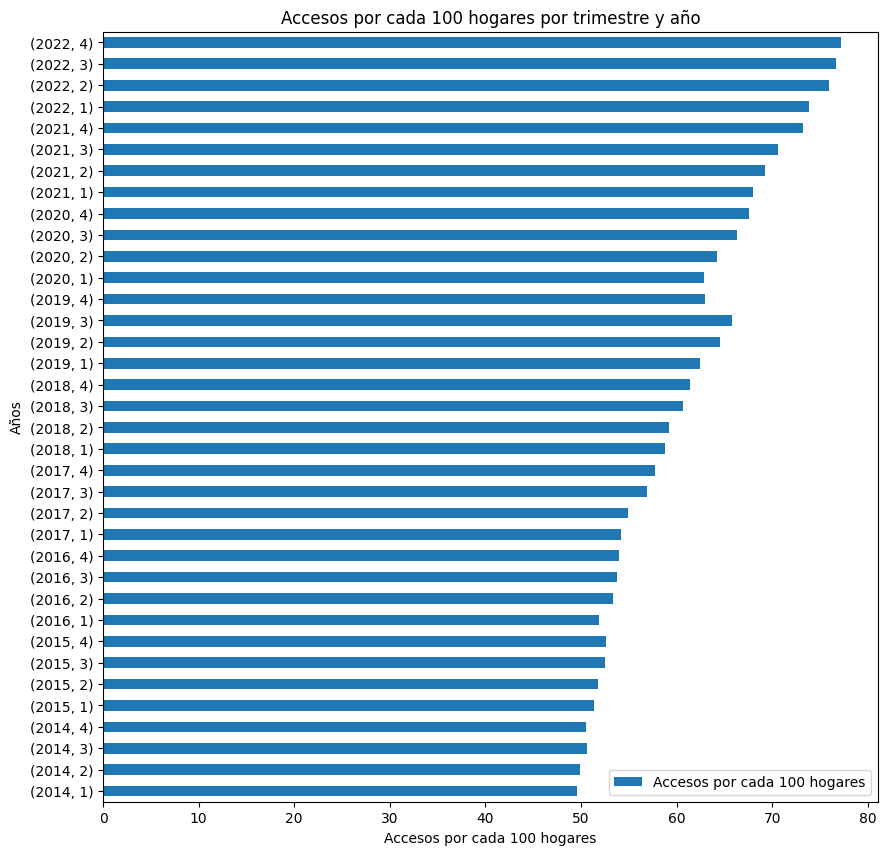

In [61]:
# Crea una tabla pivote con los accesos por cada 100 hogares por trimestre y año
tabla_pivote = pd.pivot_table(df_penetracion_internet_hab, values='Accesos por cada 100 hogares', index=['Año', 'Trimestre'])

# Grafica los datos
tabla_pivote.plot(kind='barh', figsize=(10, 10))

# Agrega el título al eje x
plt.xlabel('Accesos por cada 100 hogares')

# Agrega el título al eje y
plt.ylabel('Años')

# Agrega el título al gráfico
plt.title('Accesos por cada 100 hogares por trimestre y año')

# Muestra el gráfico
plt.show()

En este grafico vemos los accesos a Internet por cada 100 hogares por trimestre. En el primer trimestre del año 2018 el acceso a internet por cada 100 hogares fue de 58.82, en el segundo trimestre del año 2020 el acceso a Internet por cada 100 hogares fue de 64.21 y en el tercer trimestre del año 2022 el acceso a internet fue de 76.64.

Voy a realizar el analisis de los accesos a internet por cada 100 habitantes por trimestre

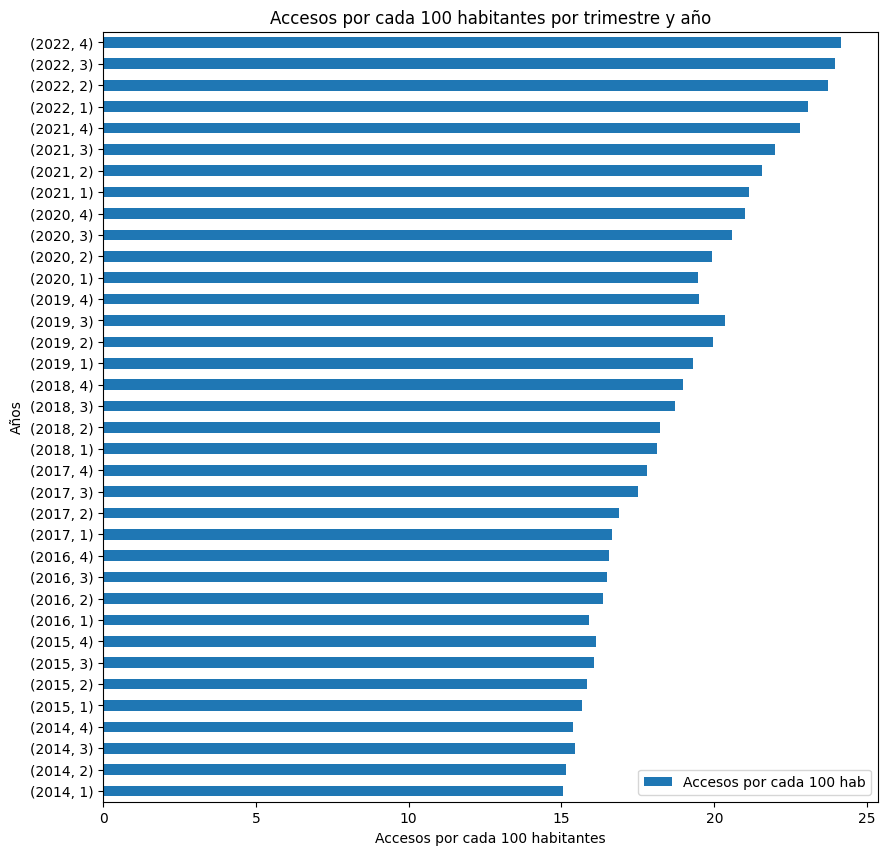

In [64]:
# Crea una tabla pivote con los accesos por cada 100 hogares por trimestre y año
tabla_pivote = pd.pivot_table(df_penetracion_internet_hab, values='Accesos por cada 100 hab', index=['Año', 'Trimestre'])

# Grafica los datos
tabla_pivote.plot(kind='barh', figsize=(10, 10))

# Agrega el título al eje x
plt.xlabel('Accesos por cada 100 habitantes')

# Agrega el título al eje y
plt.ylabel('Años')

# Agrega el título al gráfico
plt.title('Accesos por cada 100 habitantes por trimestre y año')

# Muestra el gráfico
plt.show()

En este grafico vemos los accesos a Internet por cada 100 habitantes por trimestre y por año. En tercer trimestre del año 2019, los accesos a Internet por cada 100 habitantes fue de 20.36, en el segundo trimestre del año 2020, los accesos a internet por cada 100 habitantes fue de 19.92 y en el cuarto trimestre del año 2022, los accesos a Internet por cada 100 habitantes fueron de 24.15. 

Voy a realizar el analisis estadistico de las variables numericas

ACCESOS POR CADA 100 HOGARES

In [66]:
df_penetracion_internet_hab['Accesos por cada 100 hogares'].describe()

count    36.000000
mean     60.745833
std       8.513140
min      49.550000
25%      53.162500
50%      59.925000
75%      66.637500
max      77.210000
Name: Accesos por cada 100 hogares, dtype: float64

Esta columna nos muestra los accesos por cada 100 hogares y cuenta con 36 datos. La media de accesos por cada 100 hogares es de 60.74 y la desviación estandar es de 8.51. El minimo accesos por cada 100 hogares es de 49..5 y el máximo acceso por cada 100 hogares es de 77.21. El 25% de los accesos por cada 100 hogares toma como valor máximo 66.63 y el 75% de los accesos por cada 100 hogares toma como valor máximo el 66.63.

HISTOGRAMA DE ACCESOS POR CADA 100 HOGARES

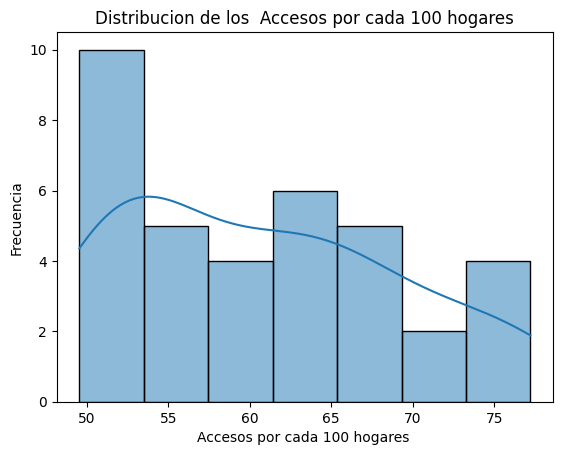

In [67]:
sns.histplot(df_penetracion_internet_hab, x="Accesos por cada 100 hogares", kde=True)
plt.xlabel('Accesos por cada 100 hogares ')
plt.ylabel('Frecuencia')
plt.title('Distribucion de los  Accesos por cada 100 hogares')
plt.show()

In [69]:
#Calcularé la media de Accesos por cada 100 hogares
media = df_pentracion_internet['Accesos por cada 100 hogares'].mean()
media
# Cabe aclarar que este dato de la media de los Accesos por cada 100 hogares ya se lo habia mostrado anteriormente cuando se realizo el analisis 
#estadístico con la función describe().  

49.12152777777778

In [70]:
# Calcular la mediana de la columna Accesos por cada 100 hogares
mediana = df_pentracion_internet['Accesos por cada 100 hogares'].median()
mediana

46.0

En el histograma de vemos que la columna Accesos por cada 100 hogares muestra una distribución asimétrica positiva. También lo hemos comprobado al calcular la media y la mediana. Ya que la media es mayor a la mediana.

DIAGRAMA DE CAJA DE ACCESOS POR CADA 100 HOGARES

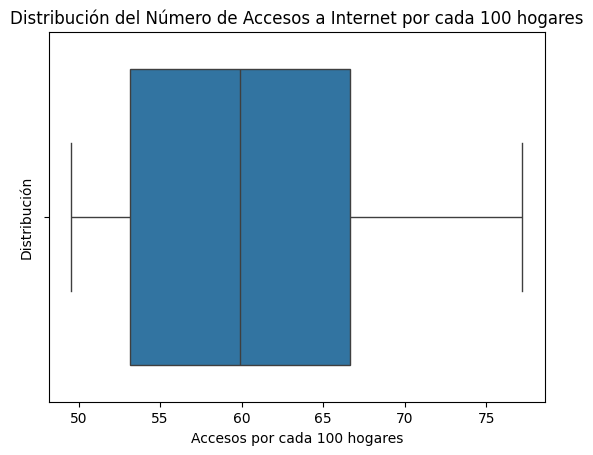

In [71]:
sns.boxplot(x=df_penetracion_internet_hab['Accesos por cada 100 hogares'])
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Distribución')
plt.title('Distribución del Número de Accesos a Internet por cada 100 hogares')
plt.show()

Este gráfico de caja nos muestra los accesos a internet por cada 100 hogares. La linea que esta dentro de la caja es la mediana. Y no hay outliers porque no ven puntos fuera del rango intercuartilico.

GRAFICO DE DISPERSION DEL ACCESOS POR CADA 100 HOGARES

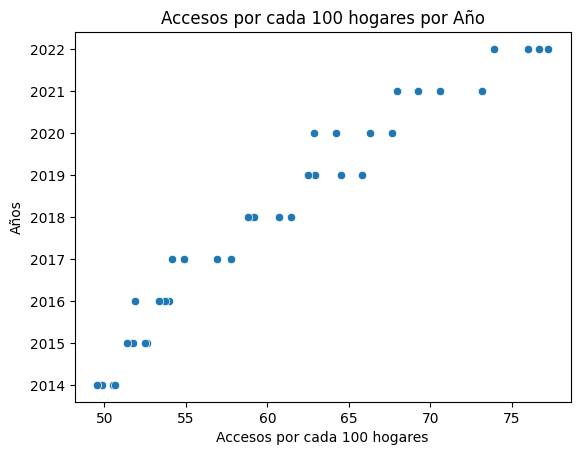

In [75]:
# Crea el gráfico de dispersión
sns.scatterplot(y='Año', x='Accesos por cada 100 hogares', data=df_penetracion_internet_hab)

# Agrega el título al eje y
plt.ylabel('Años')

# Agrega el título al gráfico
plt.title('Accesos por cada 100 hogares por Año')

# Muestra el gráfico
plt.show()

Este es un gráfico de dispersión que muestra la cantidad de accesos a Internet por cada 100 hogares en Argentina para cada año desde 2014 hasta 2022. El eje X representa el número de accesos a Internet por cada 100 hogares y el eje Y representa los años. Los puntos de datos son círculos azules. El gráfico sugiere que la cantidad de accesos a Internet por cada 100 hogares ha aumentado de manera constante en Argentina desde 2014

MAPA DE CALOR 

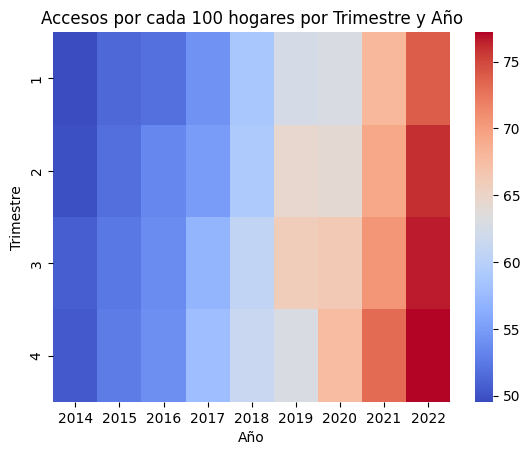

In [81]:
# Crea una tabla pivote con los accesos por cada 100 hogares por trimestre y año
tabla_pivote = pd.pivot_table(df_penetracion_internet_hab, values='Accesos por cada 100 hogares', index=['Trimestre'], columns=['Año'])

# Crea el mapa de calor
sns.heatmap(tabla_pivote, cmap='coolwarm')

# Agrega el título al gráfico
plt.title('Accesos por cada 100 hogares por Trimestre y Año')

# Muestra el gráfico
plt.show()

Este mapa de calor nos muestra los accesos por cada 100 hogares por trimestre y por año. El color rojo representa los periodos con mayor accesos a Internet por cada 100 hogares y mientras que el celeste nos muestra los periodos con el menor acceso a internet.
El año 2014 tiene aproximadamente 54% de accesos a internet por cada 100 hogares y el año 2022 tiene aproximadamente en el cuarto trimestre 75% de  accesos a internet por cada 100 hogares.

ACCESOS POR CADA 100 HABITANTES

In [82]:
df_penetracion_internet_hab['Accesos por cada 100 hab'].describe()

count    36.000000
mean     18.760278
std       2.782531
min      15.050000
25%      16.307500
50%      18.485000
75%      20.695000
max      24.150000
Name: Accesos por cada 100 hab, dtype: float64

La columna Accesos por cada 100 hab nos muestra el acceso a Internet por cada 100 habitantes y es un indicador que mide el número de conexiones de Internet fijo por cada 100 habitantes en Argentina. Tiene 36 datos. El promedio de accesos a internet por cada 100 habitantes es de 18.76. La desviación estandar de accesos a internet por cad 100 habitantes es de 2.78. El minimo de los accesos a internet por cada 100 habitantes es de 15.05. El máximo de los accesos por cada 100 habitantes es de 24.15. El 25% de los accesos a internet por cada 100 habitantes tiene como valor máximo 16.30 y el 75% de los accesos por cada 100 habitantes tiene como valor máximo 20.69.

HISTOGRAMA DE ACCESOS POR CADA 100 HABITANTES 

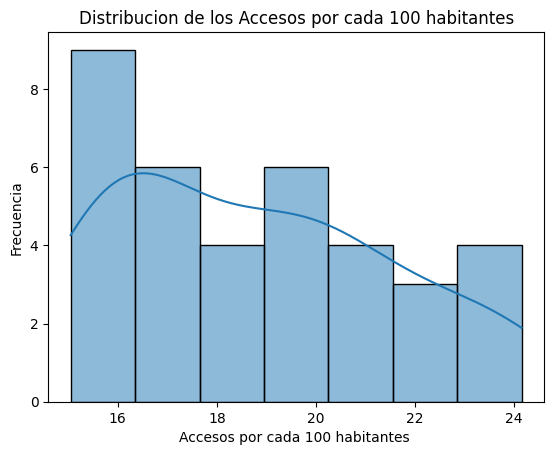

In [97]:
sns.histplot(df_penetracion_internet_hab, x="Accesos por cada 100 hab", kde=True)
plt.xlabel('Accesos por cada 100 habitantes ')
plt.ylabel('Frecuencia')
plt.title('Distribucion de los Accesos por cada 100 habitantes')
plt.show()

In [98]:
#Calcularé la media de Accesos por cada 100 hogares
media = df_penetracion_internet_hab['Accesos por cada 100 hab'].mean()
media
# Cabe aclarar que este dato de la media de los Accesos por cada 100 habitantes ya se lo habia mostrado anteriormente cuando se realizo el analisis 
#estadístico con la función describe().  

18.760277777777773

In [99]:
# Calcular la mediana de la columna Accesos por cada 100 habitantes
mediana = df_penetracion_internet_hab['Accesos por cada 100 hab'].median()
mediana

18.485

En el histograma de vemos que la columna Accesos por cada 100 habitantes muestra una distribución asimétrica positiva. También lo hemos comprobado al calcular la media y la mediana. Ya que la media es mayor a la mediana.

DIAGRAMA DE CAJA DE ACCESOS A INTERNET POR CADA 100 HABITANTES

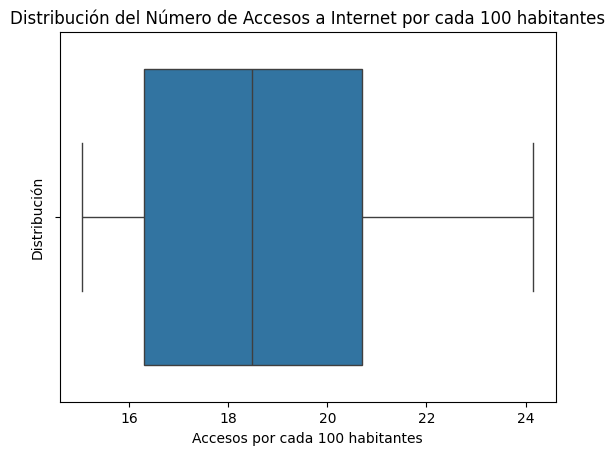

In [84]:
sns.boxplot(x=df_penetracion_internet_hab['Accesos por cada 100 hab'])
plt.xlabel('Accesos por cada 100 habitantes')
plt.ylabel('Distribución')
plt.title('Distribución del Número de Accesos a Internet por cada 100 habitantes')
plt.show()

Este gráfico de caja nos muestra los accesos a internet por cada 100 habitantes. La linea que esta dentro de la caja es la mediana. Y no hay outliers porque no ven puntos fuera del rango intercuartilico.

GRAFICO DE DISPERSION DE ACCESOS POR CADA 100 HABITANTES

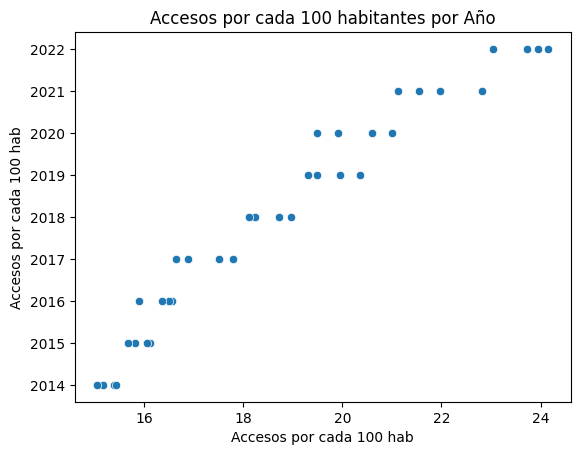

In [64]:
# Crea el gráfico de dispersión
sns.scatterplot(y='Año', x='Accesos por cada 100 hab', data=df_penetracion_internet_hab)

# Agrega el título al eje y
plt.ylabel('Accesos por cada 100 hab')

# Agrega el título al gráfico
plt.title('Accesos por cada 100 habitantes por Año')

# Muestra el gráfico
plt.show()

Este es un gráfico de dispersión que muestra la cantidad de accesos a Internet por cada 100 habitantes en Argentina para cada año desde 2014 hasta 2022. El eje X representa el número de accesos a Internet por cada 100 habitantes y el eje Y representa los años. Los puntos de datos son círculos azules. El gráfico sugiere que la cantidad de accesos a Internet por cada 100 habitantes ha aumentado de manera constante en Argentina desde 2014

MAPA DE CALOR

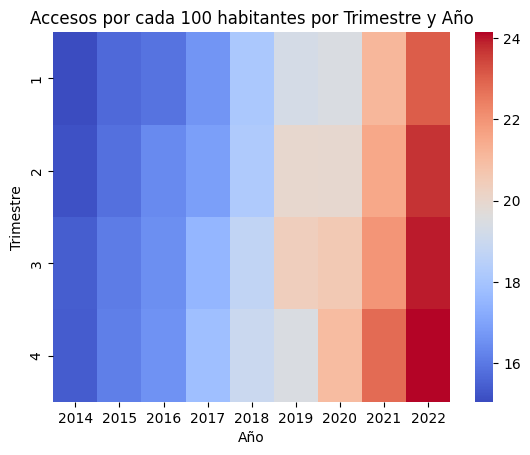

In [65]:
# Crea una tabla pivote con los accesos por cada 100 hogares por trimestre y año
tabla_pivote = pd.pivot_table(df_penetracion_internet_hab, values='Accesos por cada 100 hab', index=['Trimestre'], columns=['Año'])

# Crea el mapa de calor
sns.heatmap(tabla_pivote, cmap='coolwarm')

# Agrega el título al gráfico
plt.title('Accesos por cada 100 habitantes por Trimestre y Año')

# Muestra el gráfico
plt.show()

Este mapa de calor nos muestra los accesos por cada 100 habitantes por trimestre y por año. El color rojo representa los periodos con mayor accesos a Internet por cada 100 habitantes y mientras que el celeste nos muestra los periodos con el menor acceso a internet.
El año 2014 tiene aproximadamente 16% de accesos a internet por cada 100 habitantes y el año 2022 tiene aproximadamente en el cuarto trimestre el 24% de  accesos a internet por cada 100 habitantes.

Vamos a crear un dataframe a partir del csv Internet_BAF.csv

In [71]:
df_internet_BAF= pd.read_csv('../DATA/INTERNET/Internet_BAF.csv')

Vamos a ver el dataframe 

In [72]:
df_internet_BAF

Año  Trimestre  Banda ancha fija  Dial up  Total        Periodo
0   2022          4                11       12     11   Oct-Dic 2022
1   2022          3                11       12     11  Jul-Sept 2022
2   2022          2                11       12     11   Abr-Jun 2022
3   2022          1                11       13     11   Ene-Mar 2022
4   2021          4                10       13     10   Oct-Dic 2021
5   2021          3                10       10     10  Jul-Sept 2021
6   2021          2                10       10     10   Abr-Jun 2021
7   2021          1                10       10     10   Ene-Mar 2021
8   2020          4                10       10     10   Oct-Dic 2020
9   2020          3                 9       10      9  Jul-Sept 2020
10  2020          2                 9       10      9   Abr-Jun 2020
11  2020          1                 9       10      9   Ene-Mar 2020
12  2019          4                 9       10      9   Oct-Dic 2019
13  2019          3                 9       22      9  Jul-Sept 2019
14  2019          2                 9       22      9   Abr-Jun 2019
15  2019          1                 9       22      9   Ene-Mar 2019
16  2018          4                 8       22      8   Oct-Dic 2018
17  2018          3                 8       27      8  Jul-Sept 2018
18  2018          2                 8       27      8   Abr-Jun 2018
19  2018          1                 8       27      8   Ene-Mar 2018
20  2017          4                 8       27      8   Oct-Dic 2017
21  2017          3                 8       28      8  Jul-Sept 2017
22  2017          2                 7       29      7   Abr-Jun 2017
23  2017          1                 7       29      7   Ene-Mar 2017
24  2016          4                 7       29      7   Oct-Dic 2016
25  2016          3                 7       29      7  Jul-Sept 2016
26  2016          2                 7       32      7   Abr-Jun 2016
27  2016          1                 7       33      7   Ene-Mar 2016
28  2015          4                 7       33      7   Oct-Dic 2015
29  2015          3                 7       33      7  Jul-Sept 2015
30  2015          2                 7       33      7   Abr-Jun 2015
31  2015          1                 7       38      7   Ene-Mar 2015
32  2014          4                 7       39      7   Oct-Dic 2014
33  2014          3                 7       36      7  Jul-Sept 2014
34  2014          2                 6       36      6   Abr-Jun 2014
35  2014          1                 6       36      6   Ene-Mar 2014

Vamos a ver la informacion y sabremos si hay nulo o no

In [73]:
df_internet_BAF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               36 non-null     int64 
 1   Trimestre         36 non-null     int64 
 2   Banda ancha fija  36 non-null     int64 
 3   Dial up           36 non-null     int64 
 4   Total             36 non-null     int64 
 5   Periodo           36 non-null     object
dtypes: int64(5), object(1)
memory usage: 1.8+ KB


Vamos a analizar si tiene duplicados o no

In [74]:
duplicates = df_internet_BAF.duplicated()
if duplicates.any():
    print("Hay filas duplicadas en el conjunto de datos:")
    print(df_internet_BAF[duplicates])
else:
    print("No hay filas duplicadas en el conjunto de datos.")

No hay filas duplicadas en el conjunto de datos.


El dataframe df_internet_BAF contine informacion sobre el acceso a Internet en Argentina por trimestre desde los años 2014 a 2022. Tiene 36 filas, no posee nulos, ni duplicados. Tiene 6 columnas que las detallo a continuación:
- Año: Detalla el año al que pertenece la medición desde el 2014 a 2022.
- Trimestre: Detalla el trimestre al que pertenece la medición.
- Banada ancha fija: el número de conexiones de banda ancha fija.La banda ancha fija es una tecnología de conexión a Internet que utiliza una línea física para transmitir datos. Esta línea puede ser de cobre, fibra óptica o cable coaxial. Requiere que el usuario esté conectado a una línea física
- Dial up: el número de conexiones de dial-up. Dial-up es una tecnología de conexión a Internet que utiliza la línea telefónica para transmitir datos.
- Total: es el total de conexiones

Voy a proceder a realizar el analisis de las variables categoricas

AÑO

Las mediciones que tiene este dataframe se toman en intervalos de tiempo grandes, como trimestres o años por lo que me parece más apropiado tratar el año como una variable categórica.

Voy a ver por año las conexiones por banda ancha fija

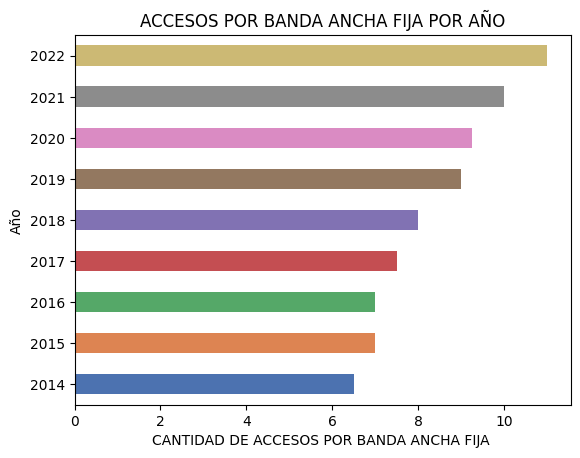

In [76]:
# Contamos el número de accesos por cada 100 hogares por año
counts = df_internet_BAF.groupby('Año')['Banda ancha fija'].mean()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje y
plt.xlabel('CANTIDAD DE ACCESOS POR BANDA ANCHA FIJA ')

# Agregamos el título al gráfico
plt.title('ACCESOS POR BANDA ANCHA FIJA POR AÑO')

# Mostramos el gráfico
plt.show()

Este grafico nos muestra el promedio de conexiones de banda ancha fija por año. En el año 2014 el promedio de conexiones de banda ancha fija era de 6.5. En el año 2018 en promedio habia 8 conexiones de banda ancha fija. Y en el año 2022 en promedio habia 11 conexiones de banda ancha fija. Este gráfico muestra una tendencia creciente en el número de conexiones de banda ancha fija a lo largo de los años. Esto sugiere que cada vez más hogares tienen acceso a Internet de alta velocidad. Además, el costo de la banda ancha fija y la banda ancha móvil ha disminuido con el tiempo, lo que ha hecho que estas tecnologías sean más accesibles para los consumidores.

Analizaré por año las conexiones Dial up

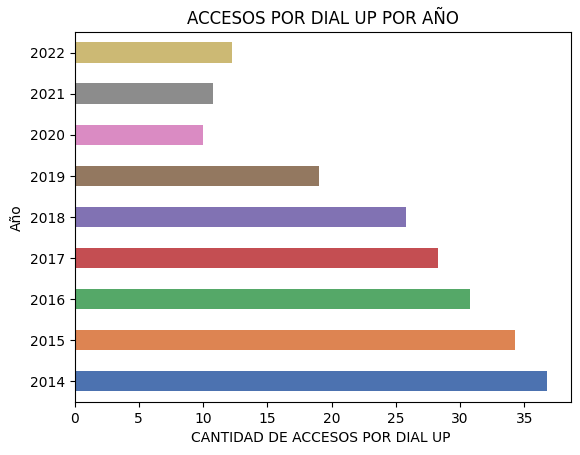

In [78]:
# Contamos el número de accesos por cada 100 hogares por año
counts = df_internet_BAF.groupby('Año')['Dial up'].mean()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje y
plt.xlabel('CANTIDAD DE ACCESOS POR DIAL UP ')

# Agregamos el título al gráfico
plt.title('ACCESOS POR DIAL UP POR AÑO')

# Mostramos el gráfico
plt.show()

Este grafico nos muestra el promedio de conexiones por dial up por año. En el año 2014 el promedio de conexiones por dial up era de 36.75. En el año 2017 en promedio habia  25.75 conexiones por dial up. Y en el año 2022 en promedio habia 12.25 conexiones por dial up. 
El número de conexiones de Dial-up ha disminuido con el tiempo debido a la aparición de tecnologías más rápidas y confiables, como la banda ancha fija y la banda ancha móvil. Dial-up es una tecnología que utiliza la línea telefónica para transmitir datos. Es significativamente más lento que la banda ancha fija y la banda ancha móvil, y también es menos confiable debido a la naturaleza de la línea telefónica.

TRIMESTRE

La variable TRIMESTRE tambien la voy a tomar como variable categorica ya que me parece mas apropiado 

Vamos a ver las conexiones por banda ancha fija por año

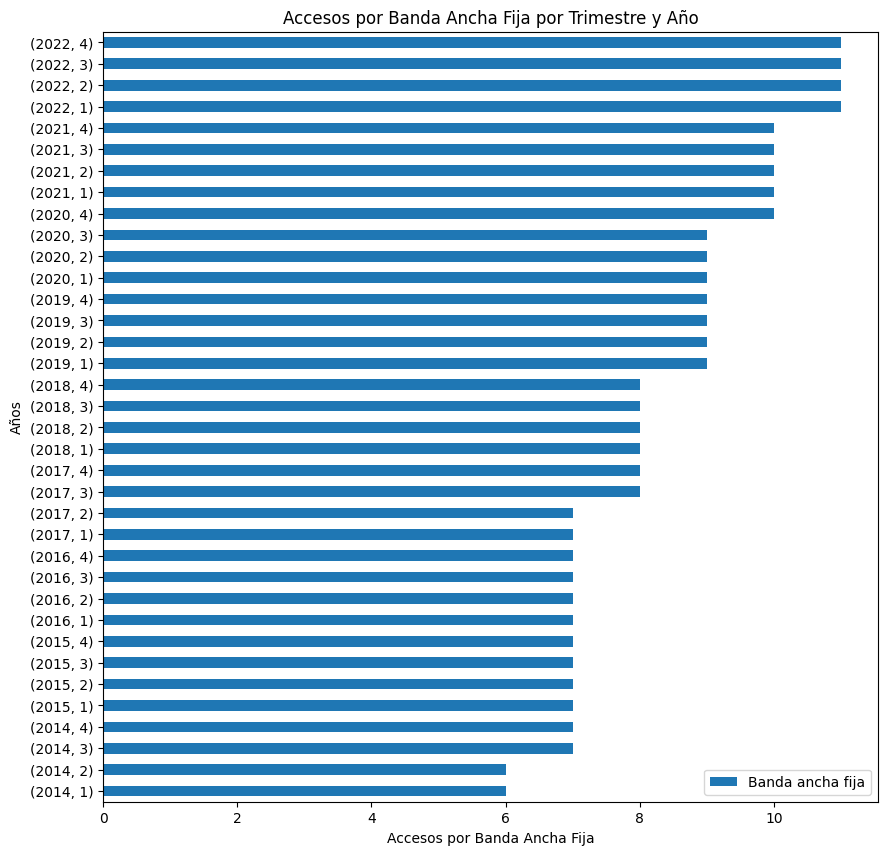

In [80]:
# Crea una tabla pivote con los accesos por cada 100 hogares por trimestre y año
tabla_pivote = pd.pivot_table(df_internet_BAF, values='Banda ancha fija', index=['Año', 'Trimestre'])

# Grafica los datos
tabla_pivote.plot(kind='barh', figsize=(10, 10))

# Agrega el título al eje x
plt.xlabel('Accesos por Banda Ancha Fija')

# Agrega el título al eje y
plt.ylabel('Años')

# Agrega el título al gráfico
plt.title('Accesos por Banda Ancha Fija por Trimestre y Año')

# Muestra el gráfico
plt.show()

Este grafico nos muestra las conexiones por banda ancha fija por trimestre. En el primer y segundo trimeste en promedio habia 6 conexiones por banda ancha fija. En el tercer y cuarto trimestre habia en promedio 7 conexiones por banda ancha fija. En los 4 trimestre del año 2021 hubo 10 conexiones por banda ancha fija. Y en los 4 trimestres del año 2022 hubo 11 conexiones por banda ancha fija.

Voy a analizar por trimestre las conexiones dial up

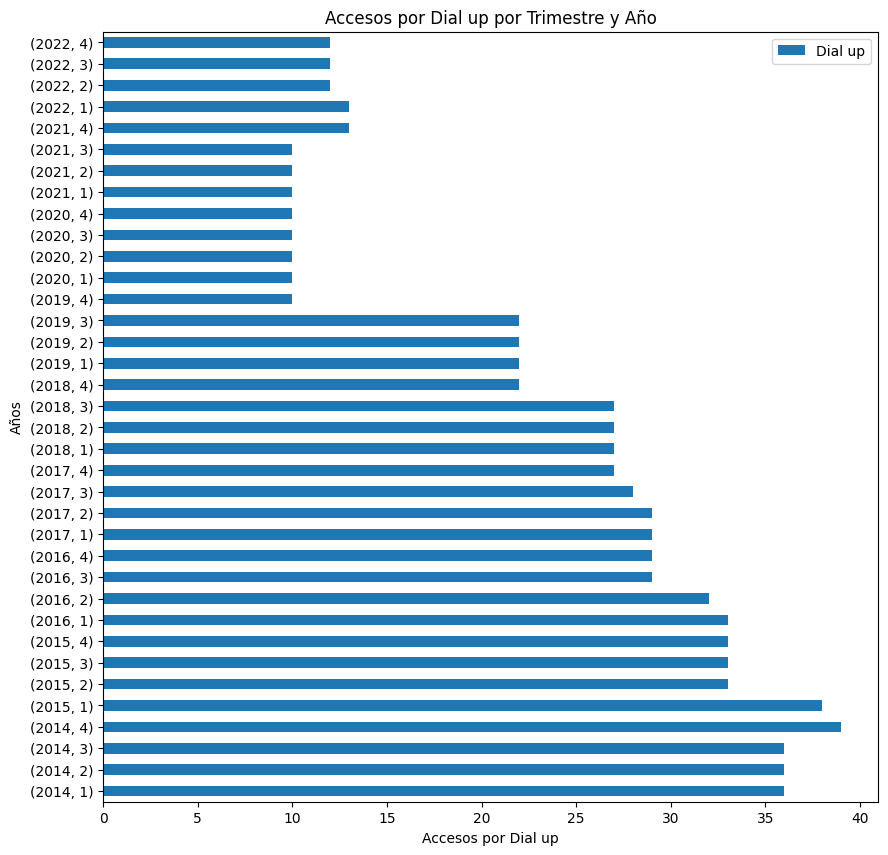

In [82]:
# Crea una tabla pivote con los accesos por cada 100 hogares por trimestre y año
tabla_pivote = pd.pivot_table(df_internet_BAF, values='Dial up', index=['Año', 'Trimestre'])

# Grafica los datos
tabla_pivote.plot(kind='barh', figsize=(10, 10))

# Agrega el título al eje x
plt.xlabel('Accesos por Dial up')

# Agrega el título al eje y
plt.ylabel('Años')

# Agrega el título al gráfico
plt.title('Accesos por Dial up por Trimestre y Año')

# Muestra el gráfico
plt.show()

Este grafico nos muestra las conexines por dial up por trimestre. En los tres primeros trimestre del año 2014 habia 36 conexiones por dial up. En el cuarto trimestre hubo 39 conexiones por dial up. En los 3 primeros trimestres del año 2021 hubo 10 conexiones por dial up y en el ultimo trimestre de 2021 hubo 13 conexiones por dial up

Voy a analizar las variables numericas

BANDA ANCHA FIJA

Voy a realizar el analisis estadistico de la variable banda ancha fija

In [84]:
df_internet_BAF['Banda ancha fija'].describe()

count    36.000000
mean      8.361111
std       1.495761
min       6.000000
25%       7.000000
50%       8.000000
75%       9.250000
max      11.000000
Name: Banda ancha fija, dtype: float64

En este dataframe la columna Banda ancha fija tiene 36 datos. El promedio es 8.36 conexiones de banda ancha fija. La desviacion estandar en los datos de conexiones de banda ancha fija es de 1.49. El minimo de conexiones de banda ancha fija es de 6 y el máximo de conexiones de banda ancha fija es de 11. El 25% de la conexiones de banda ancha fija tiene como valor máximo 7 y el 75% de las conexiones de banda ancha fija tiene como valor máximo 9.25.

HISTOGRAMA DE BANDA ANCHA FIJA

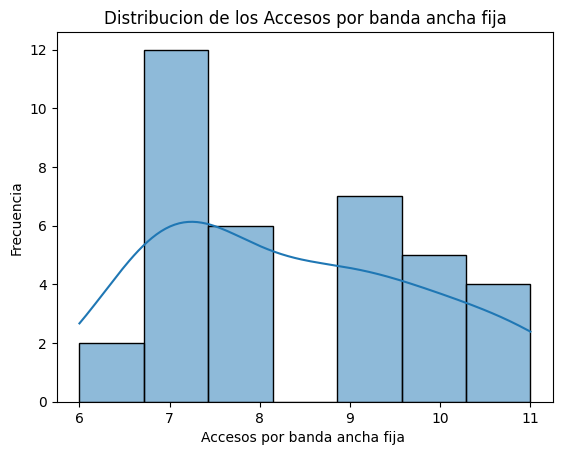

In [100]:
sns.histplot(df_internet_BAF, x="Banda ancha fija", kde=True)
plt.xlabel('Accesos por banda ancha fija ')
plt.ylabel('Frecuencia')
plt.title('Distribucion de los Accesos por banda ancha fija')
plt.show()

In [86]:
#Calcularé la media de Banda ancha fija
media = df_internet_BAF['Banda ancha fija'].mean()
media
# Cabe aclarar que este dato de la media de Banda ancha fija ya se lo habia mostrado anteriormente cuando se realizo el analisis 
#estadístico con la función describe().  

8.36111111111111

In [87]:
# Calcular la mediana de la columna Banda ancha fija
mediana = df_internet_BAF['Banda ancha fija'].median()
mediana

8.0

En el histograma de vemos que la columna Banda ancha fija muestra una distribución asimétrica positiva. También lo hemos comprobado al calcular la media y la mediana. Ya que la media es mayor a la mediana.

DIAGRAMA DE CAJA DE BANDA ANCHA FIJA

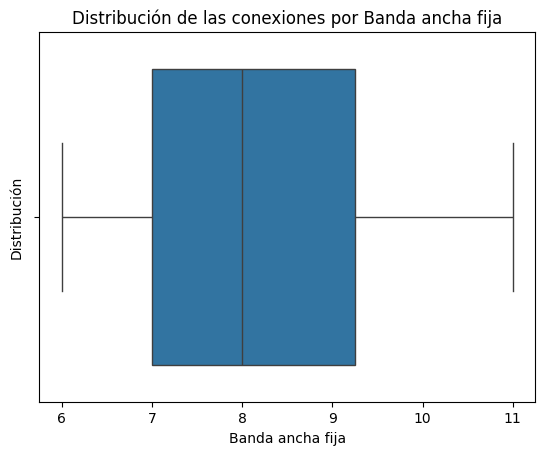

In [88]:
sns.boxplot(x=df_internet_BAF['Banda ancha fija'])
plt.xlabel('Banda ancha fija')
plt.ylabel('Distribución')
plt.title('Distribución de las conexiones por Banda ancha fija')
plt.show()

Este gráfico de caja nos muestra las conexiones por banda ancha fija. La linea que esta dentro de la caja es la mediana. Y no hay outliers porque no ven puntos fuera del rango intercuartilico.

GRAFICO DE DISPERSION 

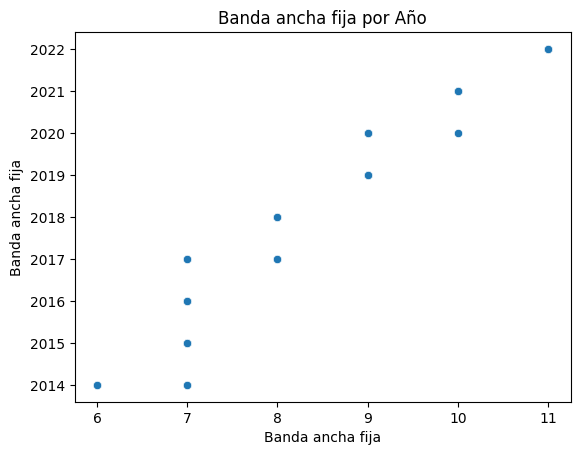

In [106]:
# Crea el gráfico de dispersión
sns.scatterplot(y='Año', x='Banda ancha fija', data=df_internet_BAF)
# Agrega el título al eje y
plt.ylabel('Banda ancha fija')

# Agrega el título al gráfico
plt.title('Banda ancha fija por Año')

# Muestra el gráfico
plt.show()

Este es un gráfico de dispersión que muestra las conexiones por banda ancha fija en Argentina para cada año desde 2014 hasta 2022. El eje X representa el número de accesos a Internet por banda ancha fija y el eje Y representa los años. Los puntos de datos son círculos azules. El gráfico sugiere que la cantidad de accesos a Internet por banda ancha fija ha aumentado en Argentina desde 2014.

MAPA DE CALOR

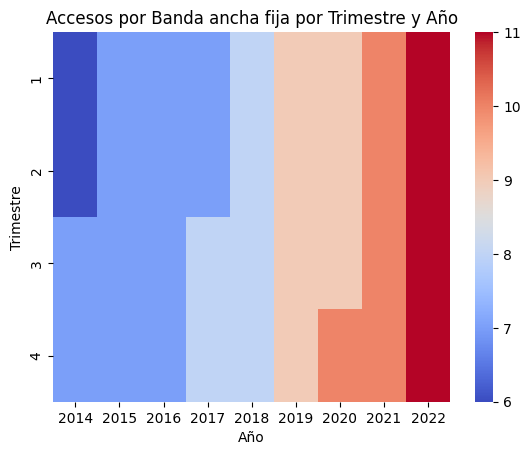

In [90]:
# Crea una tabla pivote con los accesos por cada 100 hogares por trimestre y año
tabla_pivote = pd.pivot_table(df_internet_BAF, values='Banda ancha fija', index=['Trimestre'], columns=['Año'])

# Crea el mapa de calor
sns.heatmap(tabla_pivote, cmap='coolwarm')

# Agrega el título al gráfico
plt.title('Accesos por Banda ancha fija por Trimestre y Año')

# Muestra el gráfico
plt.show()

Este mapa de calor nos muestra los accesos a internet por banda ancha fija por trimestre y por año. El color rojo representa los periodos con mayor accesos a Internet por banda ancha fija y mientras que el celeste nos muestra los periodos con el menor acceso a internet.
El año 2014 tiene aproximadamente 7 de accesos a internet por banda ancha fija y el año 2022 tiene aproximadamente 11 accesos a internet por banda ancha fija.

DIAL UP

Voy a realizar el analisis estadistico de Dial up

In [91]:
df_internet_BAF['Dial up'].describe()

count    36.000000
mean     23.083333
std      10.171037
min      10.000000
25%      12.000000
50%      27.000000
75%      32.250000
max      39.000000
Name: Dial up, dtype: float64

Esta columna del dataframe df_internet_BAF contiene los datos de los accesos a internet por dial up. Tiene 36 datos. El promedio es de 23.08 conexiones por dial up. La desviación estandar es de 10.17. La minima conexion por dial up fue de 10 y la máxima conexion por dial up fue de 39. El 25% de las conexiones por dial up tiene como valor máximo 12 y el 75% de las conexiones por dial up tiene como valor máximo 32.25.

HISTOGRAMA DE DIAL UP

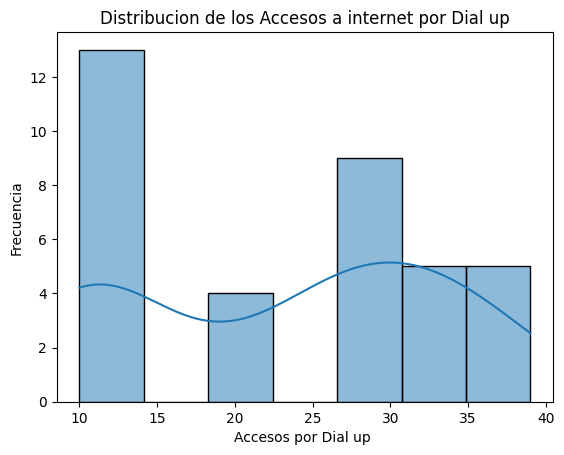

In [92]:
sns.histplot(df_internet_BAF, x="Dial up", kde=True)
plt.xlabel('Accesos por Dial up ')
plt.ylabel('Frecuencia')
plt.title('Distribucion de los Accesos a internet por Dial up')
plt.show()

In [103]:
#Calcularé la media de Dial up
media = df_internet_BAF['Dial up'].mean()
media
# Cabe aclarar que este dato de la media de Dial up ya se lo habia mostrado anteriormente cuando se realizo el analisis 
#estadístico con la función describe().  

23.083333333333332

In [104]:
# Calcular la mediana de la columna Dial up
mediana = df_internet_BAF['Dial up'].median()
mediana

27.0

Cuando la media es menor que la mediana, esto sugiere que la distribución de los datos está sesgada hacia la izquierda. En otras palabras, la mayoría de los valores se encuentran en el lado izquierdo de la distribución y hay pocos valores en el lado derecho.

DIAGRAMA DE CAJA DIAL UP

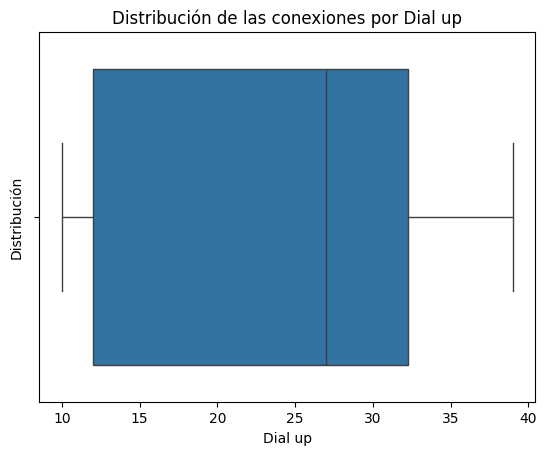

In [105]:
sns.boxplot(x=df_internet_BAF['Dial up'])
plt.xlabel('Dial up')
plt.ylabel('Distribución')
plt.title('Distribución de las conexiones por Dial up')
plt.show()

Este grafico nos muestra las conexiones a internet por dial up. La linea que esta dentro de la caja es la mediana. Y la mediana al encontrarse más cerca de un extremo que del otro significa que la distribución de los datos está sesgada hacia ese extremo. En otras palabras, hay más valores en un lado de la distribución que en el otro. No hay outliers porque no se encuentra puntos fuera del rango intercuartilico.

GRAFICO DEL DISPERSION DIAL UP

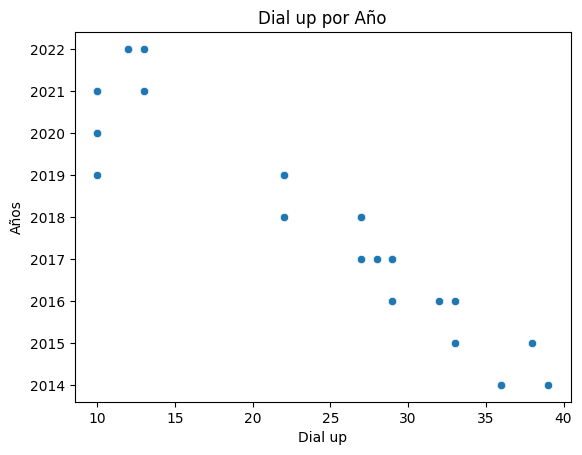

In [119]:
# Crea el gráfico de dispersión
sns.scatterplot(y='Año', x='Dial up', data=df_internet_BAF)
# Agrega el título al eje y
plt.ylabel('Años')

# Agrega el título al gráfico
plt.title('Dial up por Año')

# Muestra el gráfico
plt.show()

En este grafico de dispersion vemos las conexiones por dial up desde los años 2014 a 2022. El eje X representa el número de accesos a Internet por dial up y el eje Y representa los años. Los puntos de datos son círculos azules. El gráfico sugiere que la cantidad de accesos a Internet por dial up ha disminuido en Argentina desde 2014.

MAPA DE CALOR

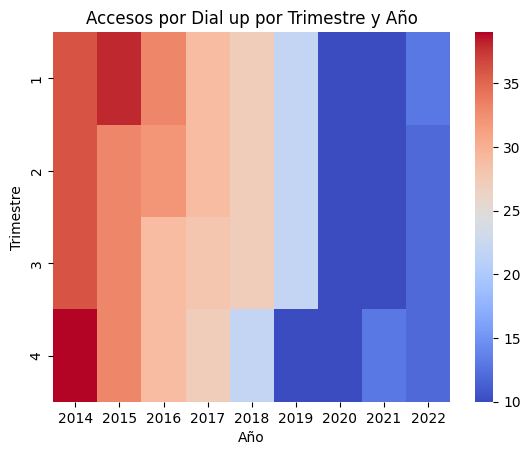

In [108]:
# Crea una tabla pivote con los accesos por cada 100 hogares por trimestre y año
tabla_pivote = pd.pivot_table(df_internet_BAF, values='Dial up', index=['Trimestre'], columns=['Año'])

# Crea el mapa de calor
sns.heatmap(tabla_pivote, cmap='coolwarm')

# Agrega el título al gráfico
plt.title('Accesos por Dial up por Trimestre y Año')

# Muestra el gráfico
plt.show()

Este mapa de calor nos muestra las conexiones por dial up desde los año 2014 a 2022 por trimestre en Argentina. El color rojo representa los periodos con mayor accesos a Internet por dial up y mientras que el celeste nos muestra los periodos con el menor acceso a internet por dial up.
En el cuarto trimestre del año 2014 hubo mas de 35 conexiones por dial up. En los años 2020, 2021 y 2022 se observa una disminucion de las conexiones por dial up. 

Voy a crear un dataframe del csv Internet_BAE(4).csv

In [15]:
df_internet_BAF_PCIA = pd.read_csv('../DATA/INTERNET/Internet_BAF (4).csv')

In [16]:
df_internet_BAF_PCIA

Año  Trimestre            Provincia  Banda ancha fija  Dial up  Total
0    2022          4         Buenos Aires                 5      6.0      5
1    2022          4      Capital Federal                 2      2.0      2
2    2022          4            Catamarca                71      1.0     71
3    2022          4                Chaco               144      5.0    144
4    2022          4               Chubut               168    904.0    169
..    ...        ...                  ...               ...      ...    ...
859  2014          1           Santa Cruz                26    460.0     27
860  2014          1             Santa Fe               506    612.0    507
861  2014          1  Santiago Del Estero                37      9.0     37
862  2014          1     Tierra Del Fuego                27    766.0     28
863  2014          1              Tucumán               130     88.0    130

[864 rows x 6 columns]

Vamos a cambiar el tipo de dato de la columna Dial up a entero

In [20]:
# Convierte los valores no numéricos en valores nulos
df_internet_BAF_PCIA['Dial up'] = pd.to_numeric(df_internet_BAF_PCIA['Dial up'], errors='coerce')

# Reemplaza los valores nulos por un valor numérico
df_internet_BAF_PCIA['Dial up'].fillna(0, inplace=True)

# Convierte la columna en un tipo de datos numérico
df_internet_BAF_PCIA['Dial up'] = df_internet_BAF_PCIA['Dial up'].astype(int)


Vamos a ver la información del dataframe para conocer si hay nulos o no

In [22]:
df_internet_BAF_PCIA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Año               864 non-null    int64 
 1   Trimestre         864 non-null    int64 
 2   Provincia         864 non-null    object
 3   Banda ancha fija  864 non-null    int64 
 4   Dial up           864 non-null    int32 
 5   Total             864 non-null    int64 
dtypes: int32(1), int64(4), object(1)
memory usage: 37.2+ KB


Voy a analizar si hay duplicados

In [23]:
duplicates = df_internet_BAF_PCIA.duplicated()
if duplicates.any():
    print("Hay filas duplicadas en el conjunto de datos:")
    print(df_internet_BAF_PCIA[duplicates])
else:
    print("No hay filas duplicadas en el conjunto de datos.")

No hay filas duplicadas en el conjunto de datos.


El dataframe df_internet_BAF_PCIA nos muestra datos sobre las conexiones por banda ancha fija y por dial up por provincia para los trimestres de los años 2014 a 2022. No tiene duplicados. Posee dos nulos en la columna Dial up. Tiene seis columnas que las detalla a continuación:
- Año: Detalla el año al que pertenece la medición desde el 2014 a 2022.
- Trimestre: Detalla el trimestre al que pertenece la medición.
- Provincia: Detalla la provincia a la que pertenece las mediciones.
- Banada ancha fija: el número de conexiones de banda ancha fija.La banda ancha fija es una tecnología de conexión a Internet que utiliza una línea física para transmitir datos. Esta línea puede ser de cobre, fibra óptica o cable coaxial. Requiere que el usuario esté conectado a una línea física
- Dial up: el número de conexiones de dial-up. Dial-up es una tecnología de conexión a Internet que utiliza la línea telefónica para transmitir datos.
- Total: es el total de conexiones


Voy a realizar el analisis de las variables categoricas

AÑO

Las mediciones que tiene este dataframe se toman en intervalos de tiempo grandes, como trimestres o años por lo que me parece más apropiado tratar el año como una variable categórica.

Voy a analizar las conexiones por banda ancha fija por año

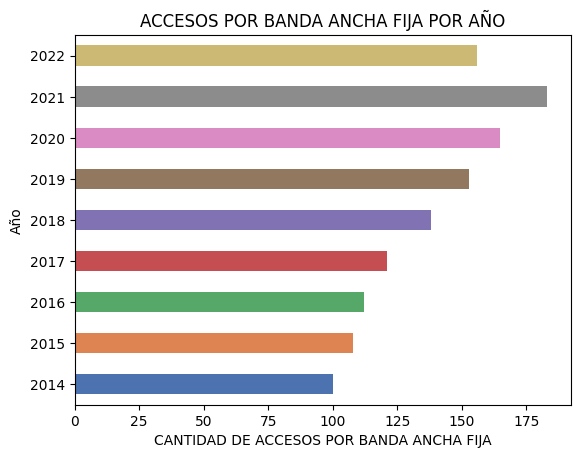

In [26]:
# Contamos el número de accesos por Banda ancha fija por año
counts = df_internet_BAF_PCIA.groupby('Año')['Banda ancha fija'].mean()

# Redondea el promedio al número entero más cercano
counts = round(counts)

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje y
plt.xlabel('CANTIDAD DE ACCESOS POR BANDA ANCHA FIJA')

# Agregamos el título al gráfico
plt.title('ACCESOS POR BANDA ANCHA FIJA POR AÑO')

# Mostramos el gráfico
plt.show()

Este grafico nos muestra las conexiones por banda ancha fija por año. En el año 2014 tuvo 100 conexiones por banda ancha fija. En el año 2018 tuvo 138 conexiones por banda ancha fija. Y en el año 2022 tuvo 156 conexiones por banda ancha fija.

Voy a analizar las conexiones dial up por año 

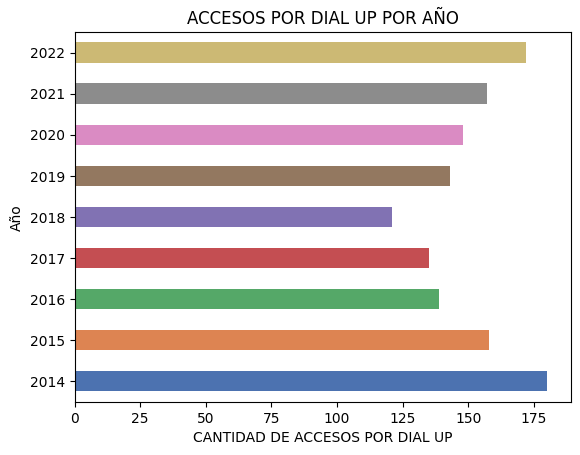

In [28]:
# Contamos el número de accesos por Dial up por año
counts = df_internet_BAF_PCIA.groupby('Año')['Dial up'].mean()

# Redondea el promedio al número entero más cercano
counts = round(counts)

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje y
plt.xlabel('CANTIDAD DE ACCESOS POR DIAL UP')

# Agregamos el título al gráfico
plt.title('ACCESOS POR DIAL UP POR AÑO')

# Mostramos el gráfico
plt.show()

Este grafico nos muestra las conexiones por dial up por año pero teniendo en cuenta que las mediciones fueron hechas por provincias. Y vemos que en el año 2014 hubo 180 conexiones por dial up. En el año 2015 hubo 158 conexiones por dial up. Y en el año 2022 hubo 172 conexiones por dial up. Lo que podemos observar es que desde el año 2014 a 2018 se produjo una disminucion en las conexiones por dial up y luego desde el año 2019 al 2022 se produjo un aumento en las conexiones por dial up.


TRIMESTRE

Analizaré los trimestre como una variable categorica porque al tratarse de grandes intervalos de tiempo como trimestes y años me parece mejor considerar a esta variable como categórica

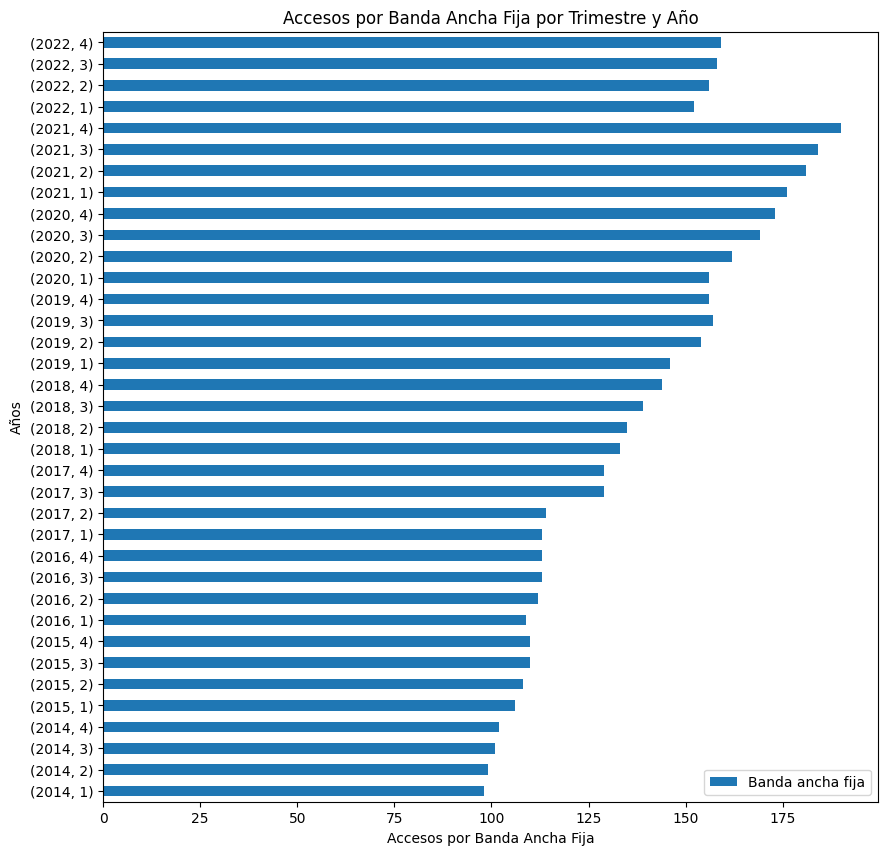

In [30]:
# Crea una tabla pivote con los accesos por Banda ancha fija por trimestre y año
tabla_pivote = pd.pivot_table(df_internet_BAF_PCIA, values='Banda ancha fija', index=['Año', 'Trimestre'])

# Redondeo
tabla_pivote = round(tabla_pivote)

# Grafica los datos
tabla_pivote.plot(kind='barh', figsize=(10, 10))

# Agrega el título al eje x
plt.xlabel('Accesos por Banda Ancha Fija')

# Agrega el título al eje y
plt.ylabel('Años')

# Agrega el título al gráfico
plt.title('Accesos por Banda Ancha Fija por Trimestre y Año')

# Muestra el gráfico
plt.show()

En este grafico vemos las conexiones por banda ancha fija por año pero las mediciones fueron llevadas a cabo por provincia. El primer trimestre del  año 2015 tuvo 106 conexiones por banda ancha. En el segundo trimestre del año 2020 hubo 162 conexiones por banda ancha fija. En el tercer trimestre del año 2021 hubo 184 conexiones por banda ancha fija. Y en el cuarto trimestre del año 2022 hubo 159 conexiones por banda ancha fija

Voy a analizar las conexiones por dial up por trimestres

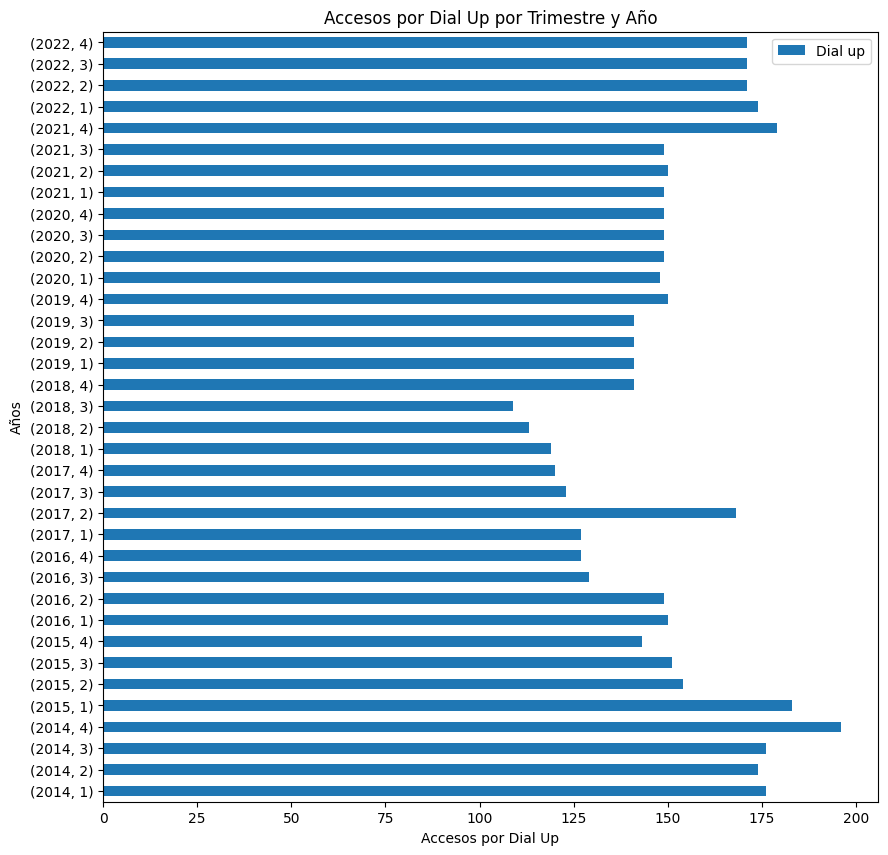

In [32]:
# Crea una tabla pivote con los accesos por Dial up por trimestre y año
tabla_pivote = pd.pivot_table(df_internet_BAF_PCIA, values='Dial up', index=['Año', 'Trimestre'])

# Redondeo
tabla_pivote = round(tabla_pivote)

# Grafica los datos
tabla_pivote.plot(kind='barh', figsize=(10, 10))

# Agrega el título al eje x
plt.xlabel('Accesos por Dial Up')

# Agrega el título al eje y
plt.ylabel('Años')

# Agrega el título al gráfico
plt.title('Accesos por Dial Up por Trimestre y Año')

# Muestra el gráfico
plt.show()

En este grafico vemos las conexiones por dial up por trimestres desde los año 2014 a 2022 teniendo en cuenta que las mediciones fueron realizadas por provincias. En el primer trimestre del año 2020 hubo 148 conexiones por dial up. En el segundo trimestre de 2021 hubo 150 conexiones por dial up.Y en el tercer trimestre del año 2022 hubo 171 conexiones por dial up.

PROVINCIA

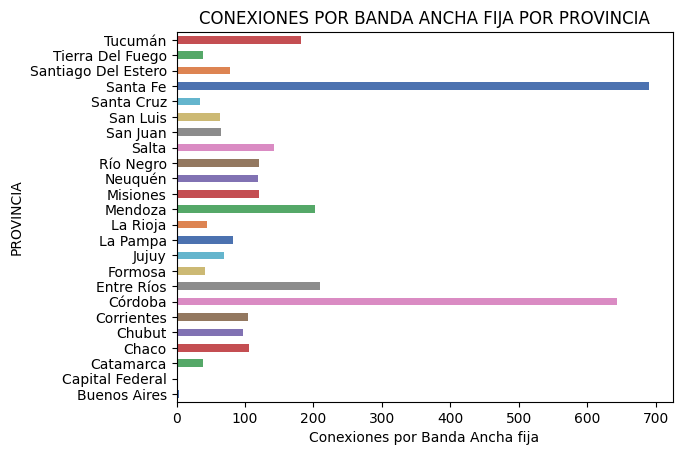

In [34]:
promedio_por_provincia = df_internet_BAF_PCIA.groupby('Provincia')['Banda ancha fija'].mean()

#Redondeo
promedio_por_provincia= round(promedio_por_provincia)

# Crea una paleta de colores pastel
colores = sns.color_palette("deep", n_colors=len(promedio_por_provincia))

# Grafica los datos con los colores correspondientes
promedio_por_provincia.plot(kind='barh', color=colores)

# Agrega el título al eje x
plt.xlabel('Conexiones por Banda Ancha fija')

# Agrega el título al eje y
plt.ylabel('PROVINCIA')

# Agrega el título al gráfico
plt.title('CONEXIONES POR BANDA ANCHA FIJA POR PROVINCIA')

# Muestra el gráfico
plt.show()

El promedio de conexiones de banda ancha fija en Buenos Aires y Capital Federal es de 4 y 1 respectivamente. Esto significa que, en promedio, hay 4 conexiones de banda ancha fija en Buenos Aires y 1 conexion de banda ancha fija en Capital Federal. En Tucumán hay en promedio 182 conexiones de banda ancha fija

Voy a realizar el analisis de las variables numericas

BANDA ANCHA FIJA

Voy a realizar el analisis estadistico 

In [127]:
df_internet_BAF_PCIA['Banda ancha fija'].describe()

count    864.000000
mean     137.326389
std      180.812265
min        1.000000
25%       39.000000
50%       90.500000
75%      143.000000
max      987.000000
Name: Banda ancha fija, dtype: float64

Esta columna Banda ancha fija tiene 864 datos. El promedio es de 137.32 conexiones por banda ancha fija. La desviación estandar es de 180.81. El menor numero de conexiones por banda ancha fija es de 1  y el mayor numero de conexiones por banda ancha es de 987. El 25% de las conexiones de banda ancha fija tiene como valor mayor 39 y el 75% de las conexiones por banda ancha fija tiene como valor maximo 143.  

HISTOGRAMA DE BANDA ANCHA FIJA

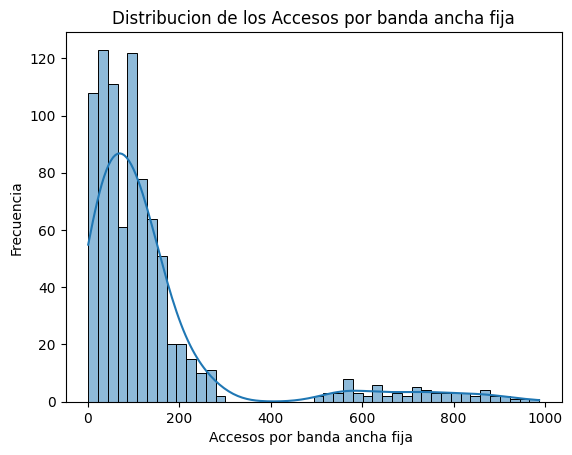

In [132]:
sns.histplot(df_internet_BAF_PCIA, x="Banda ancha fija", kde=True)
plt.xlabel('Accesos por banda ancha fija ')
plt.ylabel('Frecuencia')
plt.title('Distribucion de los Accesos por banda ancha fija')
plt.show()

In [133]:
#Calcularé la media de Banda ancha fija
media = df_internet_BAF_PCIA['Banda ancha fija'].mean()
media
# Cabe aclarar que este dato de la media de Banda ancha fija ya se lo habia mostrado anteriormente cuando se realizo el analisis 
#estadístico con la función describe().  

137.32638888888889

In [134]:
# Calcular la mediana de la columna Dial up
mediana = df_internet_BAF_PCIA['Banda ancha fija'].median()
mediana

90.5

En el histograma de vemos que la columna Accesos por banda ancha fija muestra una distribución asimétrica positiva. También lo hemos comprobado al calcular la media y la mediana. Ya que la media es mayor a la mediana.

DIAGRAMA DE CAJA

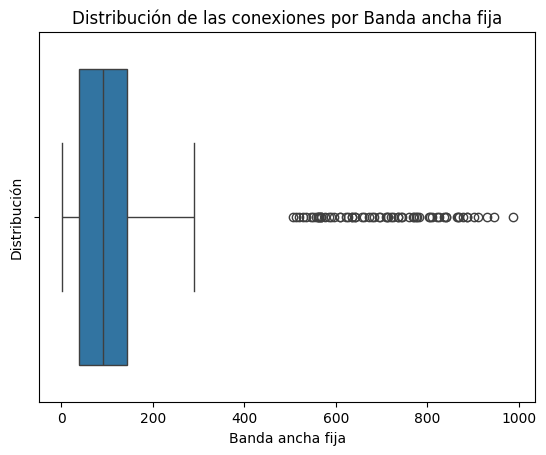

In [135]:
sns.boxplot(x=df_internet_BAF_PCIA['Banda ancha fija'])
plt.xlabel('Banda ancha fija')
plt.ylabel('Distribución')
plt.title('Distribución de las conexiones por Banda ancha fija')
plt.show()

Este grafico de caja muestra la distribución de los datos de las conexiones por banda ancha fija. En este gráfico vemos que la línea que está dentro de caja representa la mediana. Hay valores atipicos en los datos de conexiones por banda ancha fija ya que fuera del rango intercuartílico hay valores que se muestran como puntos individuales en el diagrama.

GRAFICO DE DISPERSION

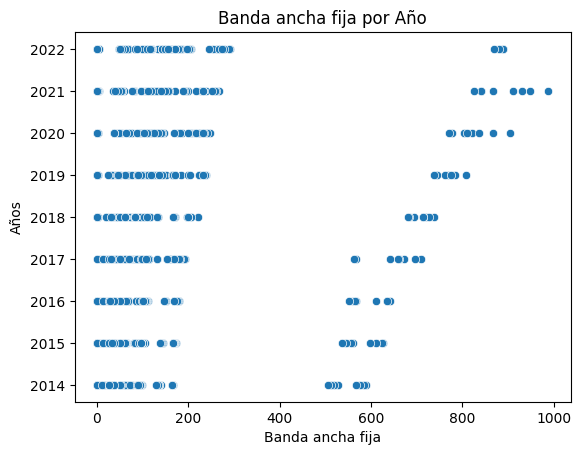

In [136]:
# Crea el gráfico de dispersión
sns.scatterplot(y='Año', x='Banda ancha fija', data=df_internet_BAF_PCIA)
# Agrega el título al eje y
plt.ylabel('Años')

# Agrega el título al gráfico
plt.title('Banda ancha fija por Año')

# Muestra el gráfico
plt.show()

En este grafico de dispersion vemos las conexiones por banda ancha fija desde los años 2014 a 2022. El eje X representa el número de accesos a Internet por banda ancha fija y el eje Y representa los años. Los puntos de datos son círculos azules. El gráfico muestra una correlación positiva entre la banda ancha fija y el año, lo que sugiere que el número de conexiones de banda ancha fija ha estado aumentando con el tiempo.

MAPA DE CALOR

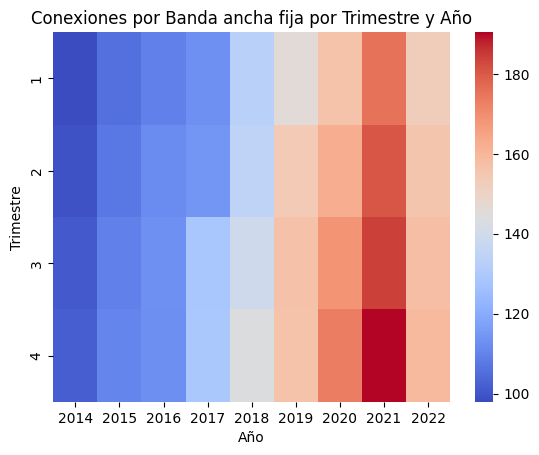

In [137]:
# Crea una tabla pivote con los accesos por Banda ancha fija por trimestre y año
tabla_pivote = pd.pivot_table(df_internet_BAF_PCIA, values='Banda ancha fija', index=['Trimestre'], columns=['Año'])

# Crea el mapa de calor
sns.heatmap(tabla_pivote, cmap='coolwarm')

# Agrega el título al gráfico
plt.title('Conexiones por Banda ancha fija por Trimestre y Año')

# Muestra el gráfico
plt.show()

Este mapa de calor nos muestra las conexiones por banda ancha fija por trimestre y por año. El color rojo representa los periodos con mayor conexiones a Internet por banda ancha fija y mientras que el celeste nos muestra los periodos con el menor conexiones a internet por banda ancha fija.
En el tercer trimestre del año 2014 tiene aproximadamente 100 de conexiones a internet por banda ancha fija y en el cuarto trimestre del año 2022 tiene aproximadamente 159 conexiones a internet por banda ancha fija.

DIAL UP

Realizaré el analisis estadistico

In [139]:
df_internet_BAF_PCIA['Dial up'].describe()

count    862.000000
mean     150.595128
std      230.167337
min        0.000000
25%        2.000000
50%       16.000000
75%      253.500000
max      998.000000
Name: Dial up, dtype: float64

La columna Dial up tiene 862 datos. El promedio de conexiones por dial up es de 150.59. La desviacion estandar de las conexiones por dial up es de 230.16. El menor numero de conexiones por dial up es de 0 y el máximo numero de conexiones por dial up es 998. El 25% de las conexiones poe dial up tiene como valor máximo 2 y el 75% de las conexiones por dial up tiene como valor máximo 998

HISTOGRAMA DE DIAL UP

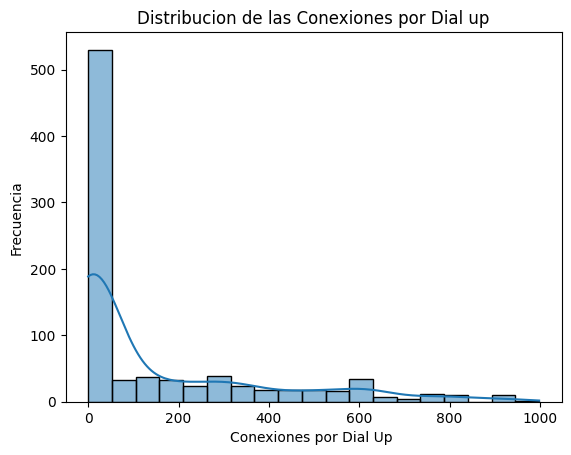

In [140]:
sns.histplot(df_internet_BAF_PCIA, x="Dial up", kde=True)
plt.xlabel('Conexiones por Dial Up ')
plt.ylabel('Frecuencia')
plt.title('Distribucion de las Conexiones por Dial up')
plt.show()

In [141]:
#Calcularé la media de Dial up
media = df_internet_BAF_PCIA['Dial up'].mean()
media
# Cabe aclarar que este dato de la media de Banda ancha fija ya se lo habia mostrado anteriormente cuando se realizo el analisis 
#estadístico con la función describe().  

150.5951276102088

In [142]:
# Calcular la mediana de la columna Dial up
mediana = df_internet_BAF_PCIA['Dial up'].median()
mediana

16.0

En el histograma de vemos que la columna conexiones por dial up muestra una distribución asimétrica positiva. También lo hemos comprobado al calcular la media y la mediana. Ya que la media es mayor a la mediana.

DIAGRAMA DE CAJA

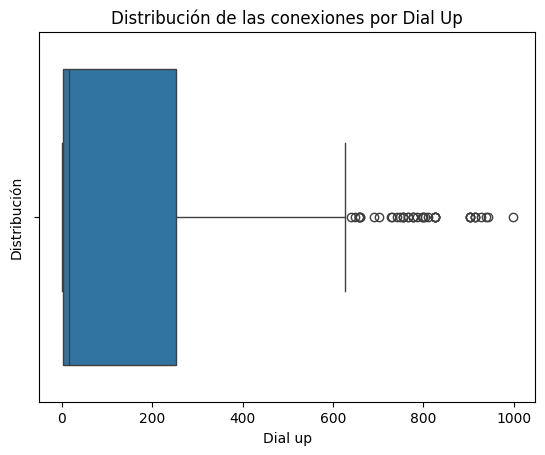

In [143]:
sns.boxplot(x=df_internet_BAF_PCIA['Dial up'])
plt.xlabel('Dial up')
plt.ylabel('Distribución')
plt.title('Distribución de las conexiones por Dial Up')
plt.show()

Este grafico de caja nos muestra la distribucion de los datos de las conexiones a internet por dial up. La linea que se encuentra dentro de la caja representa la mediana. Vemos que posee muchos outlier porque vemos fuera del rango intercuartilico muchos puntos. 

GRAFICO DE DISPERSION

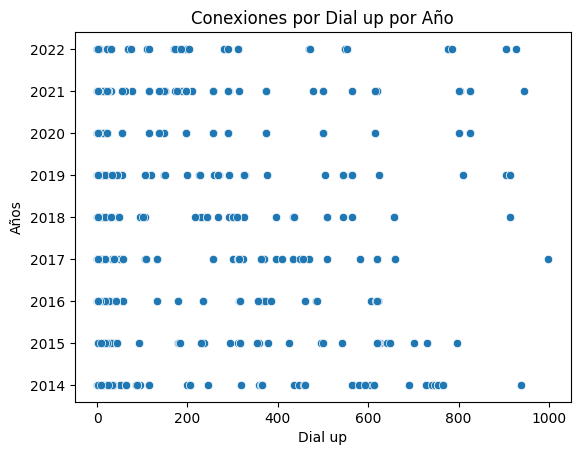

In [145]:
# Crea el gráfico de dispersión
sns.scatterplot(y='Año', x='Dial up', data=df_internet_BAF_PCIA)
# Agrega el título al eje y
plt.ylabel('Años')

# Agrega el título al gráfico
plt.title('Conexiones por Dial up por Año')

# Muestra el gráfico
plt.show()

Este grafico de dispersion nos muestra los datos de las conexiones a internet por dial up desde el año 2014 a 2022.En el eje y se encuentran los año y el en eje x las conexiones por dial up. Los puntos están dispersos por todo el gráfico, esto sugiere que no hay una relación clara entre las dos variables.

MAPA DE CALOR

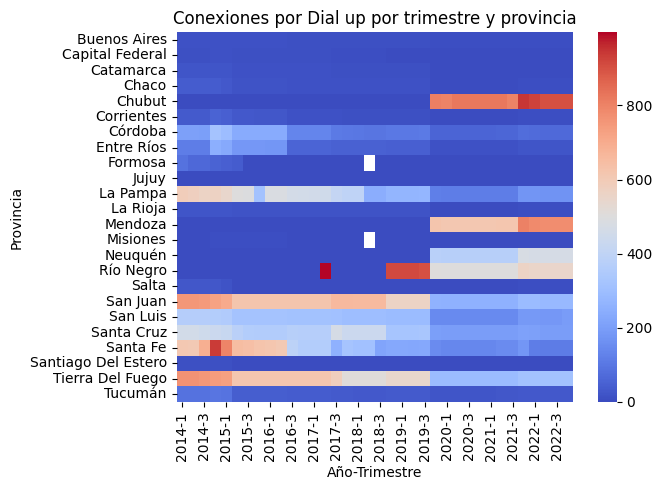

In [148]:
# Crea una tabla pivote con los accesos por Dial up por trimestre y provincia
tabla_pivote = pd.pivot_table(df_internet_BAF_PCIA, values='Dial up', index=['Provincia'], columns=['Año', 'Trimestre'])

# Crea el mapa de calor
sns.heatmap(tabla_pivote, cmap='coolwarm')

#Agrega el titulo al eje y
plt.ylabel('Provincia')

# Agrega el título al gráfico
plt.title('Conexiones por Dial up por trimestre y provincia')

# Muestra el gráfico
plt.show()

Este mapa de calor muestra las conexiones a  Internet por dial up de Argentina desde 2014 hasta 2022. El eje X representa el año y el trimestre, y el eje Y representa las provincias de Argentina. El color del mapa de calor varía de azul a rojo, con el azul representando un menor acceso a Internet y el rojo representando un mayor acceso a Internet. Hay mucho celeste en el gráfico, esto sugiere que hay muchas provincias con pocas conexiones de dial up.

Voy a crear un dataframe del csv a acceso_vel.csv

In [2]:
df_internet_acceso_por_velocidad = pd.read_csv('../ETL/acceso_vel.csv')

Vamos a ver el dataframe

In [3]:
df_internet_acceso_por_velocidad

Unnamed: 0   Año  Trimestre            Provincia  HASTA 512 kbps  \
0             0  2022          4         Buenos Aires           28934   
1             1  2022          4      Capital Federal            5160   
2             2  2022          4            Catamarca             710   
3             3  2022          4                Chaco            4610   
4             4  2022          4               Chubut            1090   
..          ...   ...        ...                  ...             ...   
859         859  2014          1           Santa Cruz            1610   
860         860  2014          1             Santa Fe            8456   
861         861  2014          1  Santiago Del Estero            1234   
862         862  2014          1     Tierra Del Fuego             120   
863         863  2014          1              Tucumán              60   

     + 512 Kbps - 1 Mbps  + 1 Mbps - 6 Mbps  + 6 Mbps - 10 Mbps  \
0                  23347             259866               28155   
1                   5096              31320               64653   
2                   3150               2716                5028   
3                   7710              16067               17846   
4                   1614              46457               31007   
..                   ...                ...                 ...   
859                 1625              24972                  10   
860               124468             345225               20328   
861                10531              22817                2422   
862                 6070              30902                  60   
863                34672              83210               11779   

     + 10 Mbps - 20 Mbps  + 20 Mbps - 30 Mbps  + 30 Mbps   OTROS    Total  
0                 244555                 9867    3760109   97634  4794665  
1                  36336                 8116    1299117  106772  1551926  
2                   4638                 3122      52739     228    70909  
3                   6704                 3039      94866    3909   143663  
4                  34728                 1577      19048   20026   168759  
..                   ...                  ...        ...     ...      ...  
859                   10                    0          0       0    26760  
860                 6845                  230        668       0   506013  
861                 1090                    0          0       0    37113  
862                    0                    0          0       0    31527  
863                 3620                   30          0       0   130032  

[864 rows x 13 columns]

Elimino la columna Unnamed

In [4]:
df_internet_acceso_por_velocidad = df_internet_acceso_por_velocidad.drop(columns=['Unnamed: 0'])


Voy a ver la información para saber si tiene nulos o no

In [5]:
df_internet_acceso_por_velocidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Año                  864 non-null    int64 
 1   Trimestre            864 non-null    int64 
 2   Provincia            864 non-null    object
 3   HASTA 512 kbps       864 non-null    int64 
 4   + 512 Kbps - 1 Mbps  864 non-null    int64 
 5   + 1 Mbps - 6 Mbps    864 non-null    int64 
 6   + 6 Mbps - 10 Mbps   864 non-null    int64 
 7   + 10 Mbps - 20 Mbps  864 non-null    int64 
 8   + 20 Mbps - 30 Mbps  864 non-null    int64 
 9   + 30 Mbps            864 non-null    int64 
 10  OTROS                864 non-null    int64 
 11  Total                864 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 81.1+ KB


Voy a ver si tiene duplicados

In [41]:
duplicates = df_internet_acceso_por_velocidad.duplicated()
if duplicates.any():
    print("Hay filas duplicadas en el conjunto de datos:")
    print(df_internet_acceso_por_velocidad[duplicates])
else:
    print("No hay filas duplicadas en el conjunto de datos.")

No hay filas duplicadas en el conjunto de datos.


Este dataframe contiene información sobre el acceso a Internet en Argentina. Posee 864 filas. Cada fila representa una provincia y un trimestre específico, y cada columna representa una categoría de velocidad de conexión a Internet. Las categorías de velocidad incluyen “HASTA 512 kbps”, “+ 512 Kbps - 1 Mbps”, “+ 1 Mbps - 6 Mbps”, “+ 6 Mbps - 10 Mbps”, “+ 10 Mbps - 20 Mbps”, “+ 20 Mbps - 30 Mbps”, “+ 30 Mbps”, “OTROS” y “Total”. Posee 6 nulos en la columna otros. Y no posse duplicados. Posee información desde el año 2014 a 2022.

Voy a realizar el analisis de las variables categoricas

AÑO

Las mediciones que tiene este dataframe se toman en intervalos de tiempo grandes, como trimestres o años por lo que me parece más apropiado tratar el año como una variable categórica.

Voy a mostrar la cantidad de accesos por año y por cada una de las categorias de velocidad

CONEXIONES POR AÑO Y HASTA UN VELOCIDAD DE 512 kbps

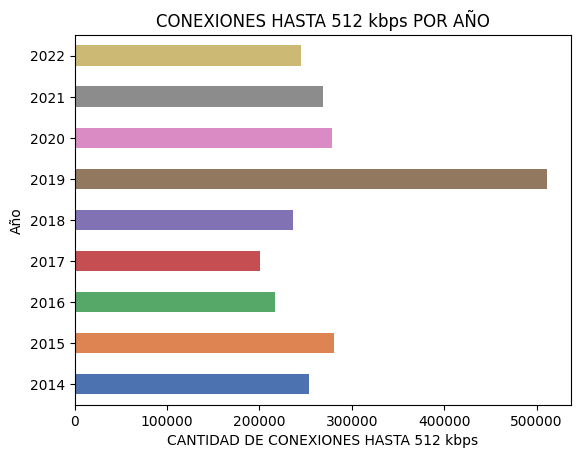

In [42]:
# Contaré el número de accesos con velocidad hasta 512 kbps por año
counts = df_internet_acceso_por_velocidad.groupby('Año')['HASTA 512 kbps'].sum()

# Creo una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES HASTA 512 kbps')

# Agrego el título al gráfico
plt.title('CONEXIONES HASTA 512 kbps POR AÑO')

# Mostramos el gráfico
plt.show()

Este grafico de barra muestra el numero de las conexiones a internet con una velocidad de hasta 512 kbps por año en Argentina. En el año 2014 se realizaron 25492 conexiones con una velocidad de hasta 512 kbps. En el año 2017 se realizaron 201156 conexiones con una velocidad de hasta 512 kbps. Y en el año 2022 se realizaron 245169 conexiones con una velocidad de hasta 512 kbps.

CONEXIONES POR AÑO Y HASTA UN VELOCIDAD MAYOR A 512 kbps HASTA 1 Mbps

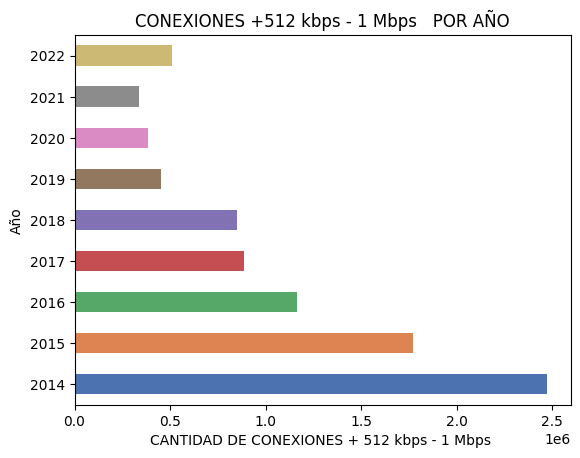

In [44]:
# Contaré el número de accesos a internet con una velocidad mayor a 512 kbps a 1 Mbps por año
counts = df_internet_acceso_por_velocidad.groupby('Año')['+ 512 Kbps - 1 Mbps'].sum()

# Creo una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES + 512 kbps - 1 Mbps ')

# Agregamos el título al gráfico
plt.title('CONEXIONES +512 kbps - 1 Mbps   POR AÑO')

# Mostramos el gráfico
plt.show()

Este grafico de barras muestra el numero de las conexiones a internet por año con una velocidad superior a 512 kbps a 1 Mbps en Argentina. En el año 2014 se realizaron 2472063 conexiones a internet con una velocidad superior a 512 kbps a 1 Mbps. En el año 2016 se realizaron 1161628 conexiones a internet con una velocidad superior a 512 kbps a 1 Mbps. Y en el año 2022 se realizaron 511950 conexiones a internet con una velocidad superior a 512 kbps a 1 Mbps.

CONEXIONES POR AÑO Y HASTA UN VELOCIDAD MAYOR A 1 Mbps a 6 Mbps

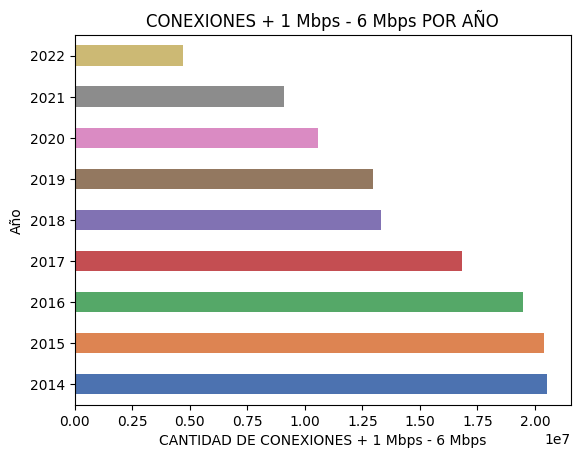

In [46]:
# Contaré el número de accesos a internet con una velocidad mayor a 1 Mbps a 6 Mbps por año
counts = df_internet_acceso_por_velocidad.groupby('Año')['+ 1 Mbps - 6 Mbps'].sum()

# Creo una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES + 1 Mbps - 6 Mbps')

# Agrego el título al gráfico
plt.title('CONEXIONES + 1 Mbps - 6 Mbps POR AÑO')

# Muestro el gráfico
plt.show()

Este grafico de barra nos muestra el numero de conexiones con velocidad mayor a 1 Mbps a 6 Mbps por año. En el año 2014 se realizaron 20.517.861 conexiones con una velocidad superior a 1 Mbps a 6 Mbps. En el año 2017 se realizaron 16.835.984 conexiones con una velocidad superior a 1 Mbps a 6 Mbps. Y en el año 2020 se realizaron 10.561.943 conexiones con una velocidad superior a 1 Mbps a 6 Mbps. 

CONEXIONES POR AÑO Y HASTA UN VELOCIDAD MAYOR A 6 Mbps a 10 Mbps

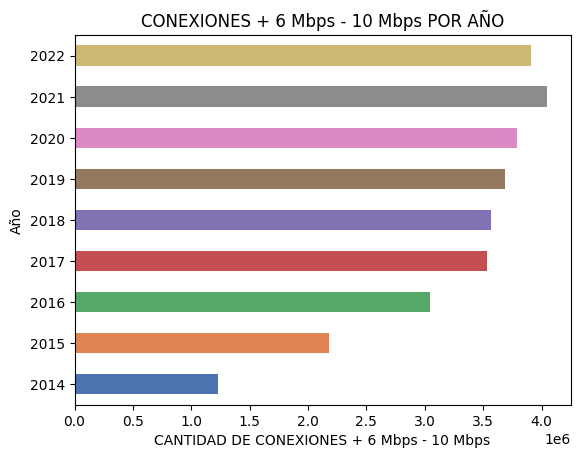

In [48]:
# Contaré el número de conexiones a internet con una velocidad superior a 6 Mbps a 10 Mbps por año
counts = df_internet_acceso_por_velocidad.groupby('Año')['+ 6 Mbps - 10 Mbps'].sum()

# Crearé una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficco los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES + 6 Mbps - 10 Mbps')

# Agrego el título al gráfico
plt.title('CONEXIONES + 6 Mbps - 10 Mbps POR AÑO')

# Muestro el gráfico
plt.show()

Este grafico de barra nos muestra el numero de conexiones con velocidad mayor a 6 Mbps a 10 Mbps por año. En el año 2014 se realizaron 1.232.240 conexiones con una velocidad superior a 6 Mbps a 10 Mbps. En el año 2018 se realizaron 3.563.587 conexiones con una velocidad superior a 6 Mbps a 10 Mbps. Y en el año 2022 se realizaron 3.907.221 conexiones con una velocidad superior a 6 Mbps a 10 Mbps. 

CONEXIONES POR AÑO Y HASTA UN VELOCIDAD MAYOR A 10 Mbps a 20 Mbps

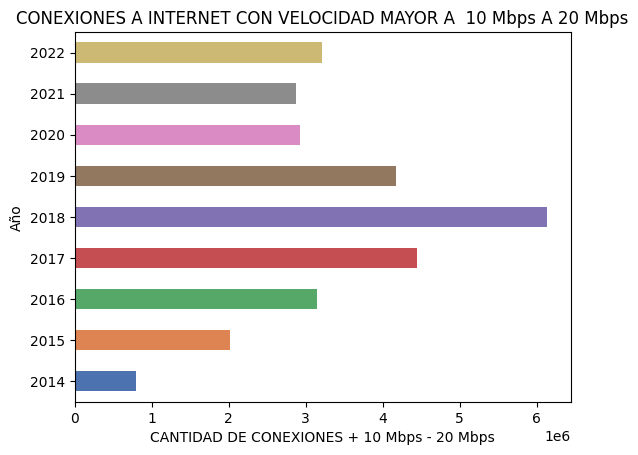

In [50]:
# Contaré el número de conexiones con una velocidad superior a 10 Mbps a 20 Mbps por año
counts = df_internet_acceso_por_velocidad.groupby('Año')['+ 10 Mbps - 20 Mbps'].sum()

# Crearé una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES + 10 Mbps - 20 Mbps')

# Agrego el título al gráfico
plt.title('CONEXIONES A INTERNET CON VELOCIDAD MAYOR A  10 Mbps A 20 Mbps')

# Muestro el gráfico
plt.show()

Este grafico de barra nos muestra el numero de conexiones con velocidad mayor a 10 Mbps a 20 Mbps por año. En el año 2015 se realizaron 2024917 conexiones a internet con una velocidad superior a 10 Mbps a 20 Mbps. En el año 2019 se realizaron 4170578 conexiones a internet con una velocidad superior a 10 Mbps a 20 Mbps. Y en el año 2021 se realizaron 2874499 conexiones a internet con una velocidad superior a 10 Mbps a 20 Mbps. 

CONEXIONES POR AÑO Y HASTA UN VELOCIDAD MAYOR A 20 Mbps a 30 Mbps

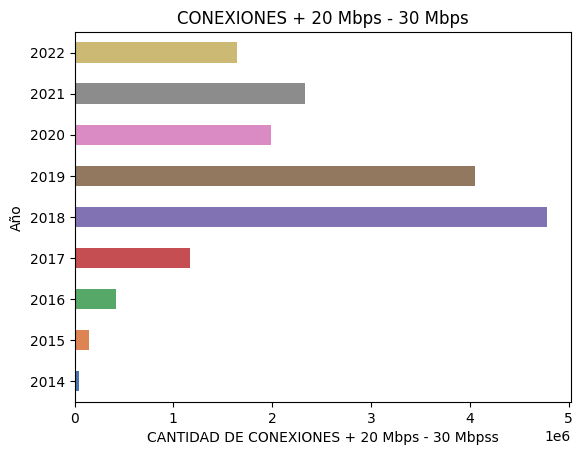

In [52]:
# Contaré el número de conexiones con una velocidad superior a 20 Mbps a 30 Mbps por año
counts = df_internet_acceso_por_velocidad.groupby('Año')['+ 20 Mbps - 30 Mbps'].sum()

# Crearé una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES + 20 Mbps - 30 Mbpss')

# Agrego el título al gráfico
plt.title('CONEXIONES + 20 Mbps - 30 Mbps')

# Muestro el gráfico
plt.show()

Este grafico de barra nos muestra el numero de conexiones con velocidad mayor a 20 Mbps a 30 Mbps por año. En el año 2018 hubo 4779379 conexiones a internet con una velocidad superior a 20 Mbps a 30 Mbps. En el año  2019 hubo 4056532 conexiones a internet con una velocidad superior a 20 Mbps a 30 Mbps. Y en el año 2022 hubo 1643146 conexiones a internet con una velocidad superior a 20 Mbps a 30 Mbps.

CONEXIONES POR AÑO Y HASTA UN VELOCIDAD MAYOR A 30 Mbps

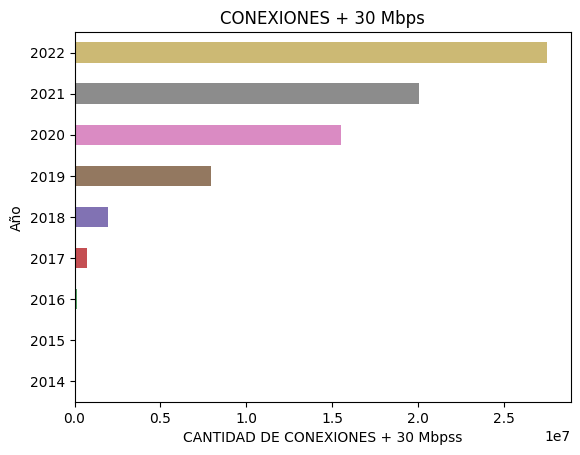

In [54]:
# Contaré el número de conexiones a internet con una velocidad superior a 30 Mbps por año
counts = df_internet_acceso_por_velocidad.groupby('Año')['+ 30 Mbps'].sum()

# Creo una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje y
plt.xlabel('CANTIDAD DE CONEXIONES + 30 Mbpss')

# Agrego el título al gráfico
plt.title('CONEXIONES + 30 Mbps')

# Muestro el gráfico
plt.show()

Este grafico de barra nos muestra el numero de conexiones con velocidad mayor a 30 Mbps por año. En el año 2016 hubo 122.012 conexiones a internet con una velocidad superior a 30 Mbps. En el año 2018 hubo 1.966.724 conexiones a internet con una velocidad superior a 30 Mbps. Y en el año 2022 hubo        27.484.761 conexiones a internet con una velocidad superior a 30 Mbps.

CONEXIONES POR AÑO Y CON UNA VELOCIDAD NO ESPECIFICADAS ANTERIORMENTE

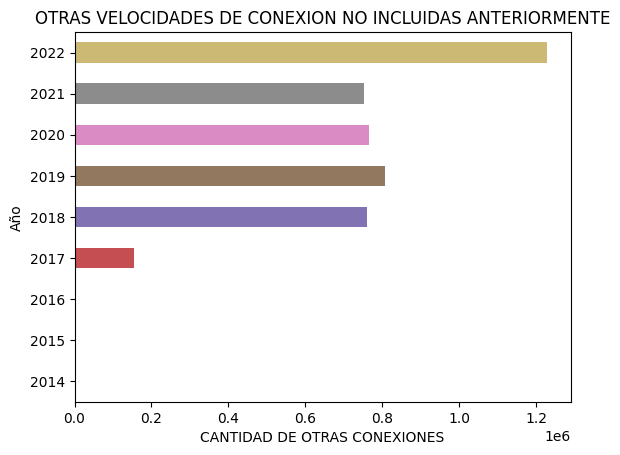

In [56]:
# Contaré el número de conexiones a internet con una velocidad no contempladas anteriormente y teniendo en cuenta el año
counts = df_internet_acceso_por_velocidad.groupby('Año')['OTROS'].sum()

# Creo una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE OTRAS CONEXIONES')

# Agrego el título al gráfico
plt.title('OTRAS VELOCIDADES DE CONEXION NO INCLUIDAS ANTERIORMENTE')

# Muestro el gráfico
plt.show()

Este grafico de barra me muestra las conexiones a internet con una velocidad no contemplada anteriormente y por año. En el año 2017 se registraron    155.145 conexiones con una velocidad no especificada anteriormente. En el año 2022 se registraron 1.228.417 conexiones con una velocidad no especificada anteriormente.En los años 2014, 2015 y 2016, no se registraron conexiones con una velocidad no especificada. 

TOTAL DE CONEXIONES POR AÑO

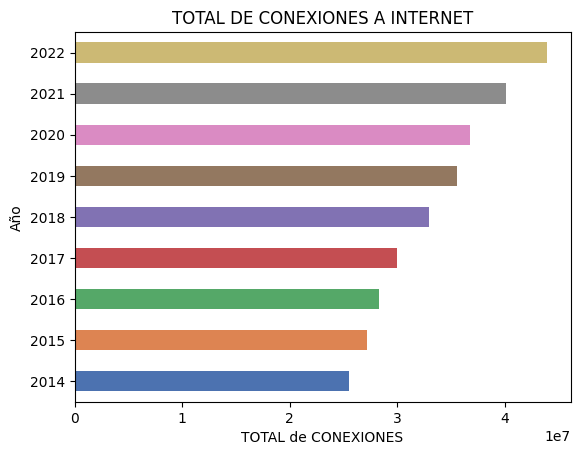

In [58]:
# Contare el número total de conexiones por año
counts = df_internet_acceso_por_velocidad.groupby('Año')['Total'].sum()

# Creo una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje y
plt.xlabel('TOTAL de CONEXIONES')

# Agrego el título al gráfico
plt.title('TOTAL DE CONEXIONES A INTERNET')

# Muestro el gráfico
plt.show()

En este grafico de barra nos muestra el total de conexiones a internet por año. En el año 2015 hubo en total 27.179.071 conexiones a internet. En el año 2017 hubo en total 29.946.586 conexiones a internet. En el año 2022 hubo en total 43.881.935 conexiones a internet siendo este ultimo el año con mayor cantidad de conexiones a internet.

TOTAL DE CONEXIONES A INTERNET POR PROVINCIA

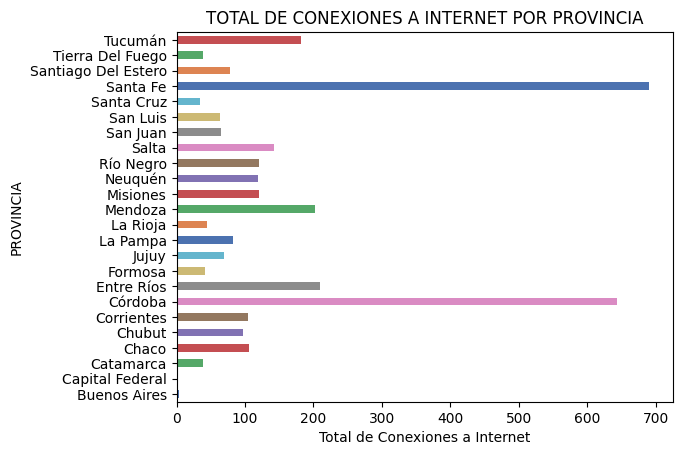

In [60]:
conexiones_por_provincia = df_internet_acceso_por_velocidad.groupby('Provincia')['Total'].sum()

# Crea una paleta de colores pastel
colores = sns.color_palette("deep", n_colors=len(conexiones_por_provincia))

# Grafica los datos con los colores correspondientes
promedio_por_provincia.plot(kind='barh', color=colores)

# Agrega el título al eje x
plt.xlabel('Total de Conexiones a Internet')

# Agrega el título al eje y
plt.ylabel('PROVINCIA')

# Agrega el título al gráfico
plt.title('TOTAL DE CONEXIONES A INTERNET POR PROVINCIA')

# Muestra el gráfico
plt.show()

Este grafico de barras muestra el total de conexiones a internet por cada provincia. En la Capital Federal hubo 49.978.286 conexiones a internet. En la provincia del Chaco hubo en total 3.826.652 conexiones a internet. Y en la provincia de Tucuman hubo 6.546.843 conexiones a internet.

CONEXIONES A INTERNET POR PROVINCIA Y HASTA UN VELOCIDAD DE 512 kbps

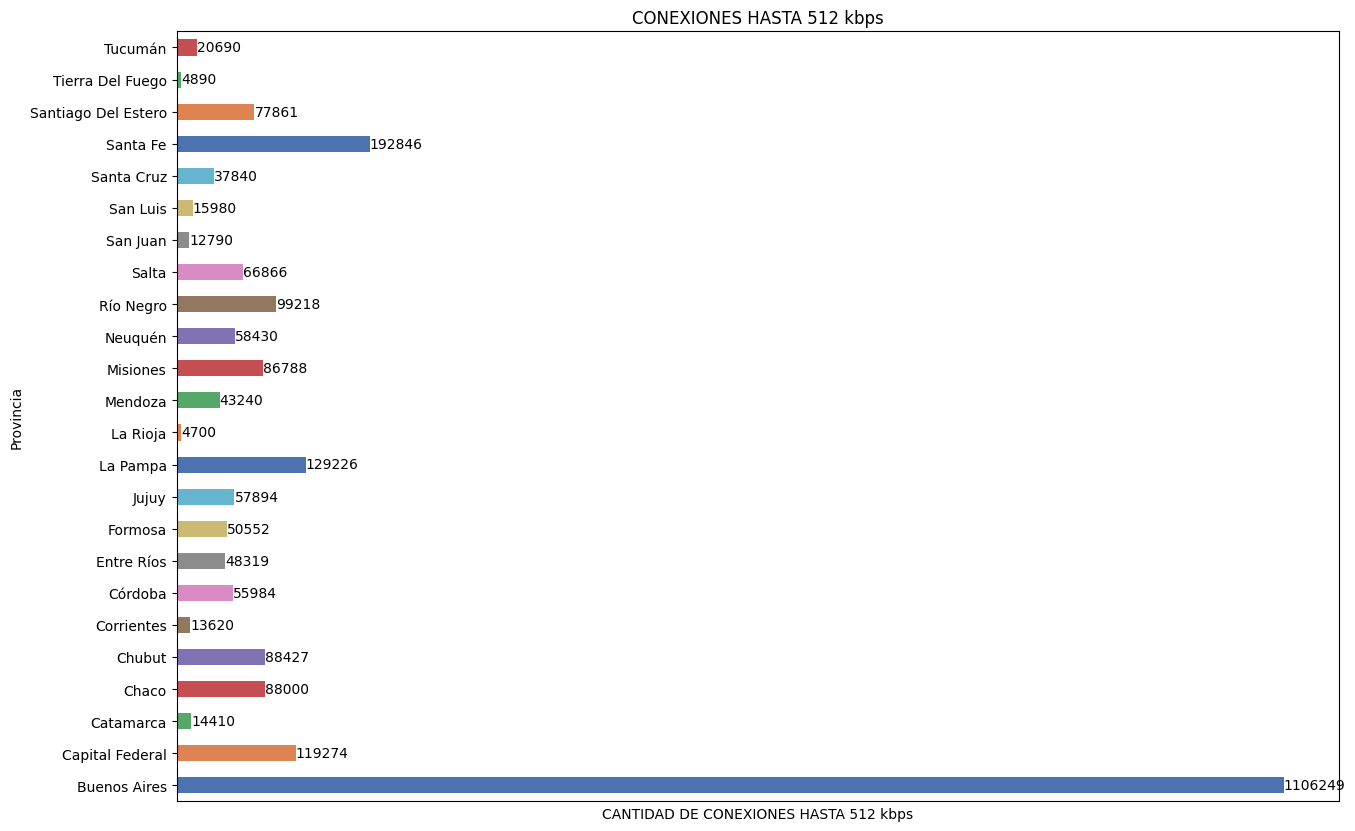

In [73]:
#Realizaré las suma de las conexiones de hasta 512 kbps por provincias
counts = df_internet_acceso_por_velocidad.groupby('Provincia')['HASTA 512 kbps'].sum()

# Crearé una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

plt.rcParams['figure.figsize'] = [15, 10]

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES HASTA 512 kbps')

for i, v in enumerate(counts):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')

# Agrego el título al gráfico
plt.title('CONEXIONES HASTA 512 kbps')

plt.xticks([])

# Muestro el gráfico
plt.show()

Este grafico de barras nos muestra la cantidad de conexiones de internet hasta 512 kbps por cada Provincia de la Argentina. La provincia de Chubut tiene 88.000 conexiones a internet hasta 512 kbps de velocidad. La Capital Federal tien 119.274 conexiones a internet hasta 512 kbps de velocidad. Y la provincia de La Rioja tiene 4700 conexiones a internet hasta 512 kbps de velocidad.

CONEXIONES A INTERNET POR PROVINCIA Y HASTA UN VELOCIDAD MAYOR A 512 kbps HASTA 1 Mbps

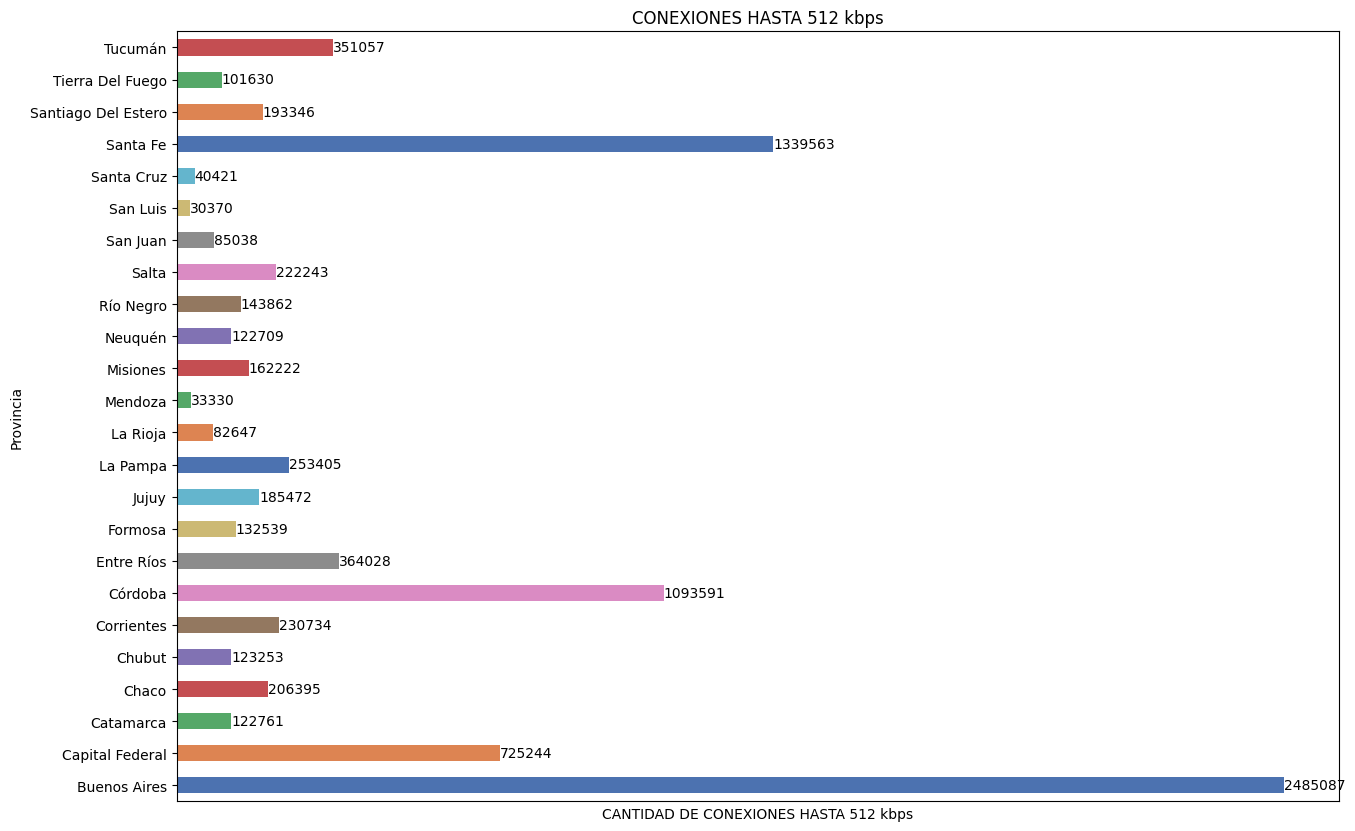

In [75]:
#Realizaré las suma de las conexiones de superior a 12 a 1 Mbps por provincias
counts = df_internet_acceso_por_velocidad.groupby('Provincia')['+ 512 Kbps - 1 Mbps'].sum()

# Crearé una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

plt.rcParams['figure.figsize'] = [15, 10]

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES + 512 Kbps - 1 Mbps')

for i, v in enumerate(counts):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')

# Agrego el título al gráfico
plt.title('CONEXIONES + 512 Kbps - 1 Mbps')

plt.xticks([])

# Muestro el gráfico
plt.show()

Este grafico de barras nos muestra las conexiones de internet con velocidades superiores a 512 kbps a 1 Mbps por cada Provincia de la Argentina. La provincia de La Pampa tiene 253.405 conexiones a internet con velocidades superiores a 512 kbps a 1 Mbps. La provincia de Tucumán tiene 351.057 conexiones a internet con velocidades superiores a 512 kbps a 1 Mbps.

CONEXIONES POR PROVINCIA Y HASTA UN VELOCIDAD MAYOR A 1 Mbps a 6 Mbps

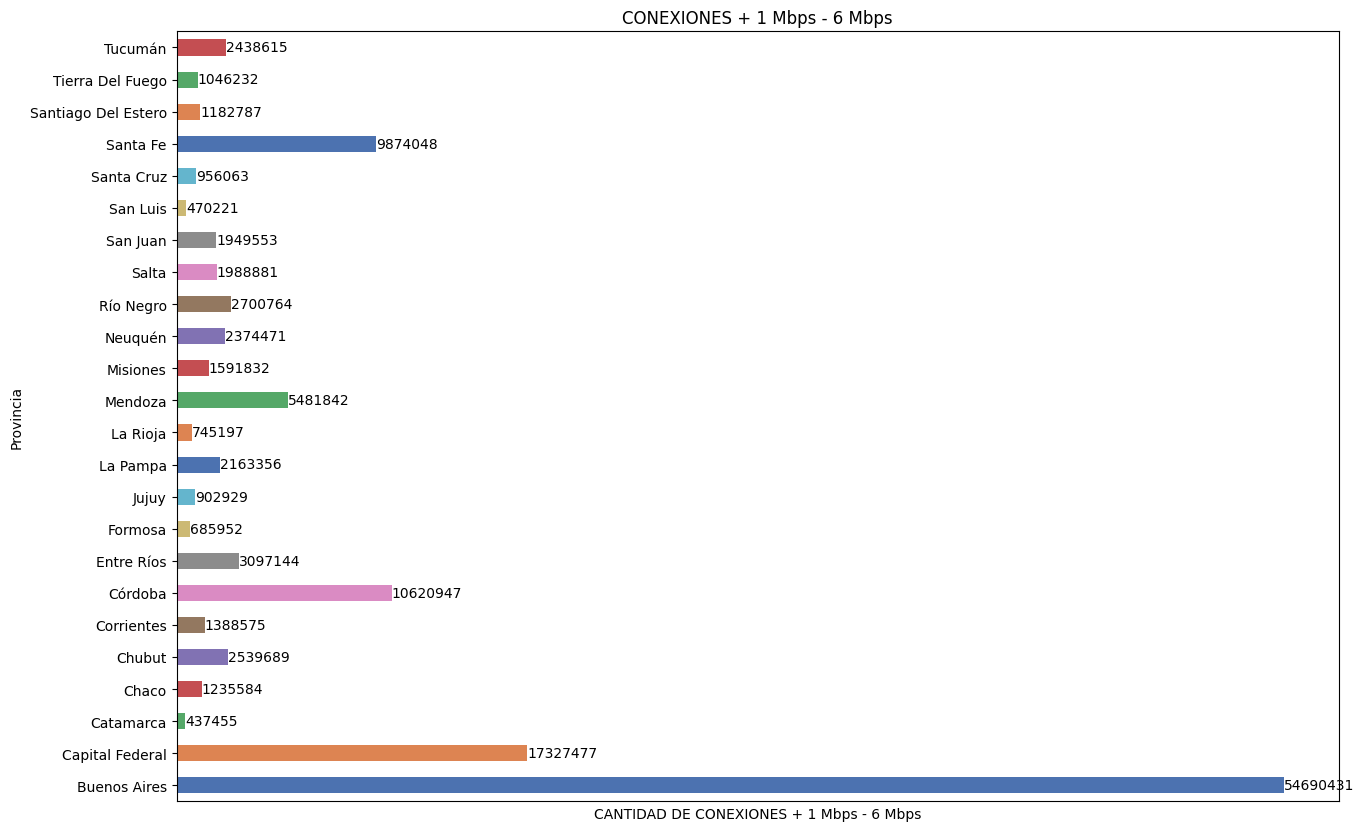

In [6]:
#Realizaré las suma de las conexiones superior a 1 Mbps a 6 Mbps por provincias
counts = df_internet_acceso_por_velocidad.groupby('Provincia')['+ 1 Mbps - 6 Mbps'].sum()

# Crearé una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

plt.rcParams['figure.figsize'] = [15, 10]

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES + 1 Mbps - 6 Mbps')

for i, v in enumerate(counts):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')

# Agrego el título al gráfico
plt.title('CONEXIONES + 1 Mbps - 6 Mbps')

plt.xticks([])

# Muestro el gráfico
plt.show()

Este grafico de barras muestra el numero de conexiones con una velocidad superior a 1 Mbps a 6 Mbps por provincia. En la provincia de Salta hubo        1.988.881 conexiones a internet con una velocidad superior a 1 Mbps a 6 Mbps. En la provincia de Corrientes hubo 1.388.575 conexiones a internet con una velocidad superior a 1 Mbps a 6 Mbps. Y en la provincia de Tierra del Fuego hubo 1.046.232 conexiones a internet con una velocidad superior a 1 Mbps a 6 Mbps. 

CONEXIONES POR AÑO Y HASTA UN VELOCIDAD MAYOR A 6 Mbps a 10 Mbps

([], [])

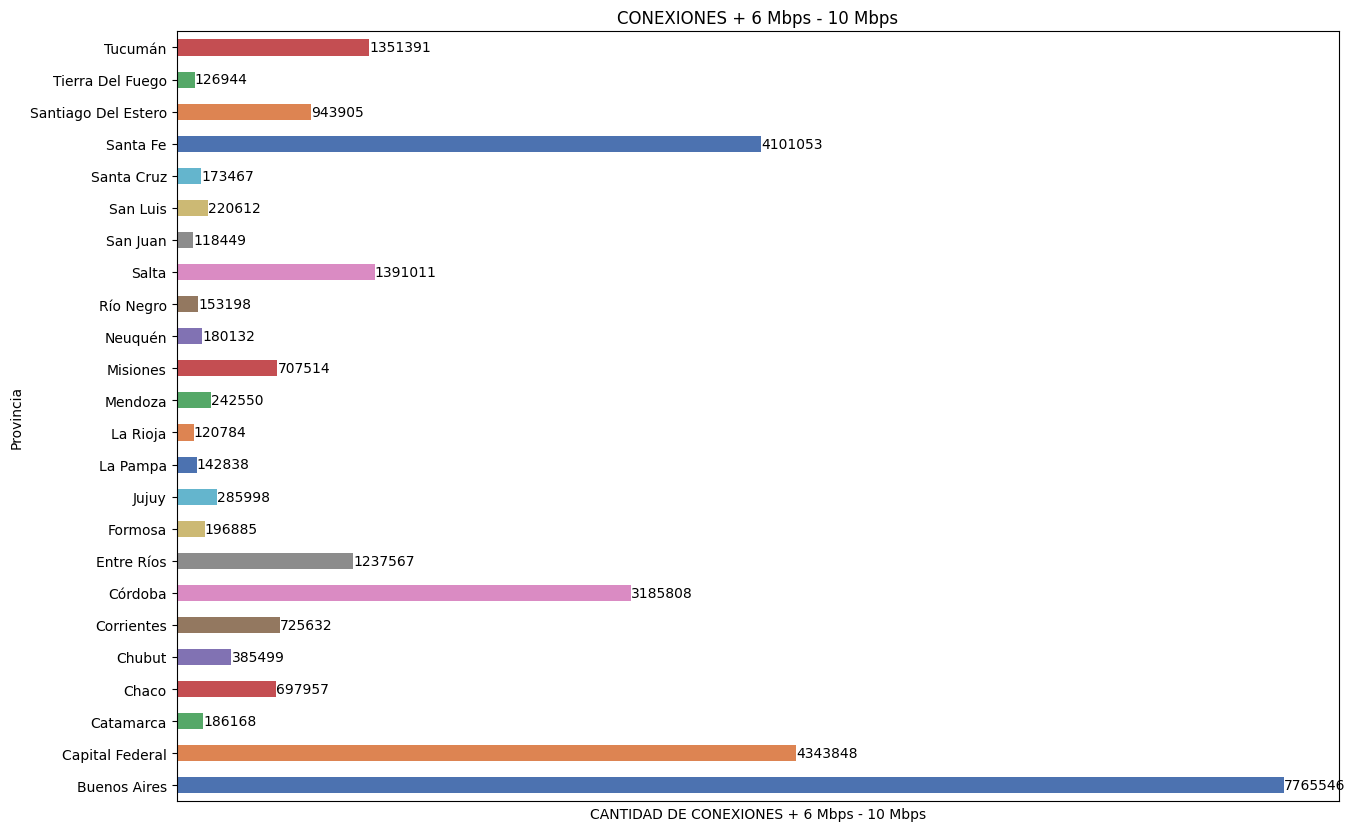

In [7]:
#Realizaré las suma de las conexiones superiores a  6 Mbps a 10 Mbps por provincias
counts = df_internet_acceso_por_velocidad.groupby('Provincia')['+ 6 Mbps - 10 Mbps'].sum()

# Crearé una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

plt.rcParams['figure.figsize'] = [15, 10]

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES + 6 Mbps - 10 Mbps')

for i, v in enumerate(counts):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')

# Agrego el título al gráfico
plt.title('CONEXIONES + 6 Mbps - 10 Mbps')

plt.xticks([])

Este grafico de barra muestra el numero de conexiones a internet con una velocidad de 6 Mbps a 10 Mbps por provincia. La provincia de Tucumán tuvo      1.351.391 conexiones a internet con una velocidad de 6 Mbps a 10 Mbps. La provincia de Misiones tuvo 707.514 conexiones a internet con una velocidad de 6 Mbps a 10 Mbps. Y la provincia de Buenos Aires tuvo 7.765.546 conexiones a internet con una velocidad de 6 Mbps a 10 Mbps.

CONEXIONES POR AÑO Y HASTA UN VELOCIDAD MAYOR A 10 Mbps a 20 Mbps

([], [])

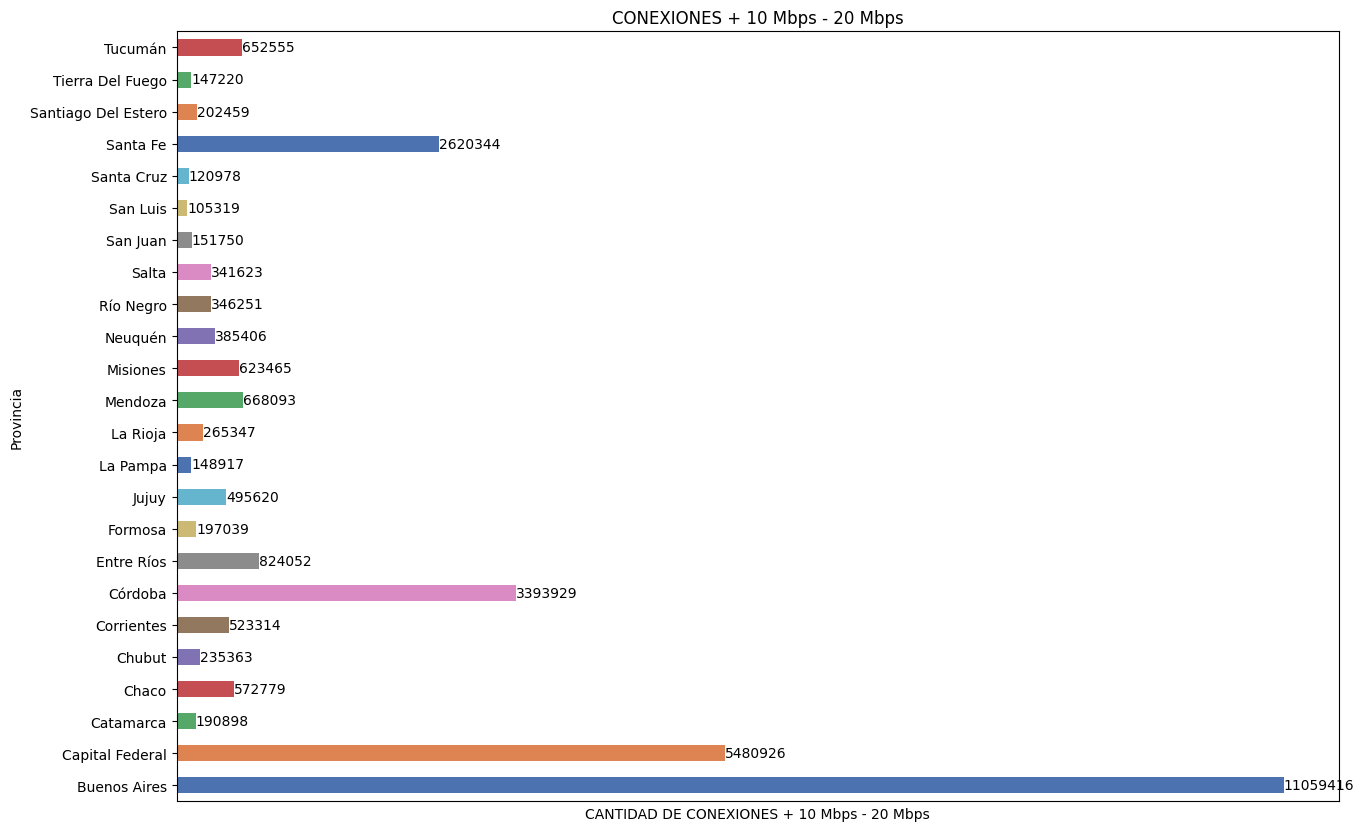

In [8]:
#Realizaré las suma de las conexiones mayor a 10 Mbps a 20 Mbps por provincias
counts = df_internet_acceso_por_velocidad.groupby('Provincia')['+ 10 Mbps - 20 Mbps'].sum()

# Crearé una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

plt.rcParams['figure.figsize'] = [15, 10]

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES + 10 Mbps - 20 Mbps')

for i, v in enumerate(counts):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')

# Agrego el título al gráfico
plt.title('CONEXIONES + 10 Mbps - 20 Mbps')

plt.xticks([])

Este grafico de barras muestra el numero de conexiones con una velocidad superior a 10 Mbps a 20 Mbps por provincia. La provinica de Neuquén tuvo      385.406 conexiones a internet con una velocidad mayor a 10 Mbps a 20 Mbps. La provincia de Catamarca tuvo 190.898 conexiones a internet con una velocidad mayor a 10 Mbps a 20 Mbps. 

CONEXIONES POR AÑO Y HASTA UN VELOCIDAD MAYOR A 20 Mbps a 30 Mbps

([], [])

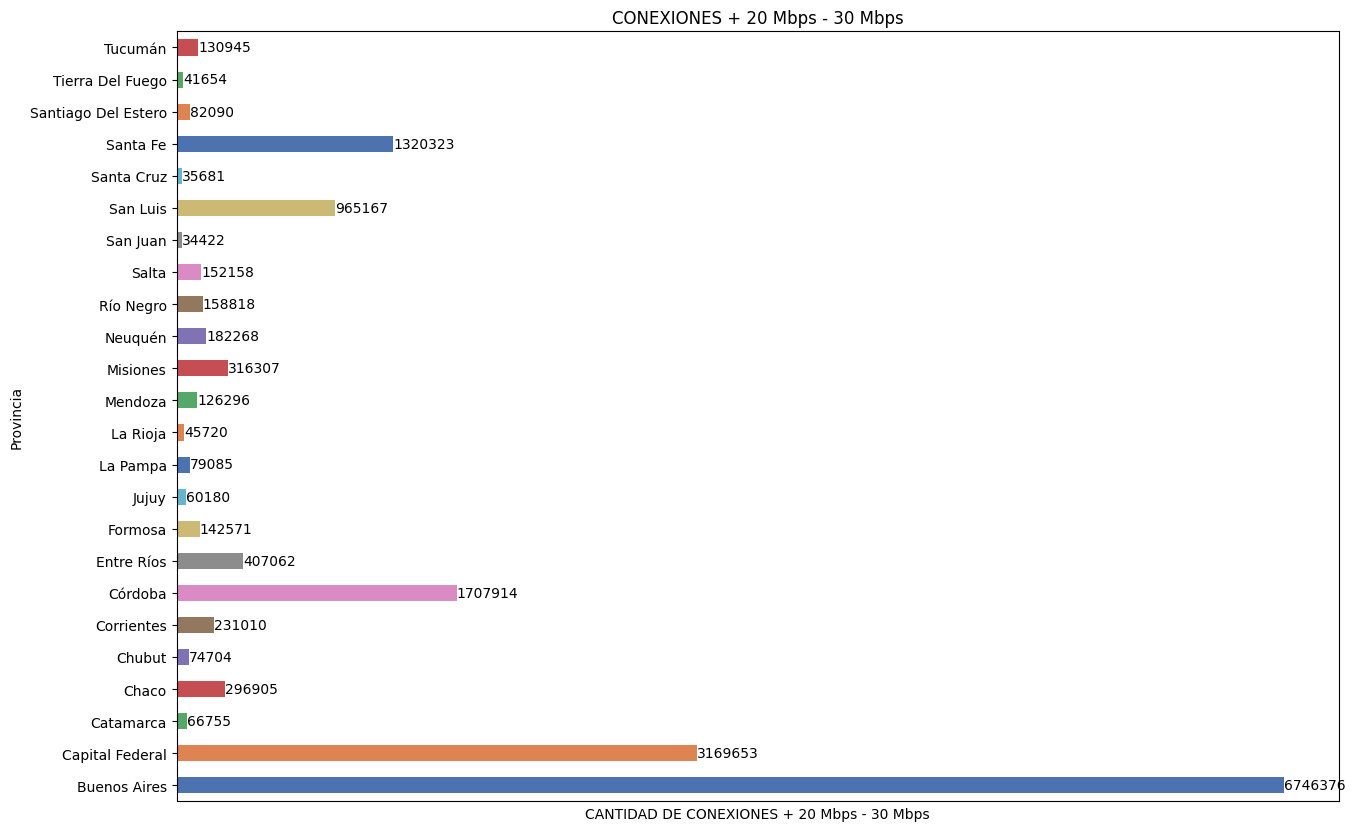

In [80]:
#Realizaré las suma de las conexiones superiores a 20 Mbps a 30 Mbps por provincias
counts = df_internet_acceso_por_velocidad.groupby('Provincia')['+ 20 Mbps - 30 Mbps'].sum()

# Crearé una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

plt.rcParams['figure.figsize'] = [15, 10]

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES + 20 Mbps - 30 Mbps')

for i, v in enumerate(counts):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')

# Agrego el título al gráfico
plt.title('CONEXIONES + 20 Mbps - 30 Mbps')

plt.xticks([])

Este grafico de barras muestra las conexiones a internet con una velocidad superior a 20 Mbps a 30 Mbps por provincia. La provincia del Mendoza tuvo   126.296 conexiones a internet con una velocidad superior a 20 Mbps a 30 Mbps. La provincia de Córdoba tuvo 1.707.914 conexiones a internet con una velocidad superior a 20 Mbps a 30 Mbps. La provincia de Jujuy tuvo 60180 conexiones a internet con una velocidad superior a 20 Mbps a 30 Mbps.

CONEXIONES POR PROVINCIA Y UNA VELOCIDAD MAYOR A 30 Mbps

([], [])

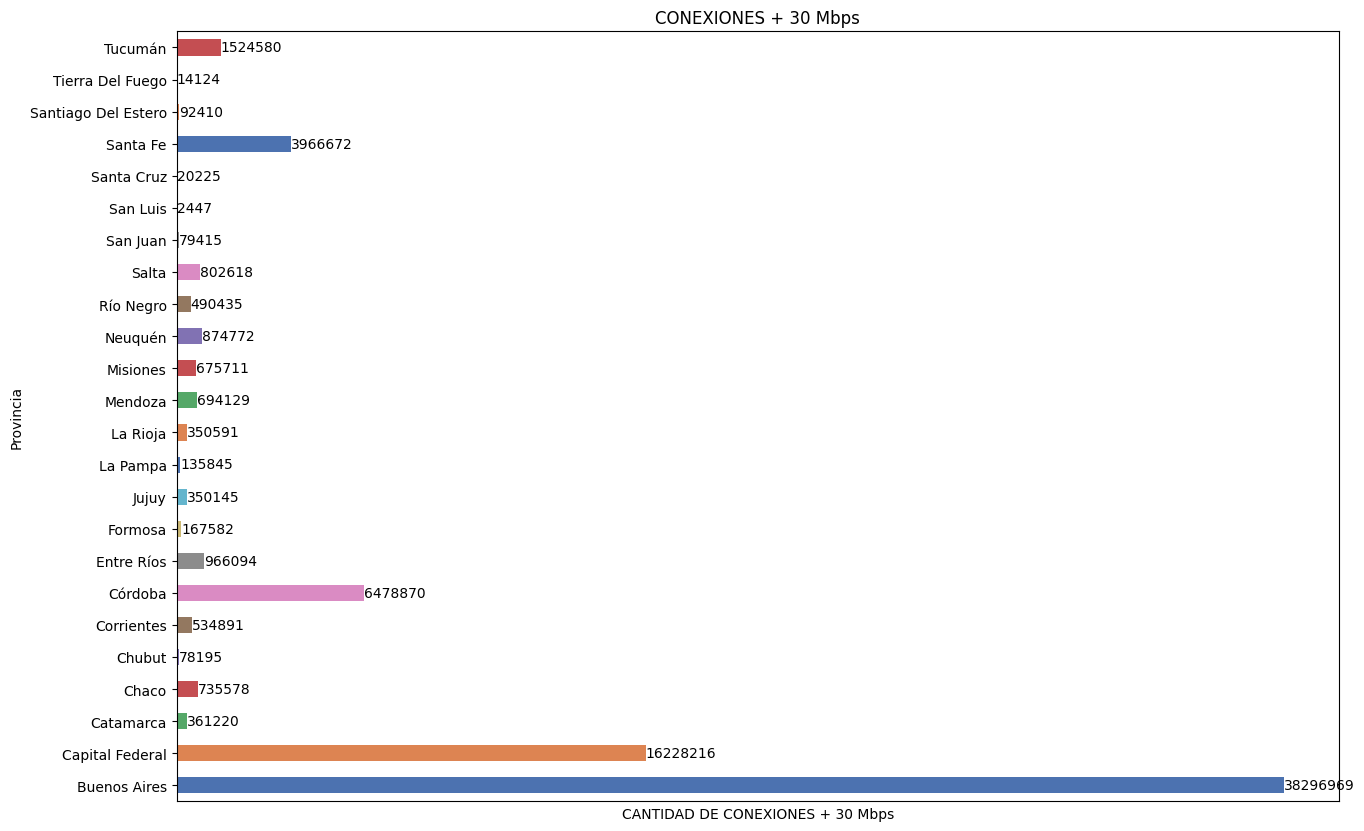

In [81]:
#Realizaré las suma de las conexiones superiores a 30 Mbps por provincias
counts = df_internet_acceso_por_velocidad.groupby('Provincia')['+ 30 Mbps'].sum()

# Crearé una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

plt.rcParams['figure.figsize'] = [15, 10]

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES + 30 Mbps')

for i, v in enumerate(counts):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')

# Agrego el título al gráfico
plt.title('CONEXIONES + 30 Mbps')

plt.xticks([])

Esta grafico de barras muestra el numero de conexiones a internet con una velocidad superior a 30 Mbps. En la provincia de Tierra del Fuego hubo       14.124 conexiones a internet con una velocidad superior a 30 Mbps. En la provincia de Santa Cruz hubo 20.225 conexiones a internet con una velocidad superior a 30 Mbps. En la Capital Federal hubo 16.228.216 conexiones a internet con una velocidad superior a 30 Mbps. 

OTROS

([], [])

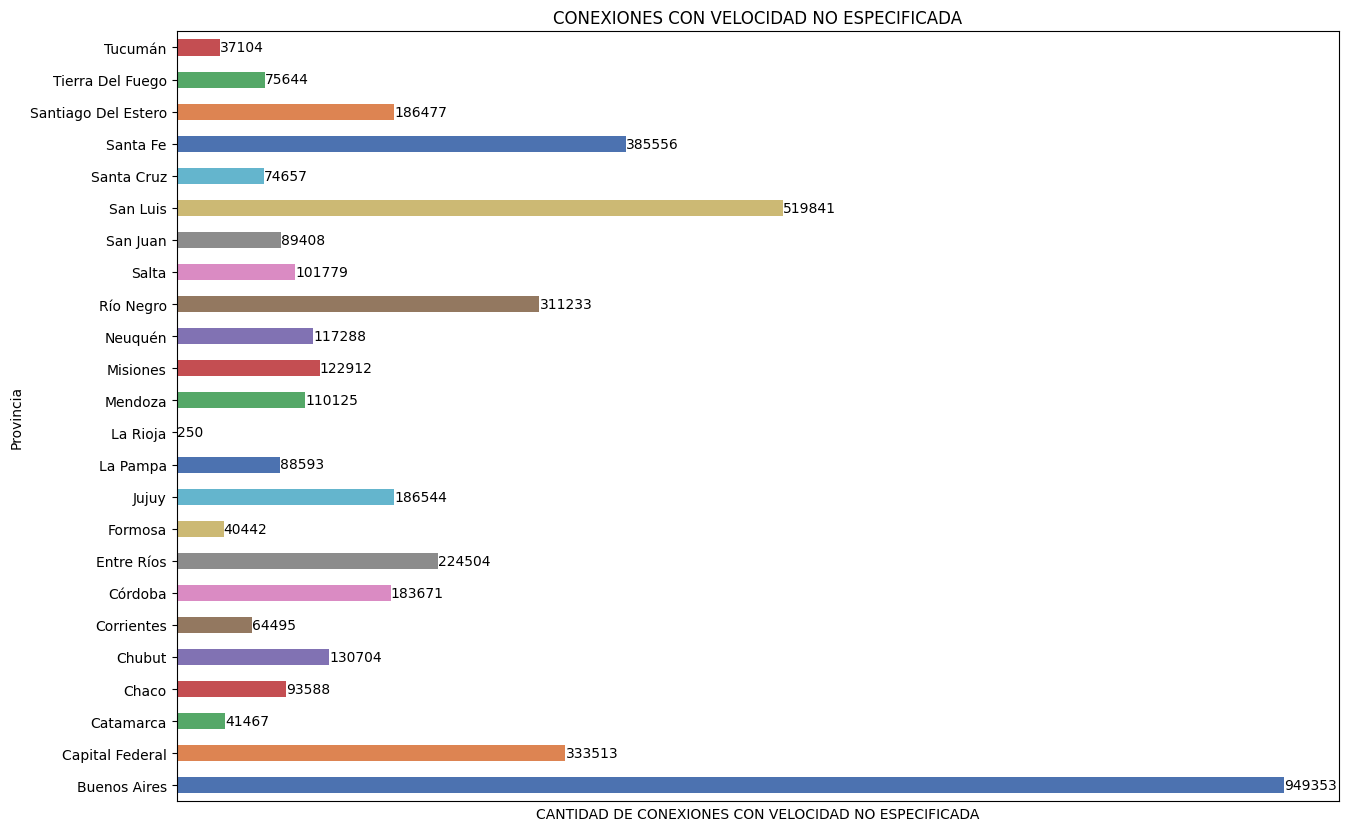

In [72]:
#Realizaré las suma de las conexiones de otras velocidades no especificadas por provincias
counts = df_internet_acceso_por_velocidad.groupby('Provincia')['OTROS'].sum()

# Crearé una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

plt.rcParams['figure.figsize'] = [15, 10]

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD DE CONEXIONES CON VELOCIDAD NO ESPECIFICADA')

for i, v in enumerate(counts):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')

# Agrego el título al gráfico
plt.title('CONEXIONES CON VELOCIDAD NO ESPECIFICADA')

plt.xticks([])

Este grafico nos muestra las conexiones a internet por provincia en las que la velocidad no fue detallada. En Catamarca hubo 41.467 conexiones a internet sin que se detallará una velocidad. La Capital Federal tuvo 333.513 conexiones en las que la velocidad no fue detallada.

TOTAL

([], [])

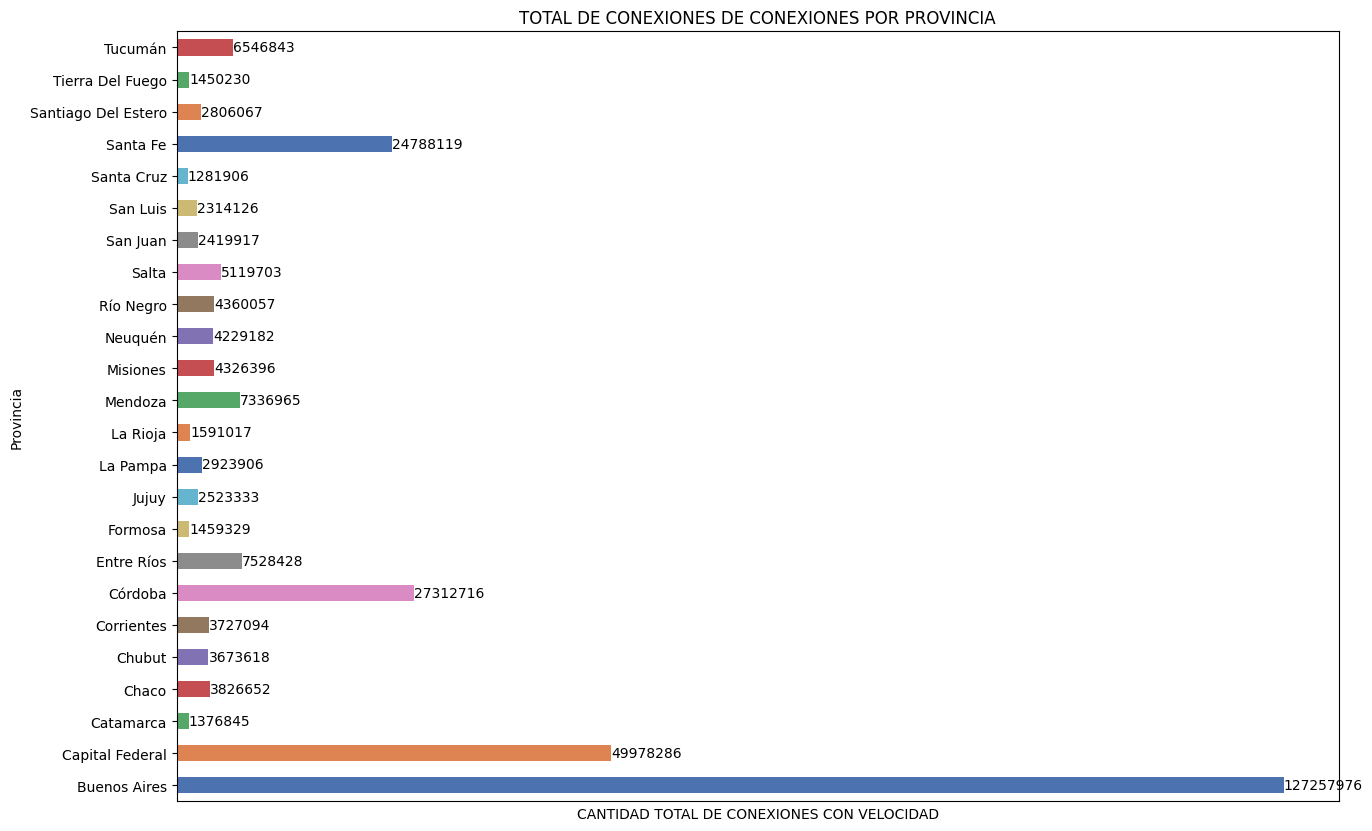

In [10]:
#Realizaré las suma de todas las conexiones por provincias
counts = df_internet_acceso_por_velocidad.groupby('Provincia')['Total'].sum()

# Crearé una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

plt.rcParams['figure.figsize'] = [15, 10]

# Grafico los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agrego el título al eje x
plt.xlabel('CANTIDAD TOTAL DE CONEXIONES CON VELOCIDAD')

for i, v in enumerate(counts):
    plt.annotate(str(v), xy=(v, i), ha='left', va='center')

# Agrego el título al gráfico
plt.title('TOTAL DE CONEXIONES DE CONEXIONES POR PROVINCIA')

plt.xticks([])

Este grafico nos muestra el total de las conexiones por provincia. En la provincia de Chaco se realizaron en total 3826652 conexiones. En la provincia de Formosa se realizaron en total 1.459.329 

Creare un dataframe a partir del csv

In [82]:
df_internet_por_tecnologia = pd.read_csv('../ETL/internet_tecnologia.csv')

Vamos a ver el dataframe

In [83]:
df_internet_por_tecnologia

Año  Trimestre            Provincia  ADSL  Cablemodem  Fibra óptica  \
0    2022          4         Buenos Aires   326           3             1   
1    2022          4      Capital Federal   139           1           139   
2    2022          4            Catamarca     9          11            47   
3    2022          4                Chaco    25          61            47   
4    2022          4               Chubut    45          74            10   
..    ...        ...                  ...   ...         ...           ...   
859  2014          1           Santa Cruz    19         100           381   
860  2014          1             Santa Fe   323         174             3   
861  2014          1  Santiago Del Estero    33           4            19   
862  2014          1     Tierra Del Fuego    22           3           648   
863  2014          1              Tucumán   130          83           121   

     Wireless  Otros  Total  
0         130     72      5  
1           5     32      2  
2           1      2     71  
3           8      3    144  
4          31      9    169  
..        ...    ...    ...  
859         4      3     27  
860         6    644    507  
861       915     34     37  
862         1      3     28  
863        13     98    130  

[864 rows x 9 columns]

Voy a ver la información del dataframe para saber si tiene nulos

In [32]:
df_internet_por_tecnologia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           864 non-null    int64 
 1   Trimestre     864 non-null    object
 2   Provincia     864 non-null    object
 3   ADSL          864 non-null    int64 
 4   Cablemodem    864 non-null    int64 
 5   Fibra óptica  864 non-null    int64 
 6   Wireless      864 non-null    int64 
 7   Otros         864 non-null    int64 
 8   Total         864 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 60.9+ KB


Voy a ver si tiene duplicados

In [33]:
duplicates = df_internet_por_tecnologia.duplicated()
if duplicates.any():
    print("Hay filas duplicadas en el conjunto de datos:")
    print(df_internet_por_tecnologia[duplicates])
else:
    print("No hay filas duplicadas en el conjunto de datos.")

No hay filas duplicadas en el conjunto de datos.


Este dataframe nos muestra las distintas modalidades de acceso a internet teniendo en cuenta la tecnologia y nos brinda información por trimestre y por provincia. No posee nulos y tampoco duplicados. Tiene 864 filas y 9 columnas. Las columnas se detallan a continuación:
- Año: Detalla el año al que pertenece la informacion de la modalidad de acceso a internet teniendo en cuenta la tecnologia. Se tiene datos desde el 2014 a 2022.
- Trimestre: Detalla el trimestre al que pertenecen los datos.
- Provincia: Detalla la provincia de Argentina a la que pertence los datos.
- ADSL: esta columna nos muestra la cantidad de accesos a internet a través de la modalidad ADSL. Esta es una tecnología de conexión a Internet que utiliza cables de cobre para transmitir datos. La velocidad de descarga es mayor que la de carga. Por lo tanto, se llama “asimétrica”.
- Cablemodem: esta columna nos muestra la cantidad de acceso a internet a través de la modalidad Cablemodem.  Un cablemódem es un tipo de módem que se utiliza para conectarse a Internet mediante una línea de televisión por cable. Los módems por cable suelen ser mucho más rápidos que otros tipos de módems, como los de acceso telefónico, y pueden proporcionar velocidades de Internet de hasta 1 Gigabit por segundo1. El cablemódem se encarga de recibir la señal de datos del proveedor de servicios de Internet a través del cable coaxial y la convierte en una señal digital que puede ser utilizada por el ordenador o el dispositivo conectado.
- Fibra óptica: esta columna nos muestra la cantidad de accesos a internet a través de la modalidad Fibra óptica. La fibra óptica es un tipo de red fija que se apoya en un soporte físico muy delgado, como fibra de vidrio o plástico, utilizado para la transmisión de datos IP (por internet) a alta velocidad. La fibra óptica posee un núcleo de material transparente en el seno del cual la luz “rebota”, quedando atrapada en el cable. De esta forma, los datos, que corresponden a impulsos luminosos muy cortos, viajan a la velocidad de la luz (o casi, porque la velocidad de la luz en la fibra óptica siempre será menos elevada que la verdadera velocidad de la luz medida en el vacío). La fibra óptica es actualmente accesible a millones de hogares en todo el mundo y es una tecnología emblemática de internet de muy alta velocidad.
- Wireless: esta columna nos muestra la cantidad de accesos a internet de la modalidad Wireles. “Wireless” es una palabra en inglés que significa “inalámbrico”. En el contexto de la tecnología, “wireless” se refiere a la transmisión de datos sin cables. Por ejemplo, una red inalámbrica (o “Wi-Fi”) permite que los dispositivos se conecten a Internet sin necesidad de cables. En lugar de eso, los datos se transmiten a través del aire utilizando ondas de radio. 
- Otros: esta columna incluye la cantidad de accesos a internet a través de otras tecnologías de conexión a Internet que no se mencionan específicamente en el dataframe.
- Total: esta columna nos muestra la cantidad total de accesos a internet a a través de todas las tecnologías.

Voy a empezar a realizar el analisis de las variables categoricas 

Al Año lo voy a tomar como una variable categórica.

Voy mostrar cada una de las tecnologias de acceso a internet por año

ACCESO A INTERNET POR MODALIDAD ADSL POR AÑO

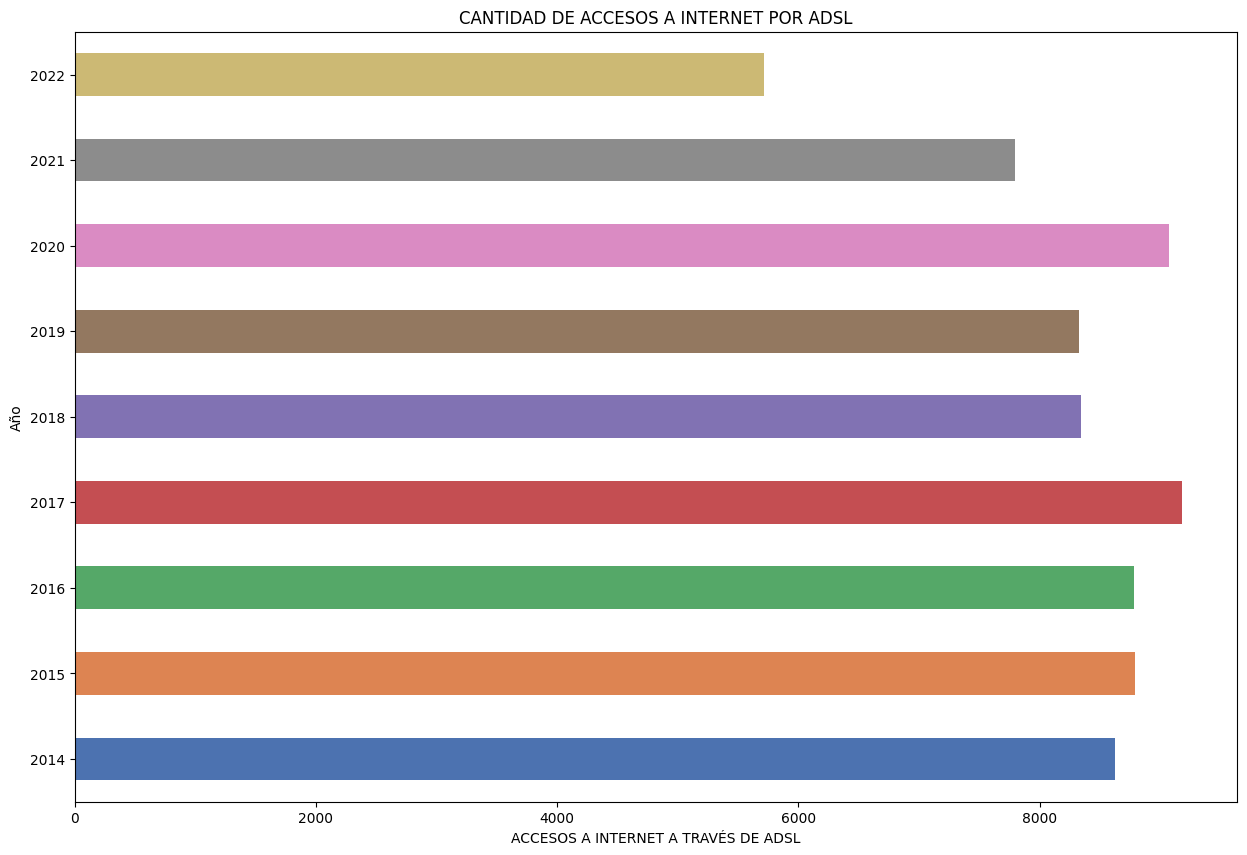

In [47]:
# Contamos el número de accesos a internet a través de ADSL por año
counts = df_internet_por_tecnologia.groupby('Año')['ADSL'].sum()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje y
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE ADSL')

# Agregamos el título al gráfico
plt.title('CANTIDAD DE ACCESOS A INTERNET POR ADSL')

# Mostramos el gráfico
plt.show()

Este gráfico de barras nos la cantidad de accesos a internet a través de la modalidad ADSL. En el año 2014 hubo 8620 accesos a internet a través de la modadalidad ADSL. En el año 2017 hubo 9176 accesos a internet a través de la modalida ADSL. Y en el año 2020 hubo 9071 accesos a internet a través de la modalida ADSL. 

ACCESO A INTERNET POR MODALIDAD CABLEMODEM POR AÑO

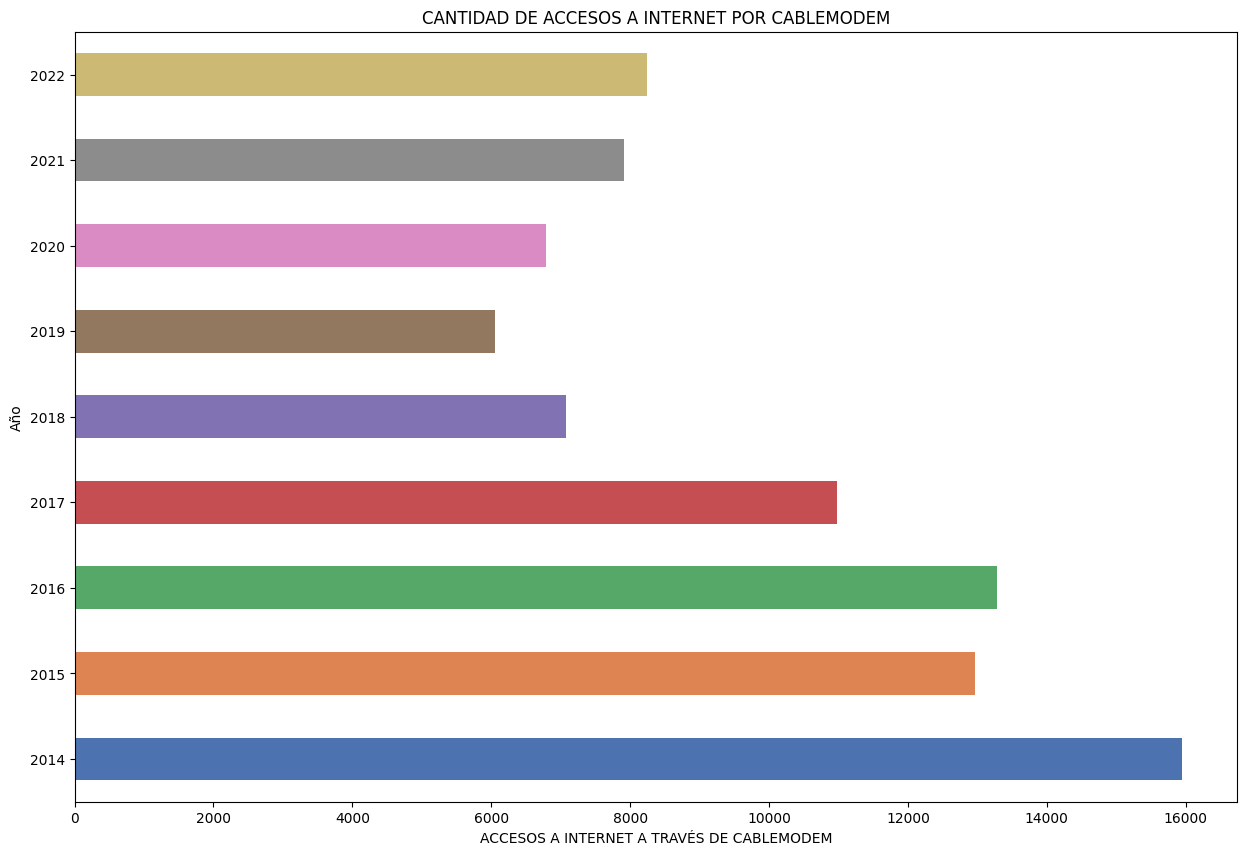

In [54]:
# Contamos el número de accesos a internet a través de Cablemodem por año
counts = df_internet_por_tecnologia.groupby('Año')['Cablemodem'].sum()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE CABLEMODEM')

# Agregamos el título al gráfico
plt.title('CANTIDAD DE ACCESOS A INTERNET POR CABLEMODEM')

# Mostramos el gráfico
plt.show()

Este grafico de barra muestra la cantidad de accesos a internet a través de la modalidad de Cablemodem. En el año 2015 hubo 8789 accesos a internet a través de Cablemodem. En el año 2018 hubo 8344 accesos a internet a través de Cablemodem. En el año 2022 hubo 5715 accesos a internet a través de Cablemodem. 

ACCESO A INTERNET POR MODALIDAD FIBRA ÓPTICA POR AÑO

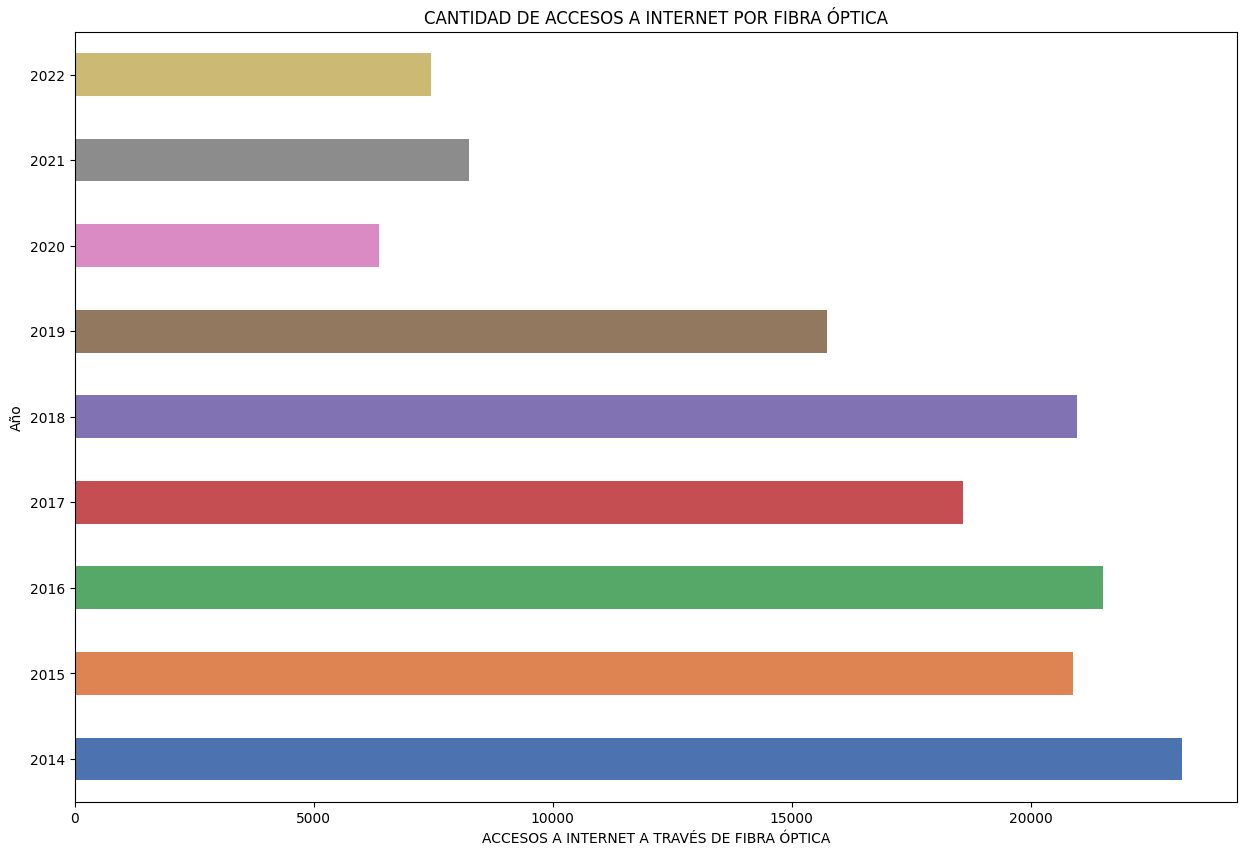

In [53]:
# Contamos el número de accesos a internet a través de Fibra óptica por año
counts = df_internet_por_tecnologia.groupby('Año')['Fibra óptica'].sum()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE FIBRA ÓPTICA')

# Agregamos el título al gráfico
plt.title('CANTIDAD DE ACCESOS A INTERNET POR FIBRA ÓPTICA')

# Mostramos el gráfico
plt.show()

Este gráfico muestra la cantidad de accesos a internet a través de la modalidad Fibra óptica. En el año 2016 hubo 21509 accesos a internet a través de fibra óptica. En el año 2018 hubo 20978 accesos a internet a través de fibra óptica. En el año 2022 hubo 7457 accesos a internet a través de fibra óptica.

ACCESO A INTERNET POR MODALIDAD WIRELESS POR AÑO

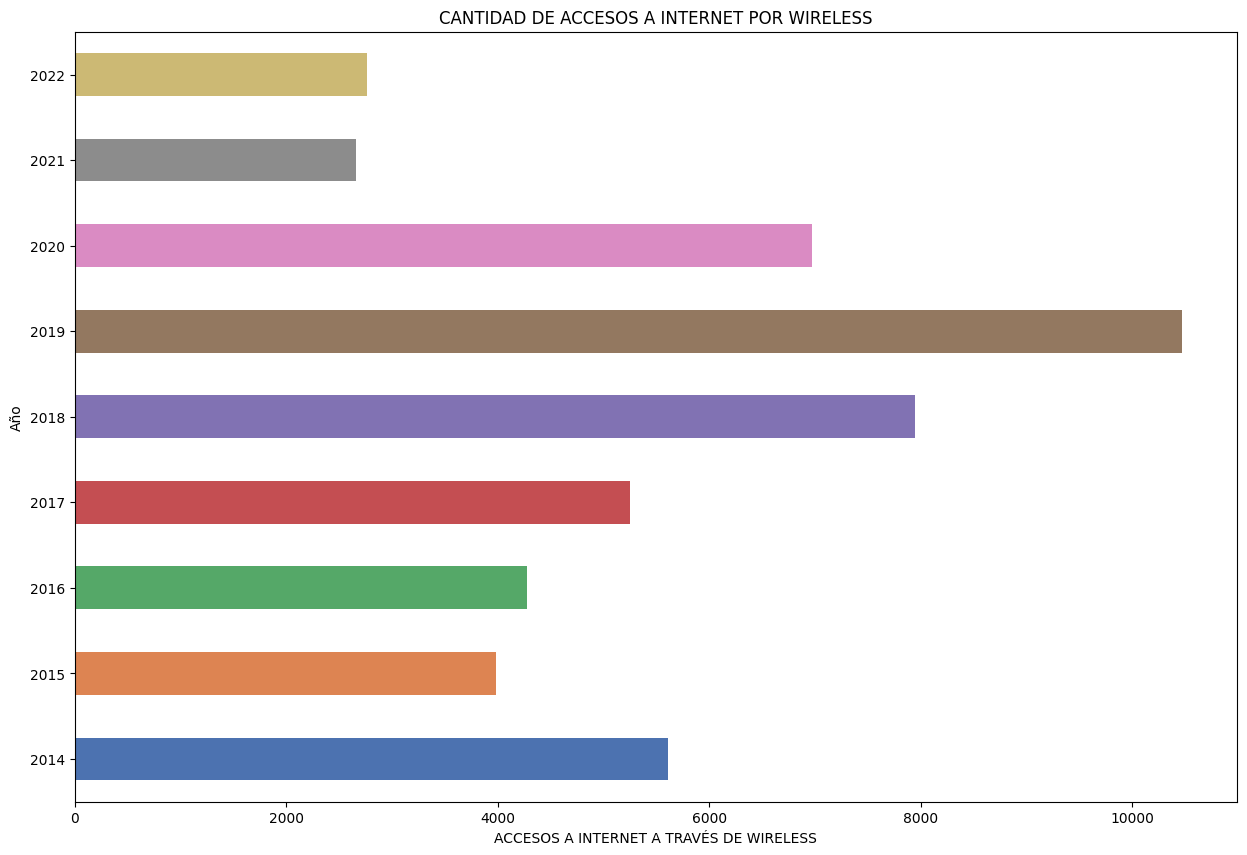

In [52]:
# Contamos el número de accesos a internet a través de Wireless por año
counts = df_internet_por_tecnologia.groupby('Año')['Wireless'].sum()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE WIRELESS')

# Agregamos el título al gráfico
plt.title('CANTIDAD DE ACCESOS A INTERNET POR WIRELESS')

# Mostramos el gráfico
plt.show()

Este gráfico muestra la cantidad de accesos a internet por la modalidad Wireless. En el año 2017 hubo 5248 accesos a internet a través de la modalidad Wireless. En el año 2019 hubo 10466 accesos a internet a través de la modalidad Wireless. En el año 2022 hubo 2765 accesos a internet a través de la modalidad Wireless.

ACCESO A INTERNET POR MODALIDAD OTROS (NO ESPECIFICADA ANTERIORMENTE) POR AÑO

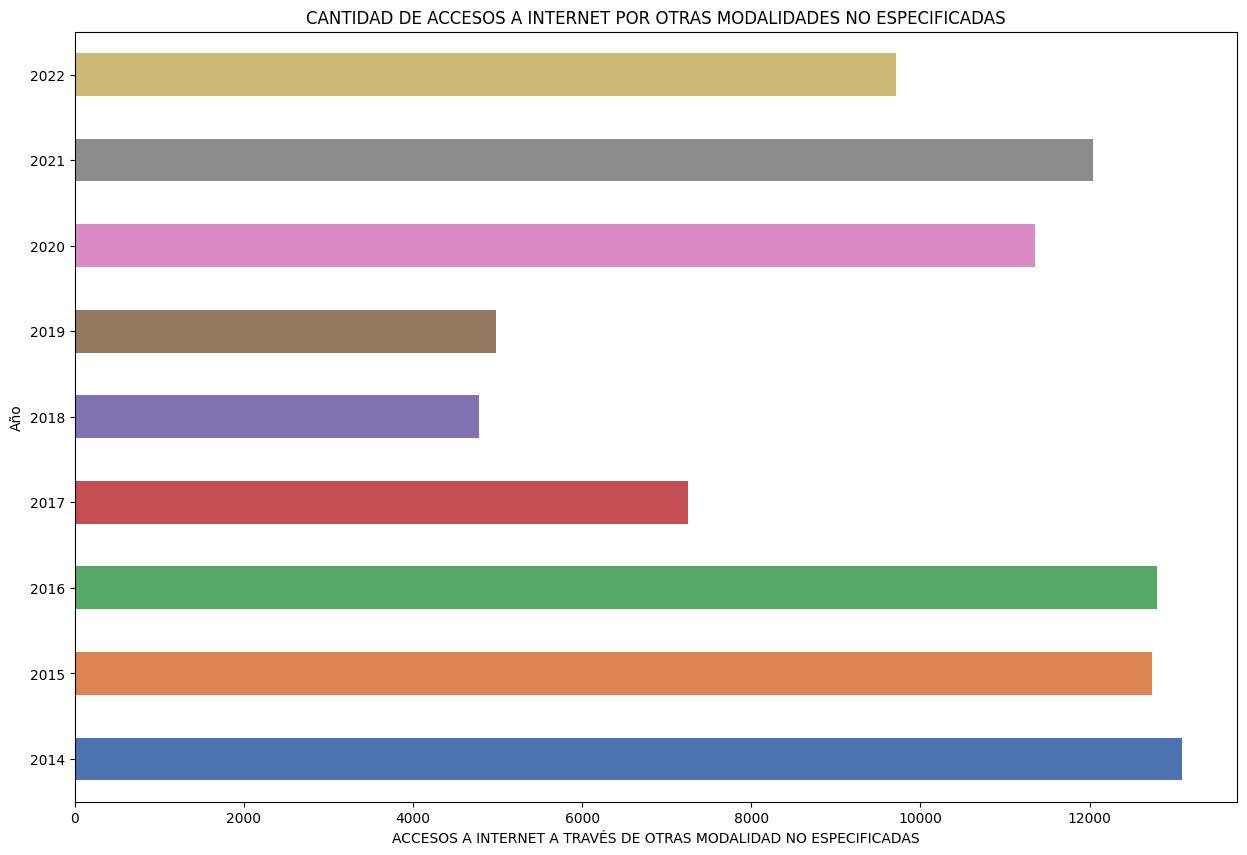

In [51]:
# Contamos el número de accesos a internet a través de Otras modalidades no especificadas teniendo en cuenta el año
counts = df_internet_por_tecnologia.groupby('Año')['Otros'].sum()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE OTRAS MODALIDAD NO ESPECIFICADAS')

# Agregamos el título al gráfico
plt.title('CANTIDAD DE ACCESOS A INTERNET POR OTRAS MODALIDADES NO ESPECIFICADAS')

# Mostramos el gráfico
plt.show()

TOTAL DE ACCESOS A INTERNET EN TODAS SUS MODALIDADES POR AÑO 

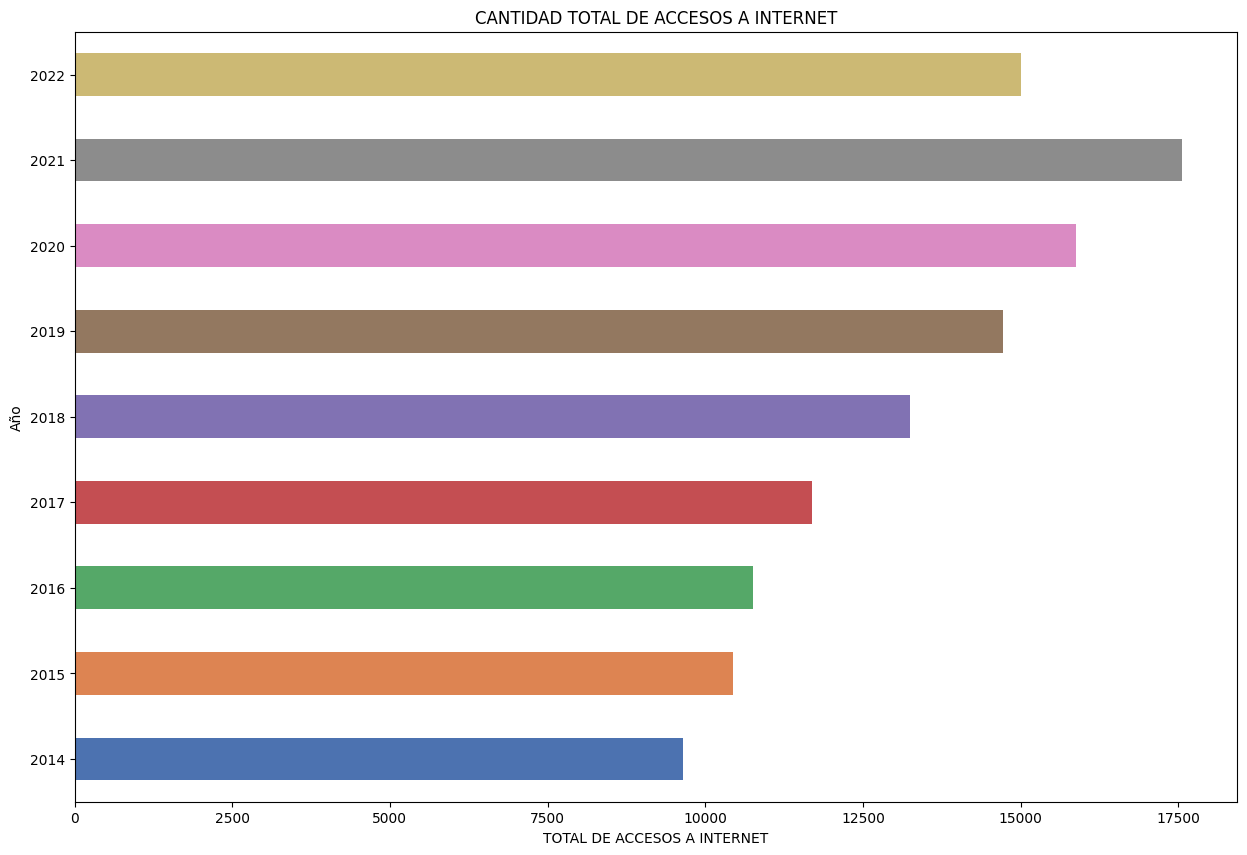

In [55]:
# Contamos el número el accesos a internet en todas sus modalidades por año
counts = df_internet_por_tecnologia.groupby('Año')['Total'].sum()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje y
plt.xlabel('TOTAL DE ACCESOS A INTERNET')

# Agregamos el título al gráfico
plt.title('CANTIDAD TOTAL DE ACCESOS A INTERNET')

# Mostramos el gráfico
plt.show()

Este grafico de barra muestra el total de accesos a internet en todas sus modalidades. En el año 2014 hubo en total 9643 accesos a internet en todas las modalidades. En el año 2018 hubo en total 13243 accesos a internet en todas las modalidades. Y en el año 2021 hubo en total 17551 accesos a internet en todas las modalidades. 

Ahora voy a mostrar por trimestres cada una de las modalidades 

ACCESOS A INTERNET A TRAVES DE ADSL POR TRIMESTRE

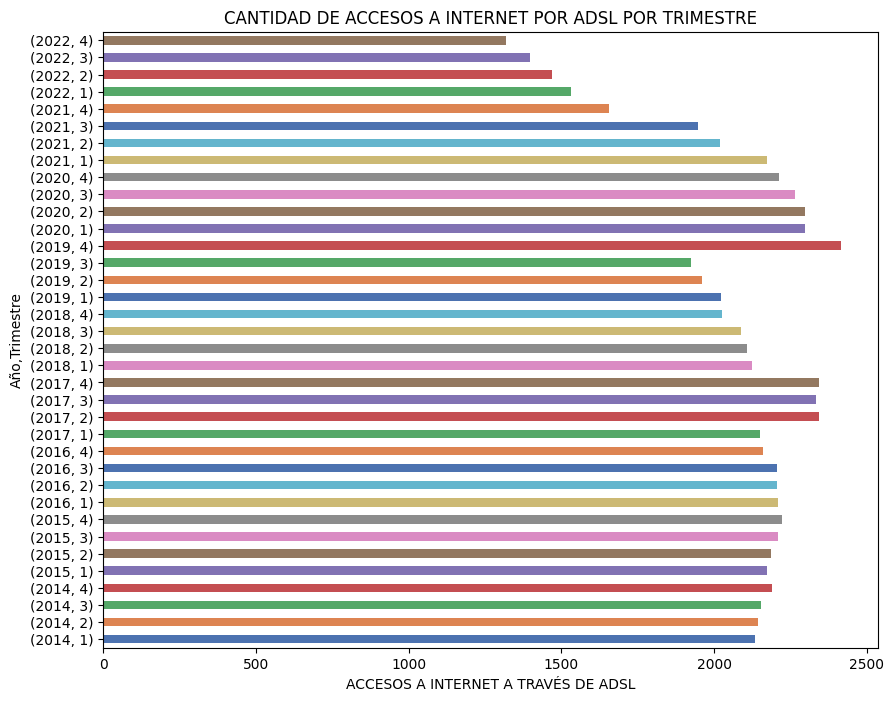

In [85]:
# Agrupamos los datos por año y trimestre y sumamos la columna ADSL
counts = df_internet_por_tecnologia.groupby(['Año', 'Trimestre'])['ADSL'].sum()
# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Creamos un gráfico de barras horizontal
plt.figure(figsize=(10, 8))
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE ADSL')

# Agregamos el título al gráfico
plt.title('CANTIDAD DE ACCESOS A INTERNET POR ADSL POR TRIMESTRE')

# Mostramos el gráfico
plt.show()

Esta grafico nos muestra la cantidad de accesos a través de la modalidad ADSL por trimestre. En el primer trimestre del año 2014 hubo 2135 accesos a internet a través de la modalidad ADSL. En el segungo trimestre del año 2016 hubo 2205 accesos a internet a través de la modalidad ADSL. En el cuarto trimestre del año 2019 hubo 2416 accesos a internet a través de la modalidad ADSL.

ACCESOS A INTERNET A TRAVES DE CABLEMODEM POR TRIMESTRE

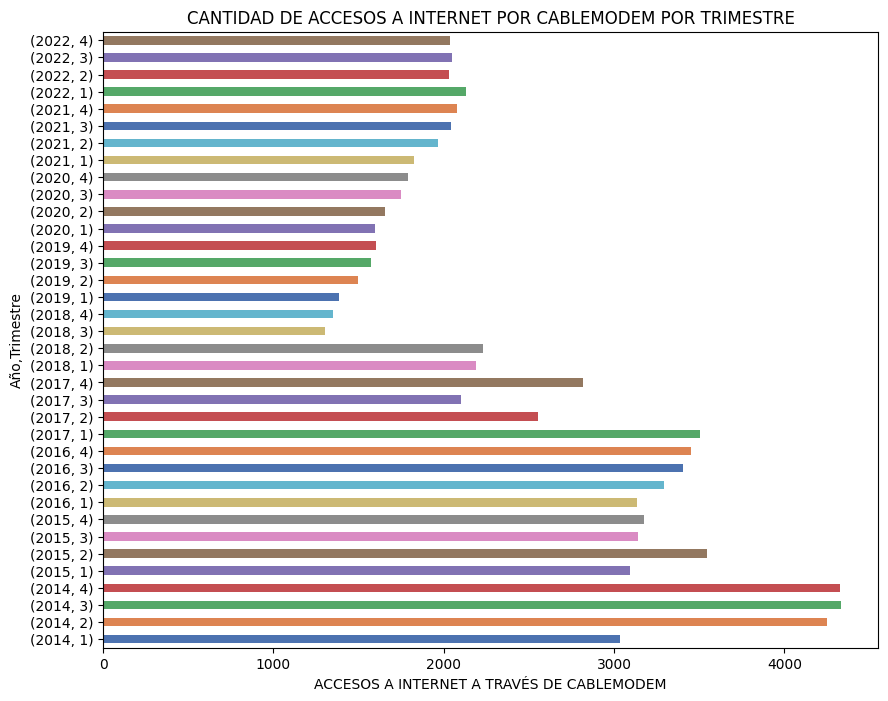

In [87]:
# Agrupamos los datos por año y trimestre y sumamos la columna Cablemodem
counts = df_internet_por_tecnologia.groupby(['Año', 'Trimestre'])['Cablemodem'].sum()
# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Creamos un gráfico de barras horizontal
plt.figure(figsize=(10, 8))
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE CABLEMODEM')

# Agregamos el título al gráfico
plt.title('CANTIDAD DE ACCESOS A INTERNET POR CABLEMODEM POR TRIMESTRE')

# Mostramos el gráfico
plt.show()

Este grafico muestra la cantidad de accesos a internet por la modalidad de Cablemodem por trimestre. En el primer trimestre del año 2017 hubo 3506 accesos a internet por la modalidad de Cablemodem. En el segundo trimestre del año 2018 hubo 2233 accesos a internet por la modalidad de Cablemodem. En el cuarto trimestre del año 2022 hubo 2035 accesos a internet por la modalidad de Cablemodem. 

ACCESOS A INTERNET A TRAVES DE FIBRA OPTICA POR TRIMESTRE

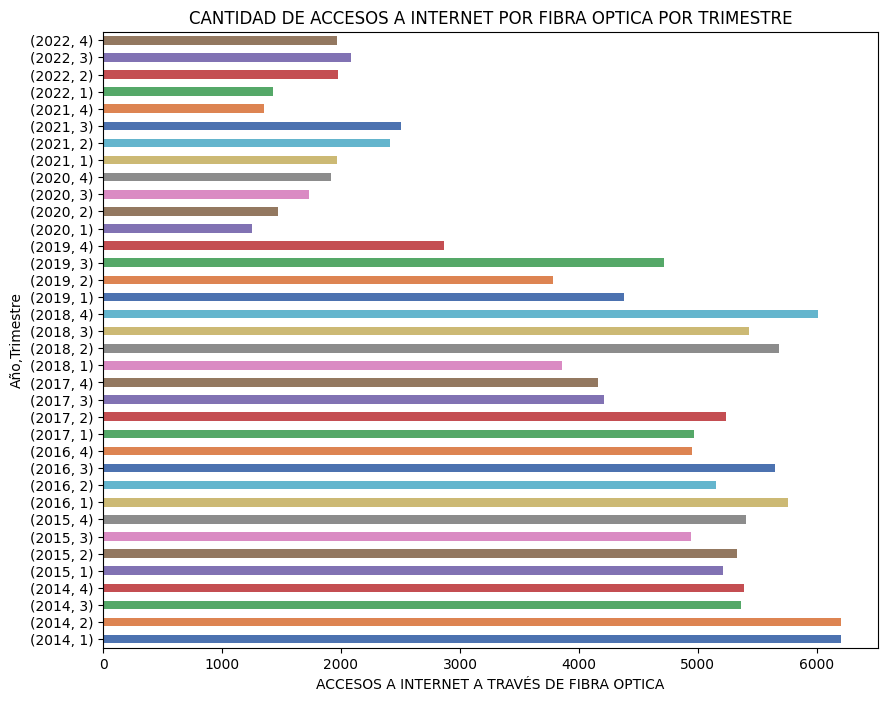

In [89]:
# Agrupamos los datos por año y trimestre y sumamos la columna Fibra óptica
counts = df_internet_por_tecnologia.groupby(['Año', 'Trimestre'])['Fibra óptica'].sum()
# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Creamos un gráfico de barras horizontal
plt.figure(figsize=(10, 8))
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE FIBRA OPTICA')

# Agregamos el título al gráfico
plt.title('CANTIDAD DE ACCESOS A INTERNET POR FIBRA OPTICA POR TRIMESTRE')

# Mostramos el gráfico
plt.show()

Este grafico muestra la cantidad de accesos a internet por la modalidad Fibra óptica por trimestre. En el primer trimestre del año 2016 hubo 5756 accesos a internet a través de la modalidad de fibra óptica. En el segundo trimestre del año 2017 hubo 5234 accesos a internet a través de la modalidad de fibra óptica. En el tercer trimestre del año 2019 hubo 2867 accesos a internet a través de la modalidad de fibra óptica. 

ACCESOS A INTERNET A TRAVES DE WIRELESS POR TRIMESTRE

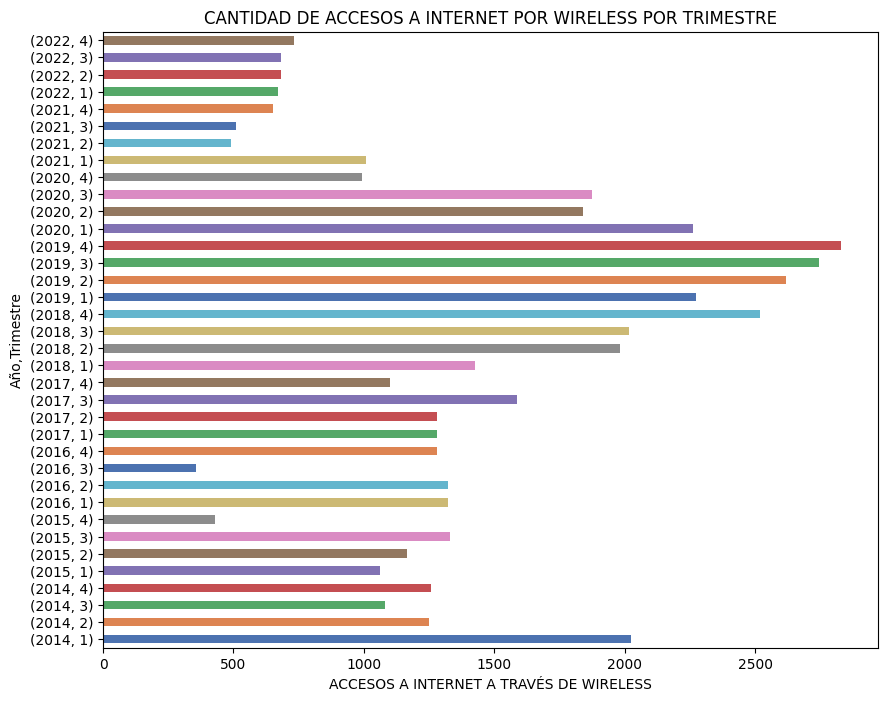

In [91]:
# Agrupamos los datos por año y trimestre y sumamos la columna Wireless
counts = df_internet_por_tecnologia.groupby(['Año', 'Trimestre'])['Wireless'].sum()
# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Creamos un gráfico de barras horizontal
plt.figure(figsize=(10, 8))
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE WIRELESS')

# Agregamos el título al gráfico
plt.title('CANTIDAD DE ACCESOS A INTERNET POR WIRELESS POR TRIMESTRE')

# Mostramos el gráfico
plt.show()

Este grafico muestra la cantidad de accesos a internet a través de la modalidad Wireless por trimestre. En el tercer trimestre del año 2018 hubo 2017 accesos a internet a través de la modalidad wireless. En el cuarto trimestre de 2022 hubo 731 accesos a internet a través de la modalidad wireless.

ACCESOS A INTERNET A TRAVES DE OTROS POR TRIMESTRE

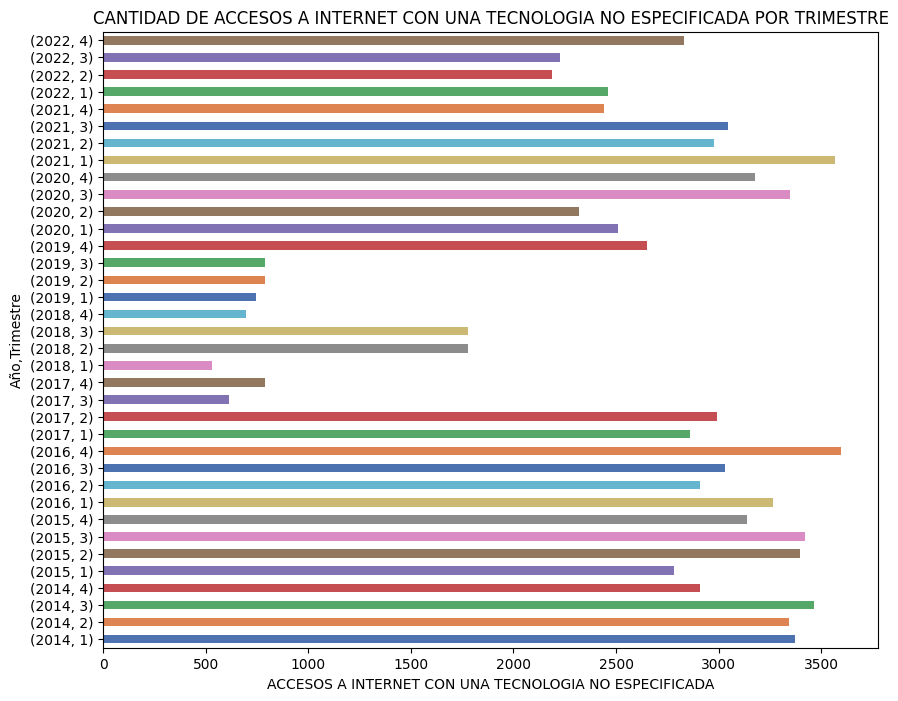

In [93]:
# Agrupamos los datos por año y trimestre y sumamos los otros accesos a internet
counts = df_internet_por_tecnologia.groupby(['Año', 'Trimestre'])['Otros'].sum()
# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Creamos un gráfico de barras horizontal
plt.figure(figsize=(10, 8))
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET CON UNA TECNOLOGIA NO ESPECIFICADA')

# Agregamos el título al gráfico
plt.title('CANTIDAD DE ACCESOS A INTERNET CON UNA TECNOLOGIA NO ESPECIFICADA POR TRIMESTRE')

# Mostramos el gráfico
plt.show()

Este grafico muestra la cantidad de accesos a internet a través de una modalidad no especificada y por trimestre. En el tercer trimestre del año 2019 hubo 2650 accesos a internet a través de una modalidad no especificada. En el cuarto trimestre del año 2022 hubo 2829 accesos a internet a través de una modalidad no especificada. 

TOTAL DE ACCESOS A INTERNET A TRAVES DE TODAS LAS MODALIDADES POR TRIMESTRE

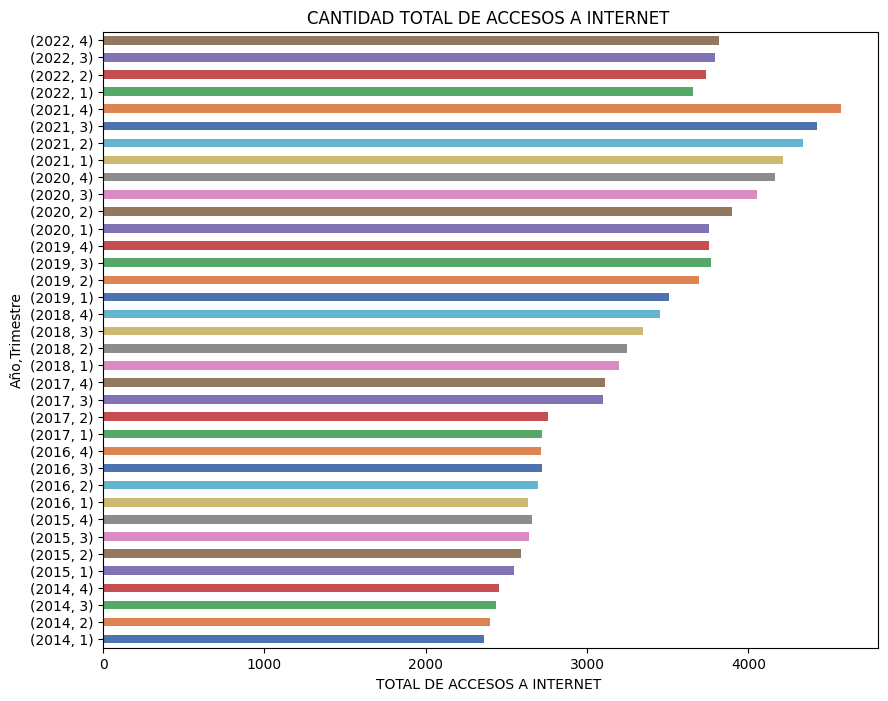

In [95]:
# Agrupamos los datos por año y trimestre y sumamos todos los accesos a internet
counts = df_internet_por_tecnologia.groupby(['Año', 'Trimestre'])['Total'].sum()
# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Creamos un gráfico de barras horizontal
plt.figure(figsize=(10, 8))
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('TOTAL DE ACCESOS A INTERNET ')

# Agregamos el título al gráfico
plt.title('CANTIDAD TOTAL DE ACCESOS A INTERNET ')

# Mostramos el gráfico
plt.show()

Este grafico de barra muestra la cantidad de accesos a internet. En el primer trimestre del año 2016 hubo en total 2631 acceso a internet. En el año cuarto trimestre del año 2018 hubo en total 3695 accesos a internet.

Ahora voy a analizar cada una de las modalidades de accesos a internet por provincia 

ACCESO A INTERNET A TRAVÉS DE ADSL POR PROVINCIA

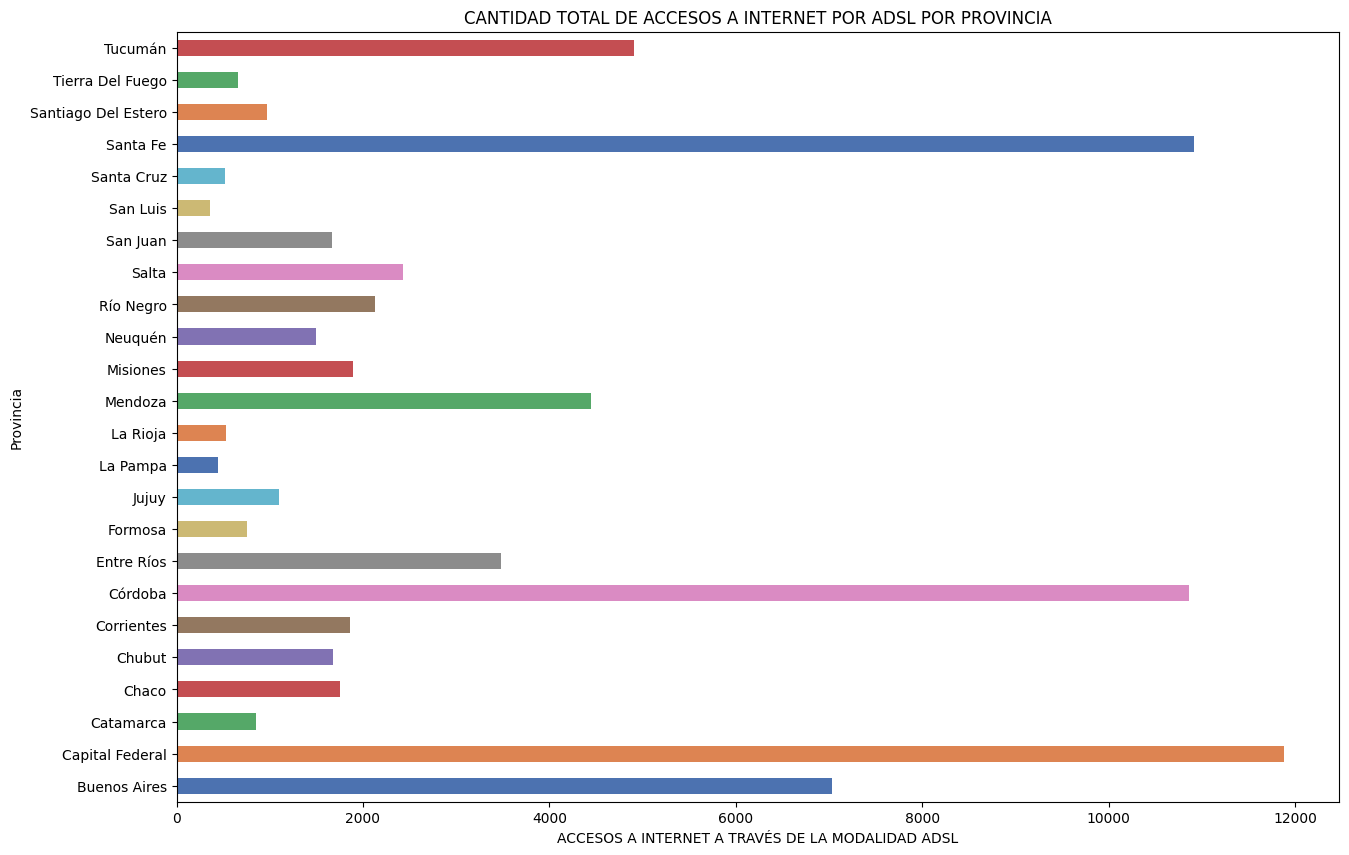

In [57]:
# Contamos el número de accesos a internet a través de ADSL por provincia
counts = df_internet_por_tecnologia.groupby('Provincia')['ADSL'].sum()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE LA MODALIDAD ADSL')

# Agregamos el título al gráfico
plt.title('CANTIDAD TOTAL DE ACCESOS A INTERNET POR ADSL POR PROVINCIA')

# Mostramos el gráfico
plt.show()

Este gráfico de barra muestra la cantidad de acceso a internet a través de la modalidad ADSL POR PROVINCIA. En la provincia de Buenos Aires hubo 7034 accesos a internet a través de la modalidad ADSL. En la provincia de Entre Rios hubo 3480 accesos a internet a través de la modalidad ADSL. En la provincia de Tierra Del Fuego hubo 664 accesos a internet a través de la modalidad ADSL.

ACCESO A INTERNET A TRAVÉS DE CABLEMODEM POR PROVINCIA

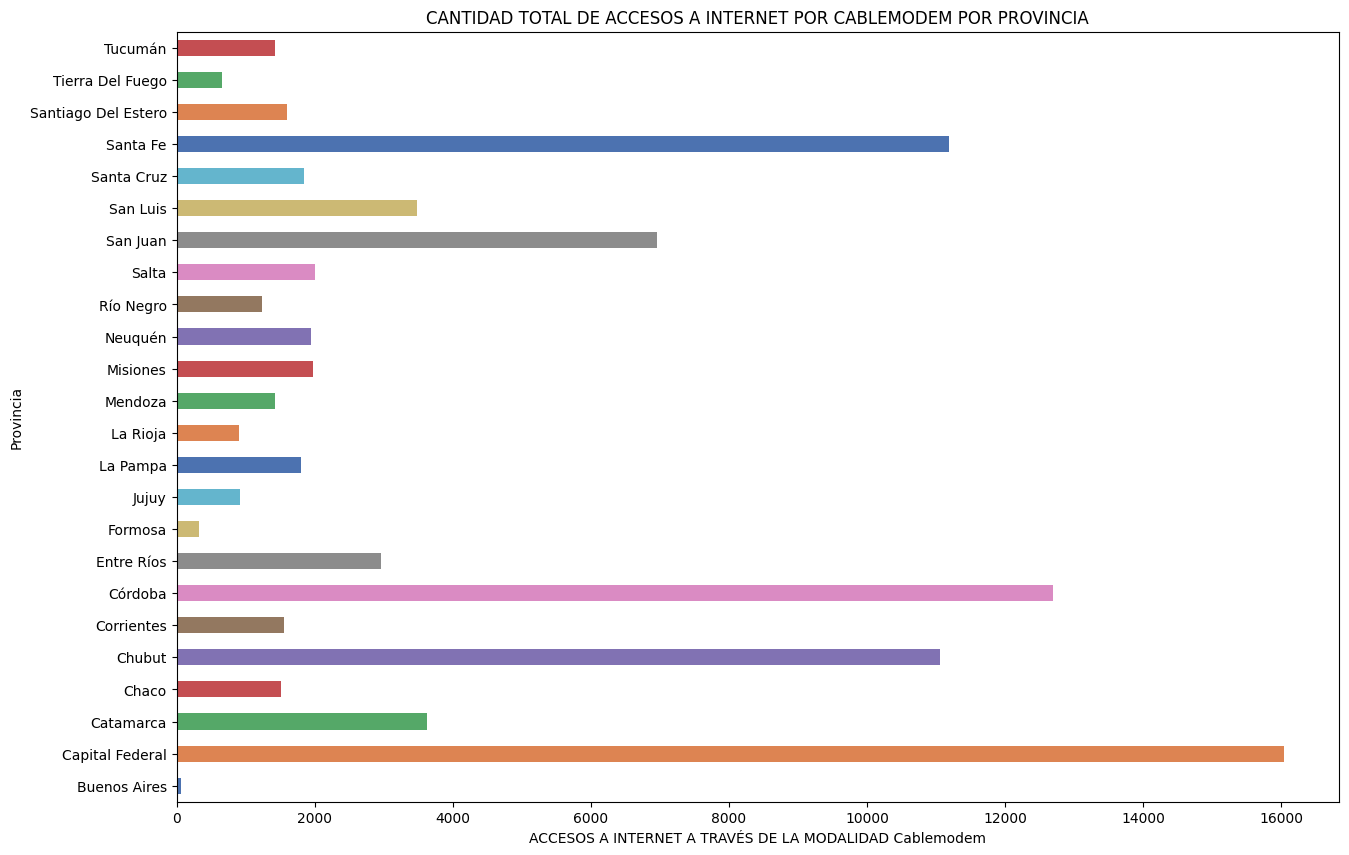

In [59]:
# Contamos el número de accesos a internet a través de Cablemodem por provincia
counts = df_internet_por_tecnologia.groupby('Provincia')['Cablemodem'].sum()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE LA MODALIDAD Cablemodem')

# Agregamos el título al gráfico
plt.title('CANTIDAD TOTAL DE ACCESOS A INTERNET POR CABLEMODEM POR PROVINCIA')

# Mostramos el gráfico
plt.show()

Este grafico de barra muestra la cantidad de accesos a internet a través de la modalidad Cablemodem por provincia. En la provincia de Catamarca hubo 3633 accesos a internet a través de la modalidad Cablemodem. En la provincia de Córdoba hubo 12693 accesos a internet a través de la modalidad Cablemodem. En la provincia de Salta hubo 1999 accesos a internet a través de la modalidad Cablemodem.

ACCESO A INTERNET A TRAVÉS DE FIBRA ÓPTICA POR PROVINCIA

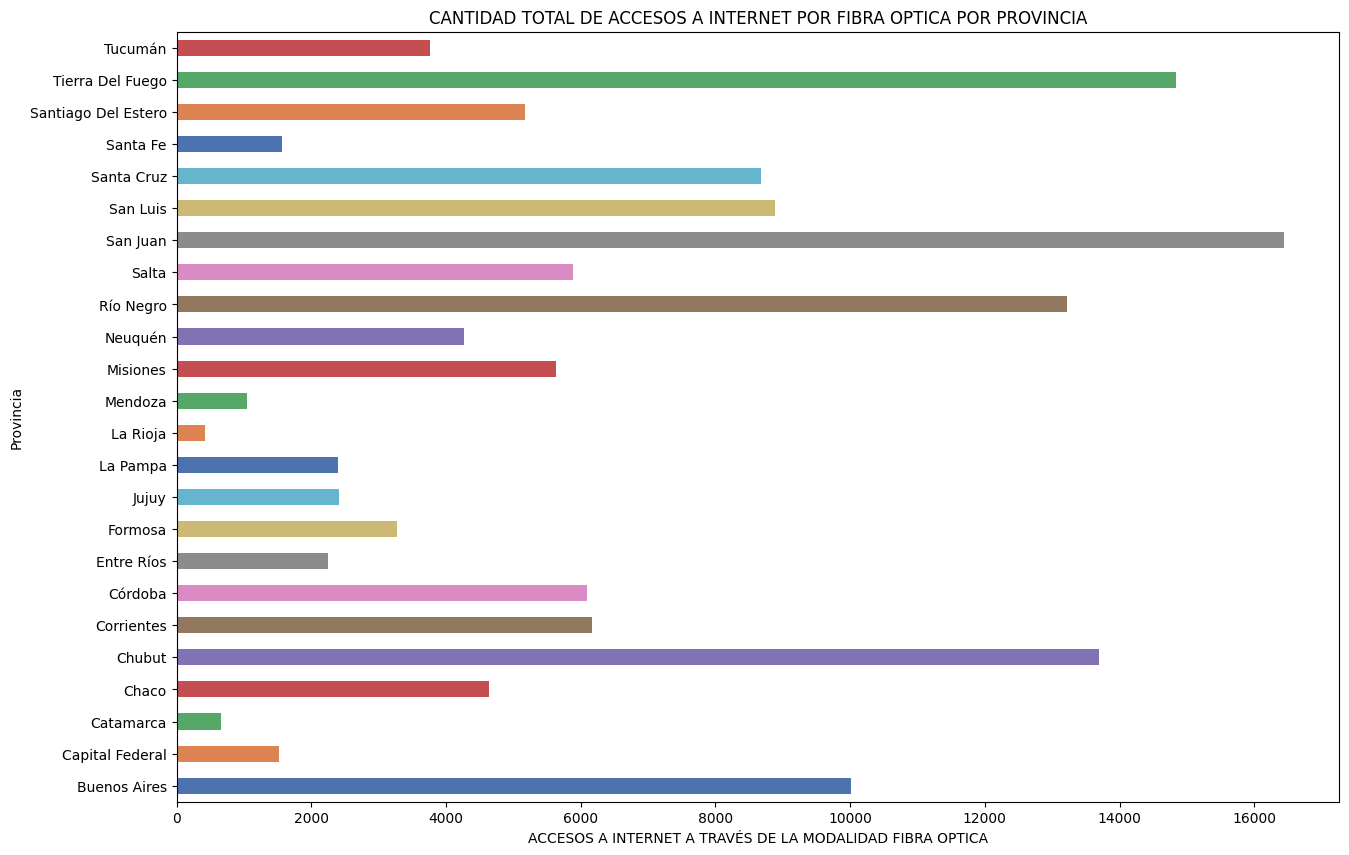

In [63]:
# Contamos el número de accesos a internet a través de Fibra óptica por provincia
counts = df_internet_por_tecnologia.groupby('Provincia')['Fibra óptica'].sum()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE LA MODALIDAD FIBRA OPTICA')

# Agregamos el título al gráfico
plt.title('CANTIDAD TOTAL DE ACCESOS A INTERNET POR FIBRA OPTICA POR PROVINCIA')

# Mostramos el gráfico
plt.show()

Este grafico de barra muestra la cantidad de accesos a internet a traves de la modalidad fibra óptica por provincia. En la provincia de Buenos Aires hubo 10011 accesos a internet a través de la modalidad de fibra óptica. En la provincia de La Rioja hubo 427 accesos a internet a través de la modalidad de fibra óptica. En la provincia de Tierra del Fuego hubo 14842 accesos a internet a través de la modalidad de fibra óptica.

ACCESO A INTERNET A TRAVÉS DE WIRELESS POR PROVINCIA

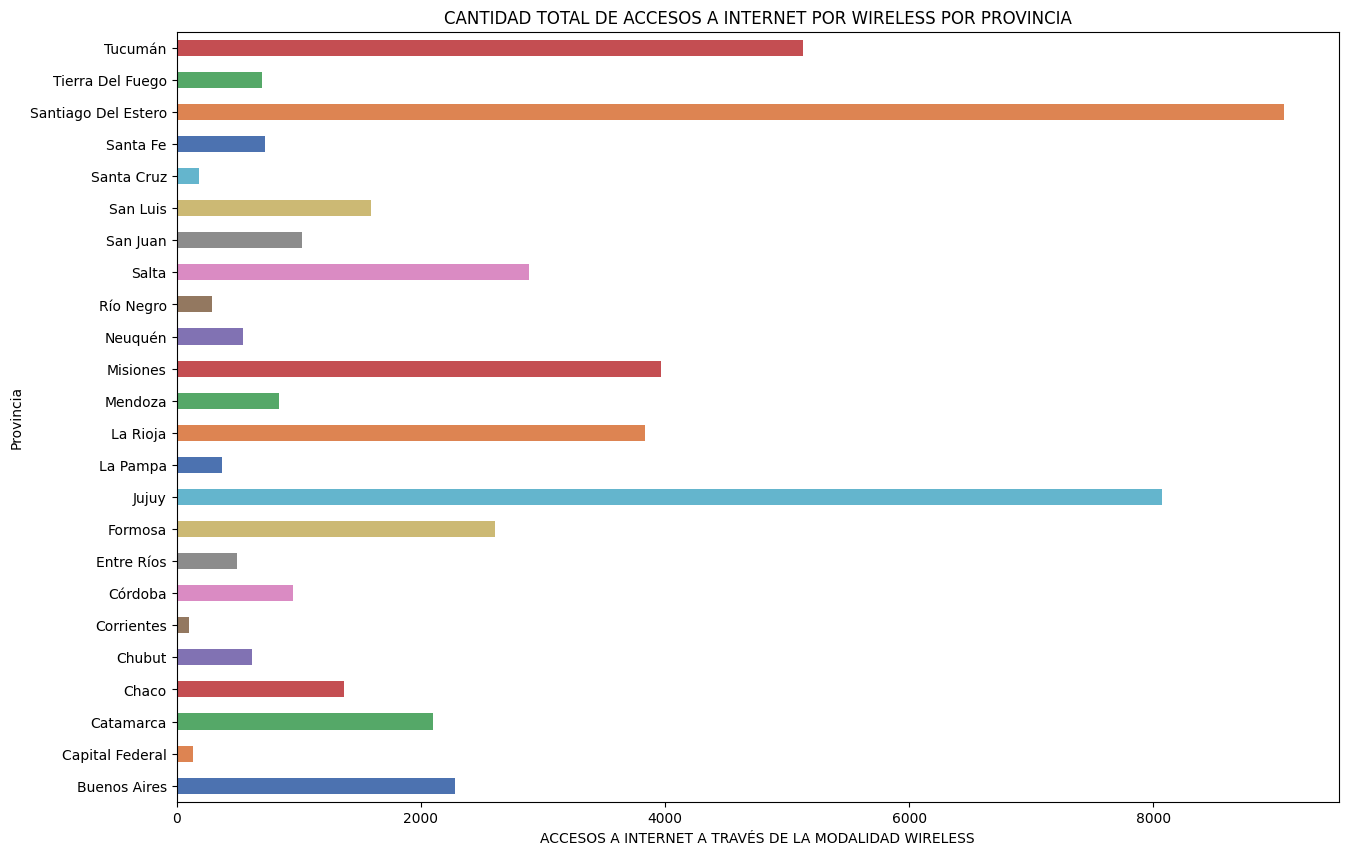

In [66]:
# Contamos el número de accesos a internet a través de Wireless por provincia
counts = df_internet_por_tecnologia.groupby('Provincia')['Wireless'].sum()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE LA MODALIDAD WIRELESS')

# Agregamos el título al gráfico
plt.title('CANTIDAD TOTAL DE ACCESOS A INTERNET POR WIRELESS POR PROVINCIA')

# Mostramos el gráfico
plt.show()

Este gráfico muestra la cantidad de accesos a internet a través de la modalidad de Wireless por provincia. En la provincia de Santiago del Estero hubo 9068 accesos a internet a través de la modalidad wireless. En la provincia de Rio Negro hubo 293 accesos a internet a traves de la modalidad wireless. En la provincia de Mendoza hubo 839 accesos a internet a través de la modalidad wireless.

ACCESO A INTERNET A TRAVÉS DE OTRAS MODALIDADES NO ESPECIFICADAS Y POR PROVINCIA

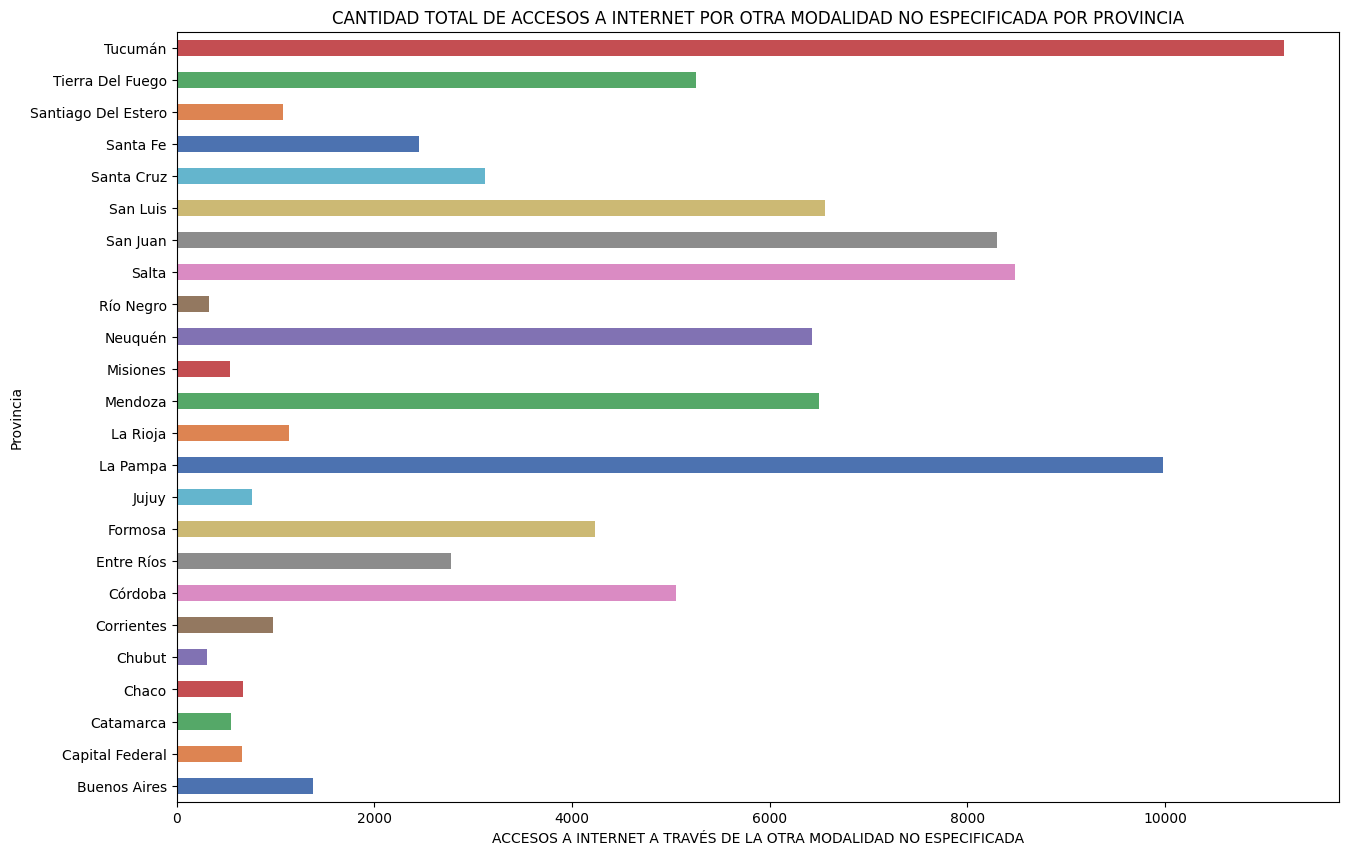

In [67]:
# Contamos el número de accesos a internet a través de Otras modalidades no especificadas por provincia
counts = df_internet_por_tecnologia.groupby('Provincia')['Otros'].sum()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('ACCESOS A INTERNET A TRAVÉS DE LA OTRA MODALIDAD NO ESPECIFICADA')

# Agregamos el título al gráfico
plt.title('CANTIDAD TOTAL DE ACCESOS A INTERNET POR OTRA MODALIDAD NO ESPECIFICADA POR PROVINCIA')

# Mostramos el gráfico
plt.show()

Este grafico muestra la cantidad de accesos a internet a través de modalidades no especificadas anteriormente y teniendo en cuenta las provincias de Argentina. En la provincia de Buenos Aires hubo 1382 accesos a internet a través de modalidades no especificadas. En la provincia de Mendoza hubo 6499 accesos a internet a través de modalidades no especificadas. En la Capital Federal hubo 661 accesos a internet a través de modalidades no especificadas. 

TOTAL DE ACCESO A INTERNET A TRAVÉS DE TODAS LAS MODALIDADES Y  POR PROVINCIA

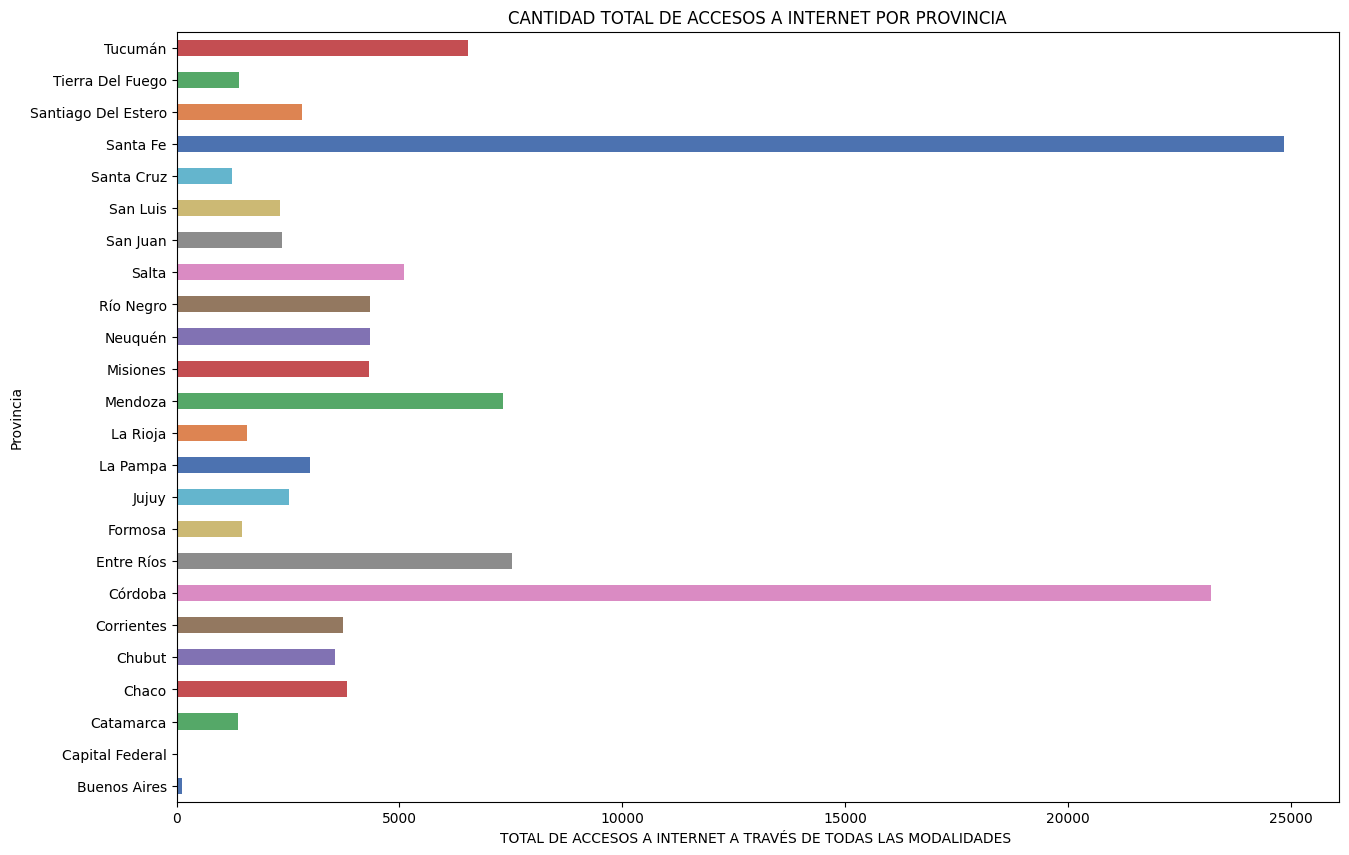

In [70]:
# Contamos el número de accesos a internet a través de todas las modalidades y por provincia
counts = df_internet_por_tecnologia.groupby('Provincia')['Total'].sum()

# Creamos una paleta de colores con tonos más fuertes
colores = sns.color_palette("deep", n_colors=len(counts))

# Graficamos los datos con los colores correspondientes
counts.plot(kind='barh', color=colores)

# Agregamos el título al eje x
plt.xlabel('TOTAL DE ACCESOS A INTERNET A TRAVÉS DE TODAS LAS MODALIDADES ')

# Agregamos el título al gráfico
plt.title('CANTIDAD TOTAL DE ACCESOS A INTERNET POR PROVINCIA')

# Mostramos el gráfico
plt.show()

Este gráfico muestra la cantidad total de accesos a internet a través de todas las modalidades y por provincia. En la provincia de La Pampa hubo en total 2989 acceso a internet. En la provincia de Jujuy hubo en total 2525 accesos a internet. Y en la provincia de Santa Fe hubo en total 24842 accesos a internet.

Voy a proceder a crear un dataframe a partir de un csv AccesosaInternetfijoportecnologiaylocalidad_2791751699327160311.csv

In [23]:
df_acceso_por_tec_y_localidad = pd.read_csv('../ETL/acceso_tec_localidad.csv')

Voy a ver que contiene el dataframe

In [24]:
df_acceso_por_tec_y_localidad

Provincia      Partido                           Localidad  \
0     BUENOS AIRES   25 de Mayo                          25 de Mayo   
1     BUENOS AIRES   25 de Mayo                           Del Valle   
2     BUENOS AIRES   25 de Mayo                   Gobernador Ugarte   
3     BUENOS AIRES   25 de Mayo              Norberto de la Riestra   
4     BUENOS AIRES   25 de Mayo                    Lucas Monteverde   
...            ...          ...                                 ...   
3132       TUCUMAN   Tafí Viejo  Villa Mariano Moreno - El Colmenar   
3133       TUCUMAN      Trancas                San Pedro de Colalao   
3134       TUCUMAN      Trancas                   Villa  de Trancas   
3135       TUCUMAN  Yerba Buena                       Villa Carmela   
3136       TUCUMAN  Yerba Buena            Yerba Buena - Marcos Paz   

     Link Indec         ADSL  CABLEMODEM  DIAL UP  FIBRA OPTICA     OTROS  \
0       6854100  874000000.0   4540000.0      0.0       30000.0       0.0   
1       6854020  181000000.0         0.0      0.0           0.0   10000.0   
2       6854040          0.0         0.0      0.0           0.0       0.0   
3       6854060          0.0  78200000.0      0.0       60000.0  167000.0   
4       6854050          0.0         0.0      0.0           0.0       0.0   
...         ...          ...         ...      ...           ...       ...   
3132   90105100          0.0   3100000.0      0.0      373000.0       0.0   
3133   90112020          0.0         0.0      0.0           0.0       0.0   
3134   90112030  126000000.0         0.0      0.0           0.0   33000.0   
3135   90119020    1500000.0         0.0      0.0           0.0    1000.0   
3136   90119030  129000000.0  20900000.0      0.0      154000.0   33000.0   

      SATELITAL  WIMAX  WIRELESS  Total general  
0      852000.0    0.0    7060.0           6.98  
1        1000.0    0.0       0.0         192.00  
2           0.0    0.0    1810.0         181.00  
3           0.0    0.0    3270.0           1.28  
4           0.0    0.0      60.0           6.00  
...         ...    ...       ...            ...  
3132        0.0    0.0       0.0           3.76  
3133        0.0    0.0    3130.0         313.00  
3134        0.0    0.0    1010.0         260.00  
3135        0.0    0.0     970.0           1.60  
3136        0.0    0.0       0.0          15.78  

[3137 rows x 13 columns]

Voy a ver si el dataframe posee nulos o no

In [25]:
df_acceso_por_tec_y_localidad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3137 non-null   object 
 1   Partido        3137 non-null   object 
 2   Localidad      3137 non-null   object 
 3   Link Indec     3137 non-null   object 
 4   ADSL           3137 non-null   float64
 5   CABLEMODEM     3137 non-null   float64
 6   DIAL UP        3137 non-null   float64
 7   FIBRA OPTICA   3137 non-null   float64
 8   OTROS          3137 non-null   float64
 9   SATELITAL      3137 non-null   float64
 10  WIMAX          3137 non-null   float64
 11  WIRELESS       3137 non-null   float64
 12  Total general  3137 non-null   float64
dtypes: float64(9), object(4)
memory usage: 318.7+ KB


Voy a ver si tiene datos duplicados

In [26]:
duplicates = df_acceso_por_tec_y_localidad.duplicated()
if duplicates.any():
    print("Hay filas duplicadas en el conjunto de datos:")
    print(df_acceso_por_tec_y_localidad[duplicates])
else:
    print("No hay filas duplicadas en el conjunto de datos.")

No hay filas duplicadas en el conjunto de datos.


 El dataframe df_acceso_por_tec_y_localidad contiene información sobre el acceso a Internet fijo por tecnología y localidad en Argentina. No posee nulos ni duplicados. Tiene 3137 filas y 13 columnas. La columna “Link Indec” se refiere a la fuente de los datos, que es el Instituto Nacional de Estadística y Censos (INDEC). La columna “Provincia” indica la provincia a la que pertenece la localidad, mientras que la columna “Partido” y “Localidad” indican el partido y la localidad, respectivamente. Las columnas “ADSL”, “CABLEMODEM”, “DIAL UP”, “FIBRA OPTICA”, “OTROS”, “SATELITAL”, “WIMAX”, “WIRELESS” muestran el número de accesos a Internet fijo por tecnología en cada localidad. La columna “Total general” muestra el número total de accesos a Internet fijo en cada localidad. 

Voy a empezar a realizar el analisis de las variables categoricas

BUENOS AIRES

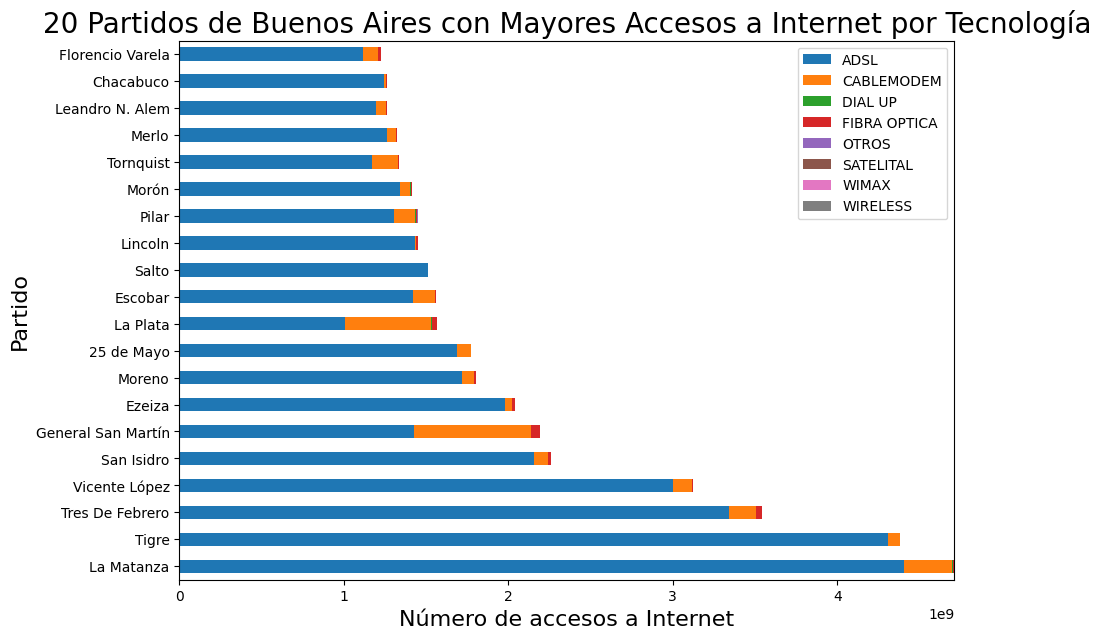

In [38]:
# Filtra los datos por la provincia de Buenos Aires
df_buenos_aires = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'BUENOS AIRES']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_buenos_aires.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Selecciona los 20 partidos con mayores accesos a Internet
df_top_20 = df_grouped.loc[df_sorted.head(20).index]

# Crea un gráfico de barras con los 15 partidos con mayores accesos a Internet
ax = df_top_20.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('20 Partidos de Buenos Aires con Mayores Accesos a Internet por Tecnología', fontsize=20)
ax.set_ylabel('PartidoS', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)

plt.show()

Este grafico muestra los 20 Partidos de Buenos Aires con mayores accesos a internet por tecnologia. El partido de San Isidro tuvo 2154700000 accesos a internet por ADSL, 87010000 accesos a internet a través de CABLEMODEM, 600000 accesos a internet a través de DIAL UP, 16777000 accesos a internet a traves de FIBRA OPTICA, 101000 accesos a internet a través de otras tecnologias no especificadas, 6000 accesos a internet a traves de la tecnologia SATELITAL, 860 accesos a internet a través de WIRELESS y no tuvo accesos a internet a traves de la tecnologia WIMAX.

CABA

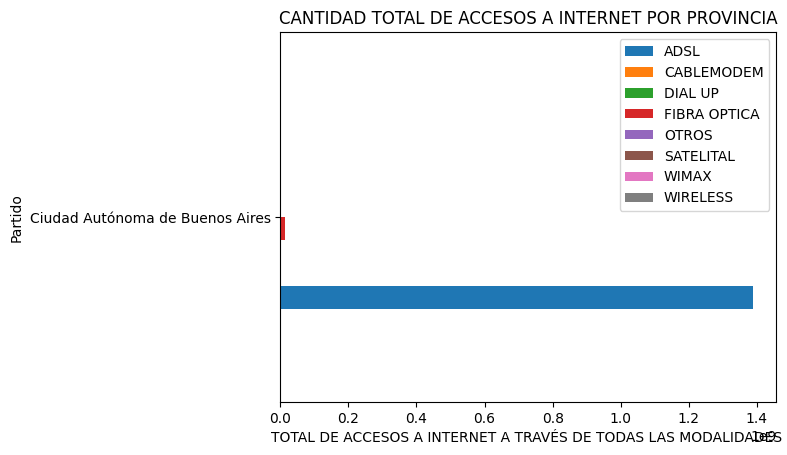

In [42]:
# Filtra los datos por Capital Federal
df_capital_federal = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'CABA']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_capital_federal.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()


# Graficamos los datos con los colores correspondientes
df_grouped.plot(kind='barh')

# Agregamos el título al eje x
plt.xlabel('TOTAL DE ACCESOS A INTERNET A TRAVÉS DE TODAS LAS MODALIDADES DE CABA')

# Agregamos el título al gráfico
plt.title('CANTIDAD TOTAL DE ACCESOS A INTERNET CABA')

# Mostramos el gráfico
plt.show()

Este grafico muesta los accesos a internet por tecnologia de CABA. En la Ciudad Autonoma de Buenos Aires hubo 1387500000 accesos a internet por ADSL y 13855000 accesos a internet a través de fibra óptica.

CATAMARCA

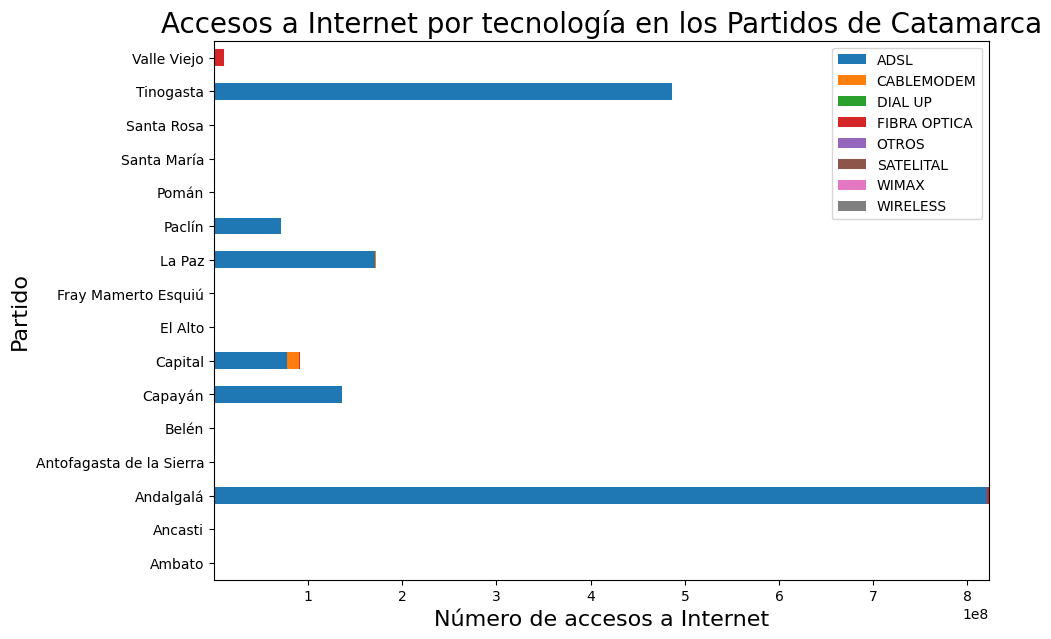

In [46]:
# Filtra los datos por la provincia de Catamarca
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'CATAMARCA']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Catamarca', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia en los partidos de Catamarca. El partido de Andalgalá tuvo 821000000 acceso a internet a travé de ADSL, 1780000 accesos a internet a través de fibra optica. El partido Tinogasta tuvo 486000000 accesos a internet a traves de ADSL. El partido de Valle Viejo tuvo 11037000 accesos a internet a traves de fibra optica. 

CHACO

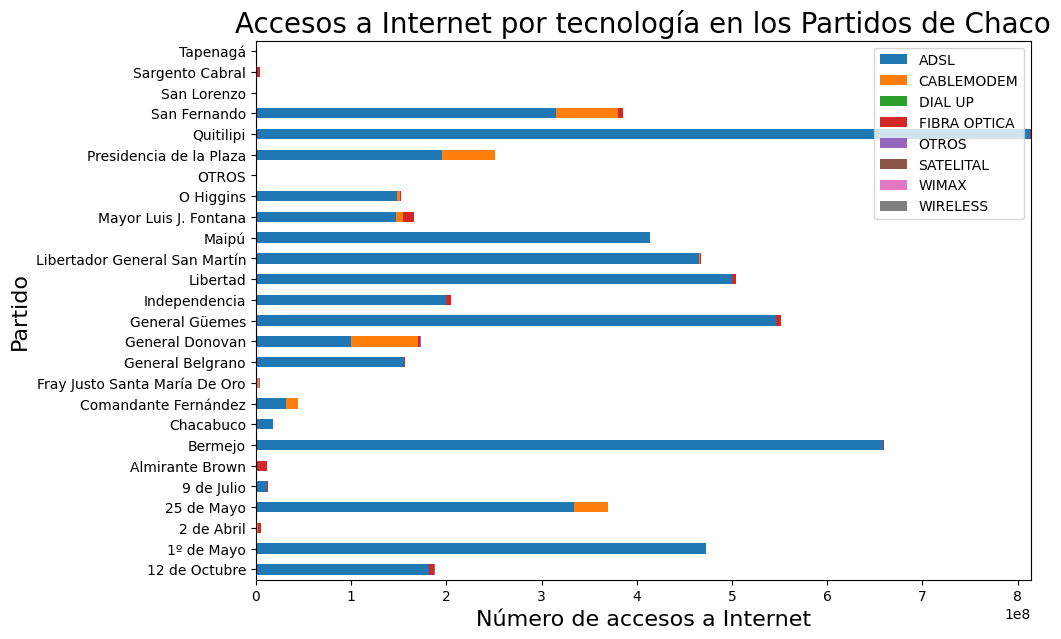

In [48]:
# Filtra los datos por la provincia de Chaco
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'CHACO']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Chaco', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos del Chaco. El Partido Quitilipi tuvo 813000000 accesos a internet a traves de ADSL, 690000 accesos a internet a traves de fibra óptica y 1660 accesos a internet a través de wireless. El partido Bermejo tuvo 659000000 acceso a internet a traves de ADSL, 1050000 accesos a internet a través de fibra óptica.

CHUBUT

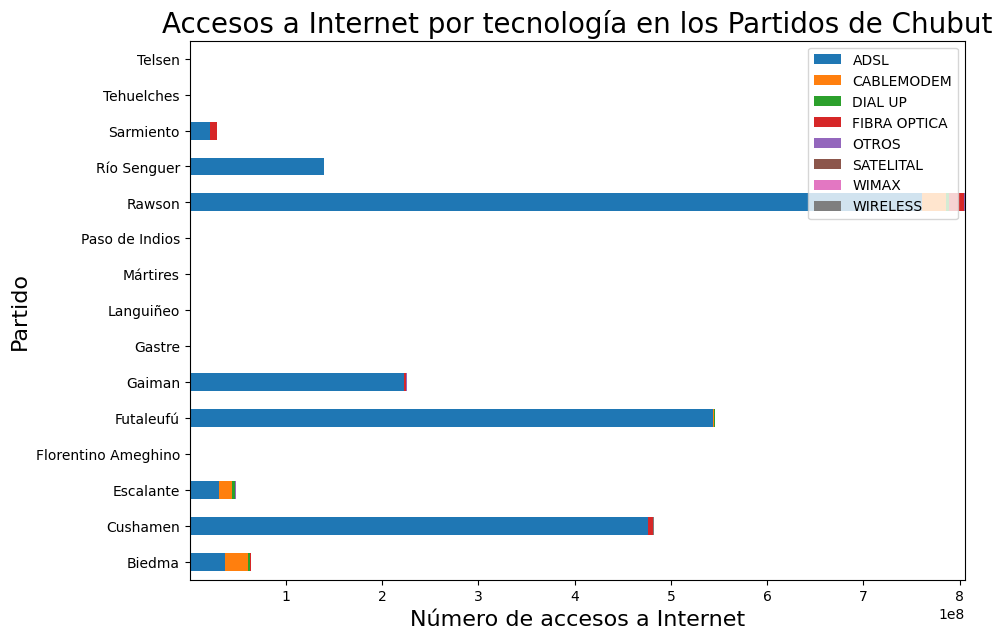

In [50]:
# Filtra los datos por la provincia de Chubut
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'CHUBUT']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Chubut', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos del Chubut. El partido de Rawson tuvo 761300000 acceso a internet a través de ADSL, 24350000 accesos a través de Cablemodem, 15970000 accesos a través de fibra óptica. El partido de Futaleufú tuvo 543400000 acceso a internet a traves de ADSL. El partido de Sarmiento tuvo 21300000 accesos a internet a través de ADSL, 7120000 accesos a internet a través de fibra óptica.

CORDOBA

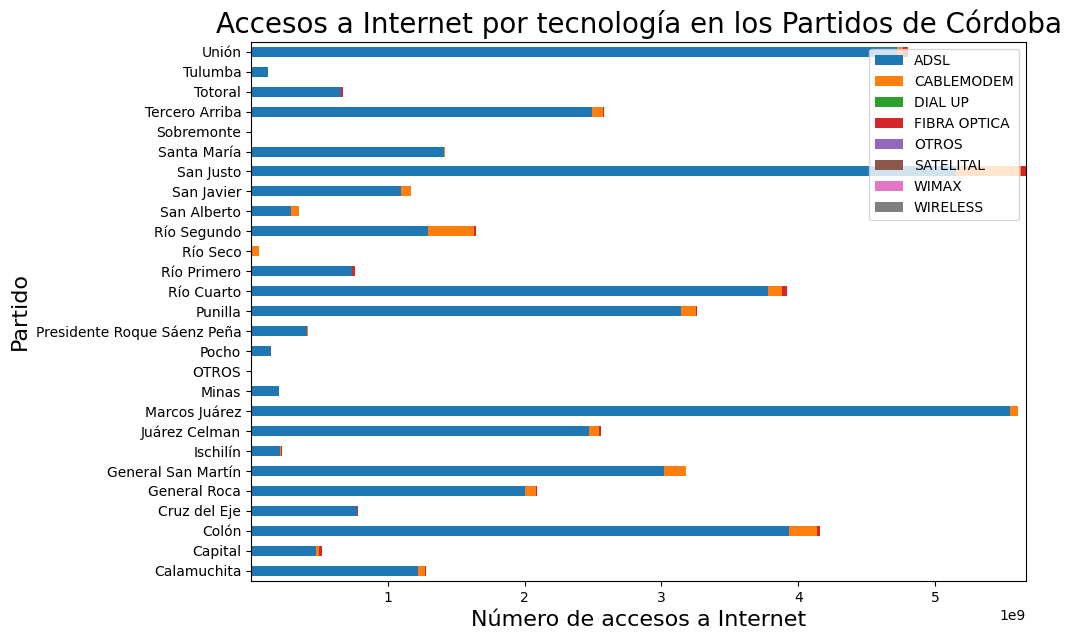

In [52]:
# Filtra los datos por la provincia de Córdoba
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'CORDOBA']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Córdoba', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos del Córdoba. El partido de San Justo tuvo 5154500000 accesos a internet a través de ADSL, 475320000 accesos a internet a través de cablemodem, 35390000 accesos a internet a traves de fibra óptica. El partido de Marcos Juarez tuvo 5545200000 accesos a internet a través de ADSL, 59360000 accesos a internet a través de cablemodem.

CORRIENTES

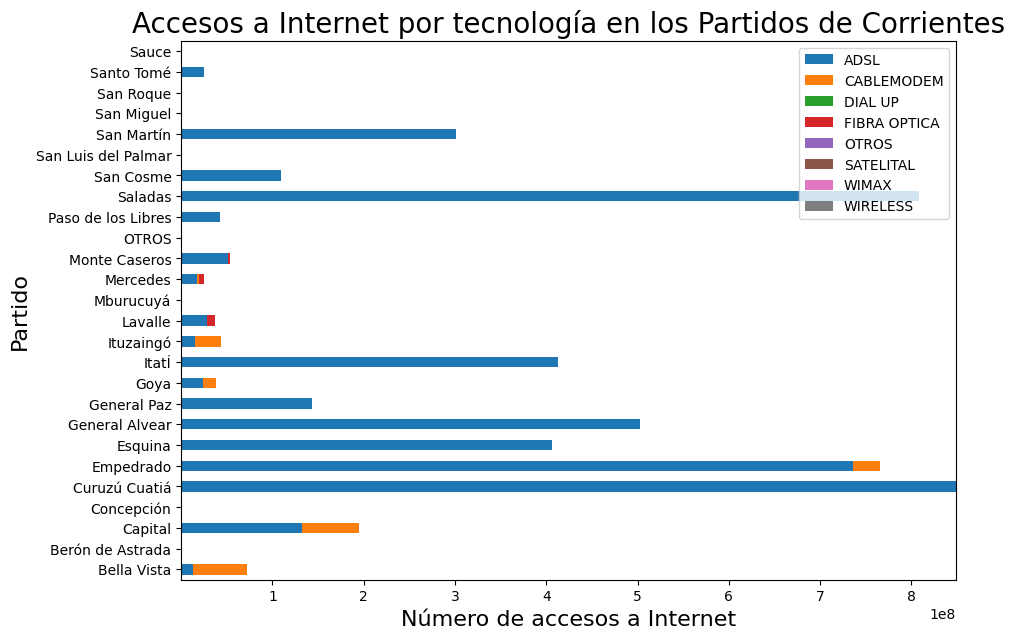

In [54]:
# Filtra los datos por la provincia de Corrientes
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'CORRIENTES']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Corrientes', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos del Corrientes. El partido de Curuzú Cuatián tuvo 849000000 accesos a internet a través de ADSL. El partidod de Empedrado tuvo 736000000 accesos a internet a través de ADSL y 30000000 accesos a internet a traves de cablemodem. 	

ENTRE RIOS

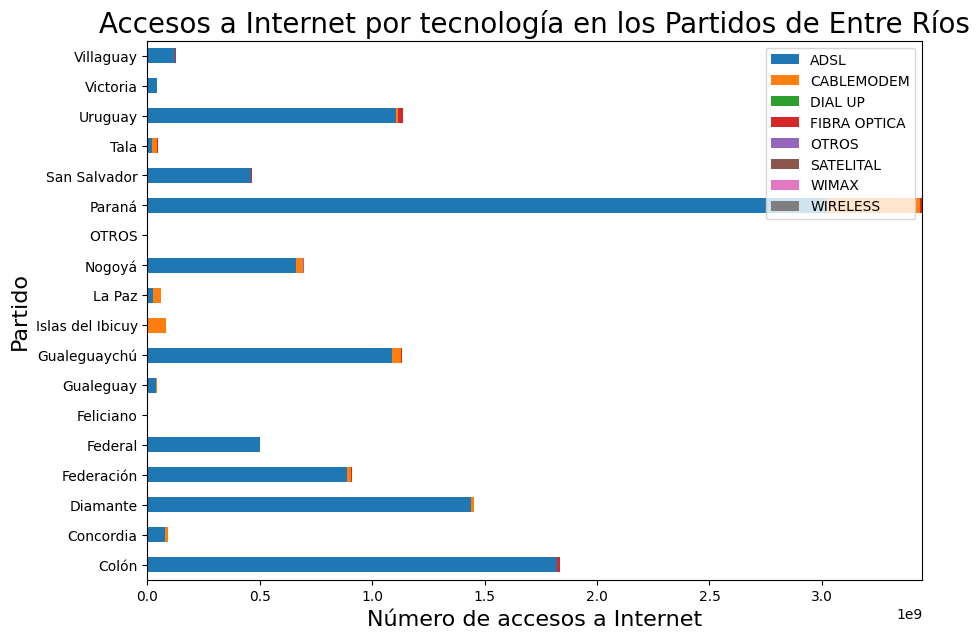

In [57]:
# Filtra los datos por la provincia de Entre Rios
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'ENTRE RIOS']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Entre Ríos', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos del Entre Ríos. El partido de Paraná tuvo 3023800000 acceso a internet a través de ADSL, 413320000 accesos a internet a través de cablemodem y 9701000 accesos a internet a través de fibra óptica. El partido de Colón tuvo 1820000 accesos a internet a través de ADSL y 10742000 accesos a internet a través de fibra óptica

FORMOSA

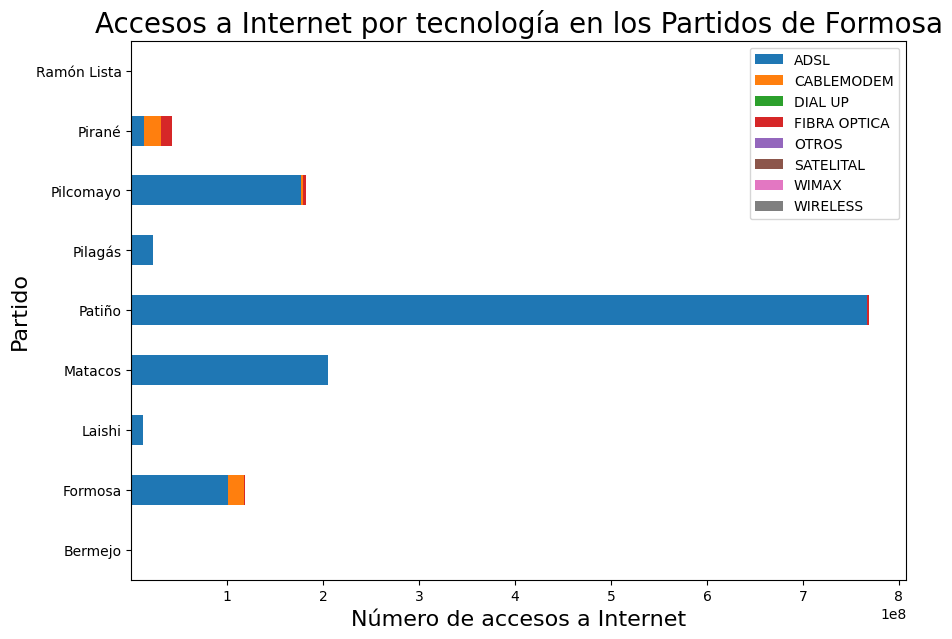

In [59]:
# Filtra los datos por la provincia de Formosa
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'FORMOSA']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Formosa', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos del Formosa. El partido de Patiño tuvo 767000000 acceso a internet a través de ADSL, 2193000 accesos a internet a través de fibra óptica. El partido Pirané tuvo 13400000 acceso a internet a través de ADSL, 17300000 accesos a internet a través de fibra óptica y 17300000 acceso a traves de cablemodem.

JUJUY

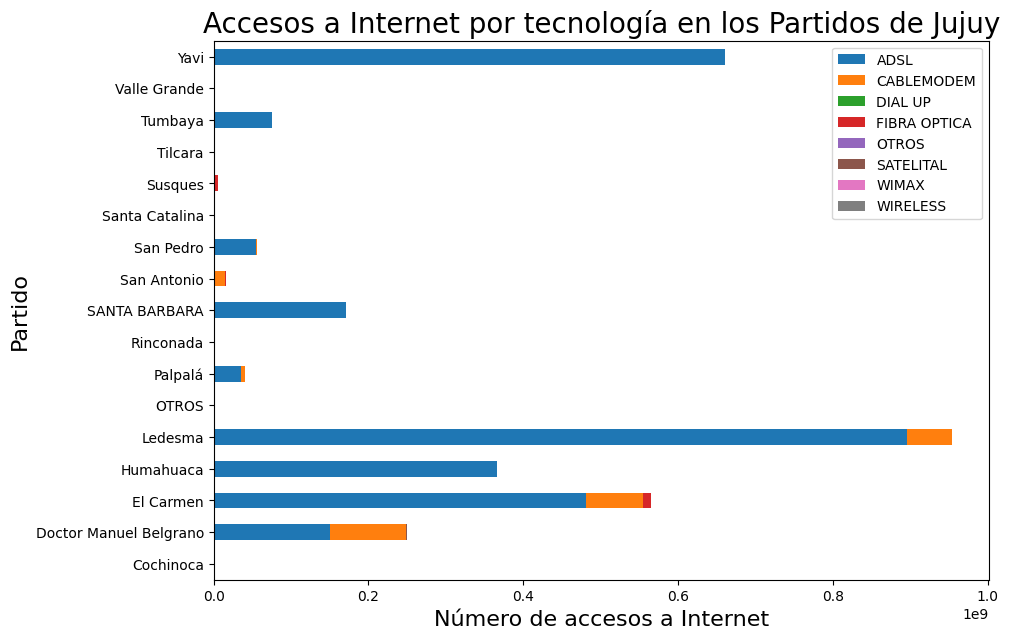

In [61]:
# Filtra los datos por la provincia de Jujuy
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'JUJUY']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Jujuy', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos del Jujuy. El partido de Ledesma tuvo 895000000 accesos a internet a través de ADSL, 58370000 accesos a internet a través de cablemodem. El partido de Yavi tuvo 660000000 acceso a internet a través de ADSL.

LA PAMPA

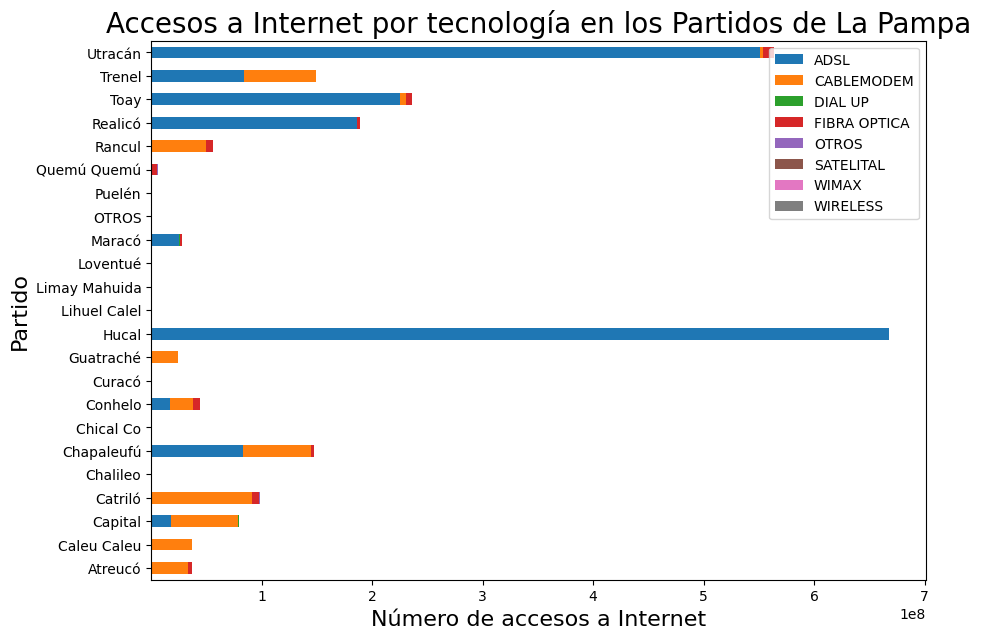

In [63]:
# Filtra los datos por la provincia de La Pampa
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'LA PAMPA']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de La Pampa', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de La Pampa. El partido de Hucal tuvo 668000000 accesos a internet a través de ADSL, el partido de Utracán tuvo 551000000 accesos a internet a través de ADSL, 2920000 accesos a internet a través de cablemodem, 9750000 accesos a internet a través de fibra óptica.

LA RIOJA

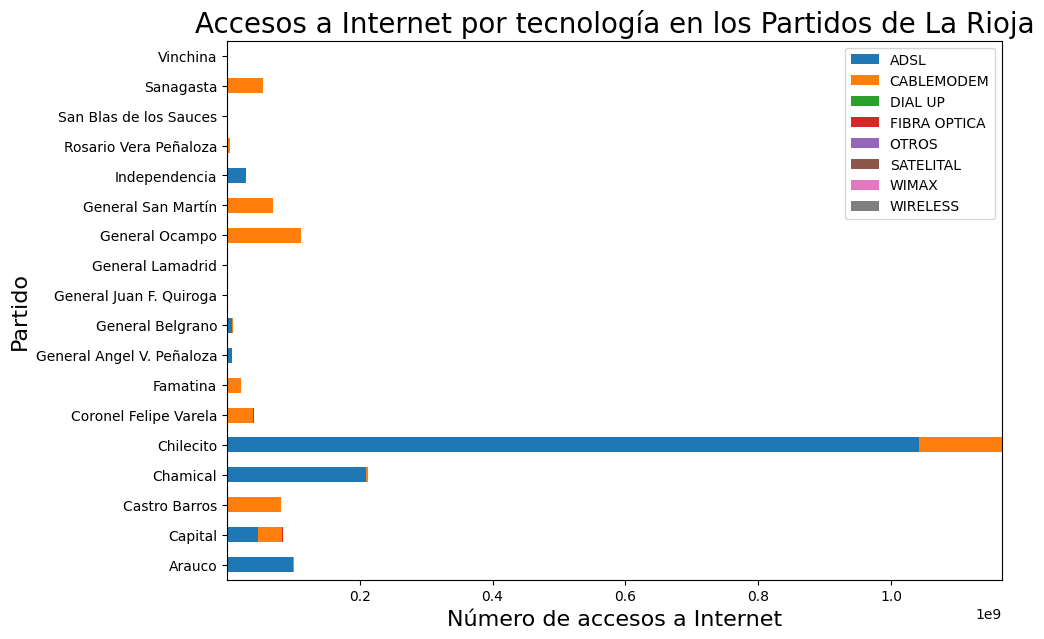

In [66]:
# Filtra los datos por la provincia de La Rioja
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'LA RIOJA']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de La Rioja', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de La Rioja. El partido de Chilecito tuvo 1042000000 accesos a internet a traves de ADSL, 124710000 accesos a internet a través de cablemodem. El partido de Sanagasta tuvo 54300000 acceso a internet a traves de cablemodem.

MENDOZA

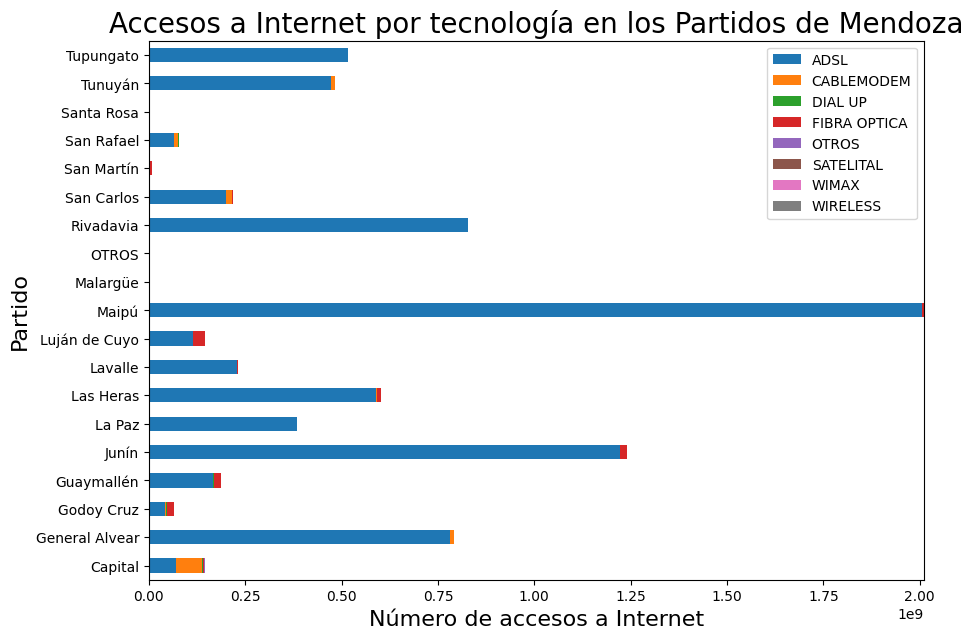

In [68]:
# Filtra los datos por la provincia de Mendoza
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'MENDOZA']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Mendoza', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de Mendoza. El partido de Maipú tuvo 2004800000 acceso a internet a través de ADSL, 5246000 accesos a internet a través de fibra óptica. El partido de Junín tuvo 1222800000 accesos a internet a través de ADSL Y 17860000 accesos a internet a través de fibra óptica.

MISIONES

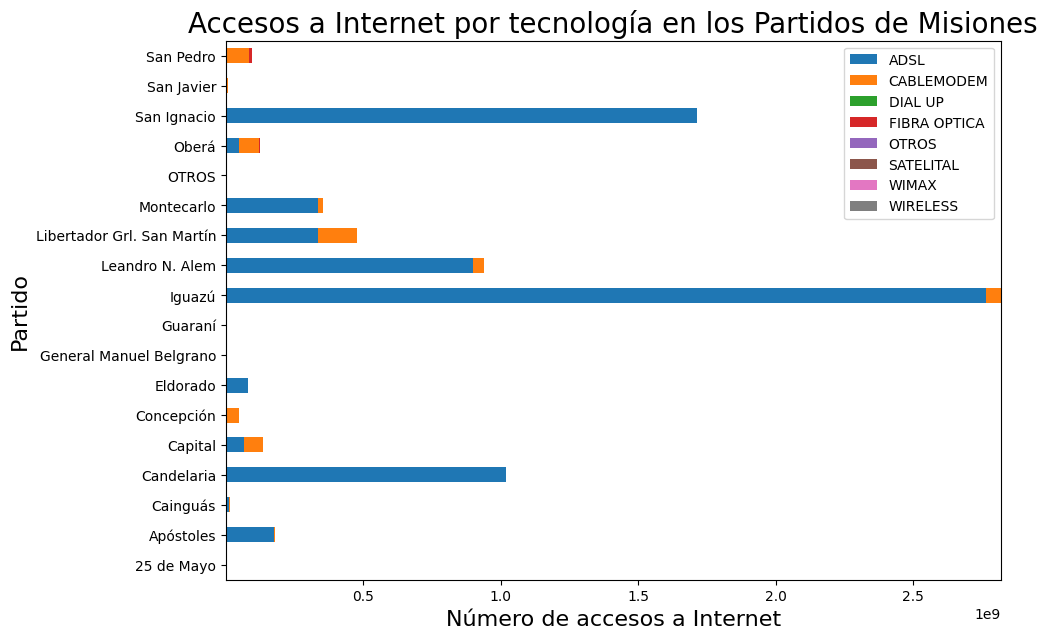

In [70]:
# Filtra los datos por la provincia de Misiones
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'MISIONES']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Misiones', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de Misiones. El partido de Iguazú tuvo 2766000000 accesos a internet a través de ADSL, 52800000 accesos a internet a través de cablemodem.

NEUQUEN

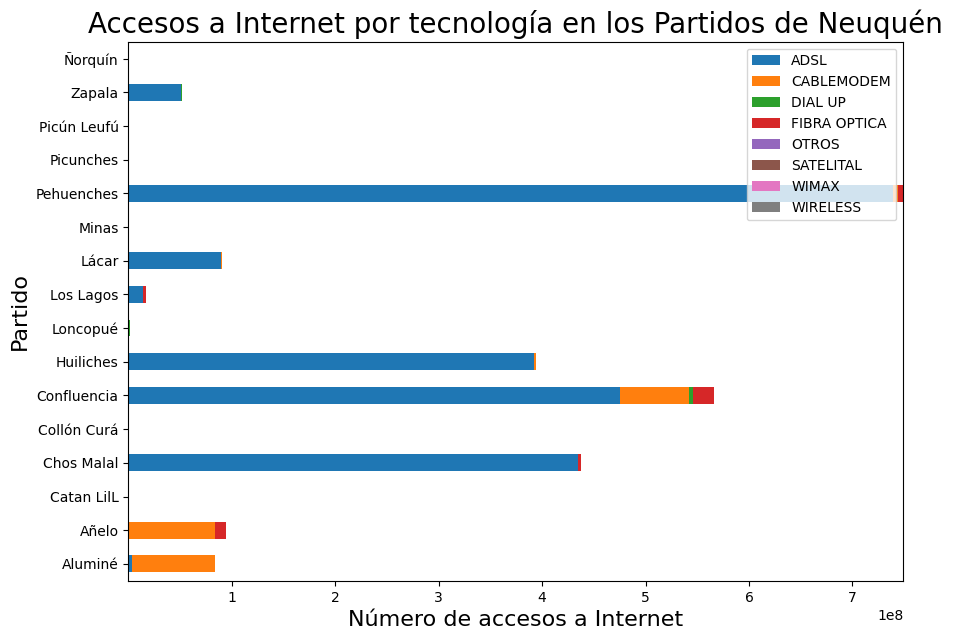

In [72]:
# Filtra los datos por la provincia de Neuquén
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'NEUQUEN']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Neuquén', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de Neuquén. El partido de Pehuenches tuvo 739000000 accesos a internet a travé de ADSL, tuvo	4600000 accesos a internet a través de cablemodem y tuvo 5580000 accesos a internet a través de fibra óptica. El partido de Añelo tuvo 83700000 accesos a internet a través de cablemodem y 10310000 accesos a internet a través de fibra óptica

RIO NEGRO

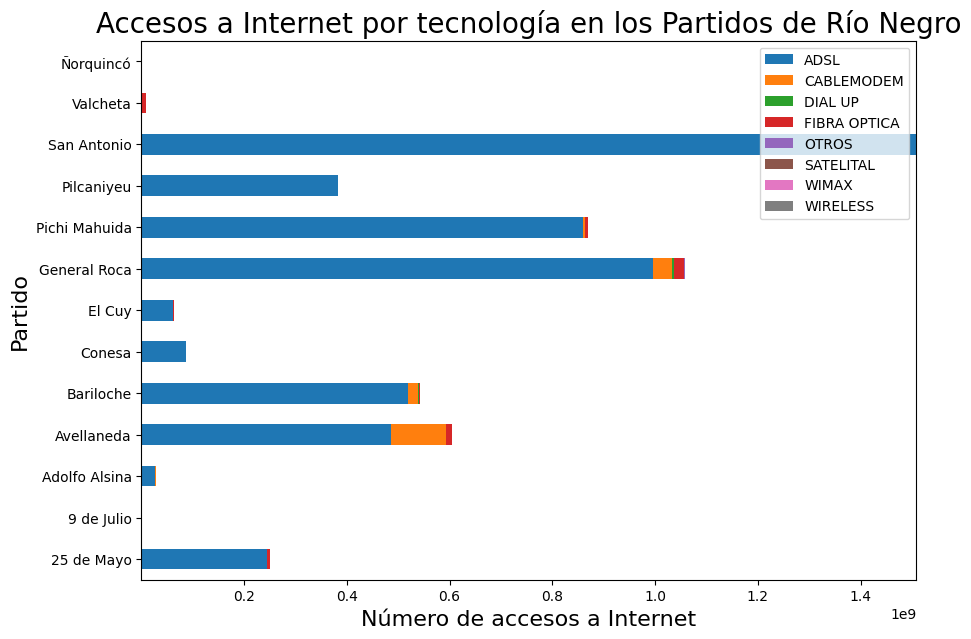

In [74]:
# Filtra los datos por la provincia de Río Negro
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'RIO NEGRO']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Río Negro', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de Río Negro. El partido de San Antonio tuvo 1508000000 accesos a internet a través de ADSL. El partido de General Roca tuvo 996000000 accesos a internet a través de ADSL, 37770000 accesos a internet a través de cablemodem,2170000 accesos a internet a través de dial up y 21197000 accesos a internet a través de fibra óptica.

SALTA 

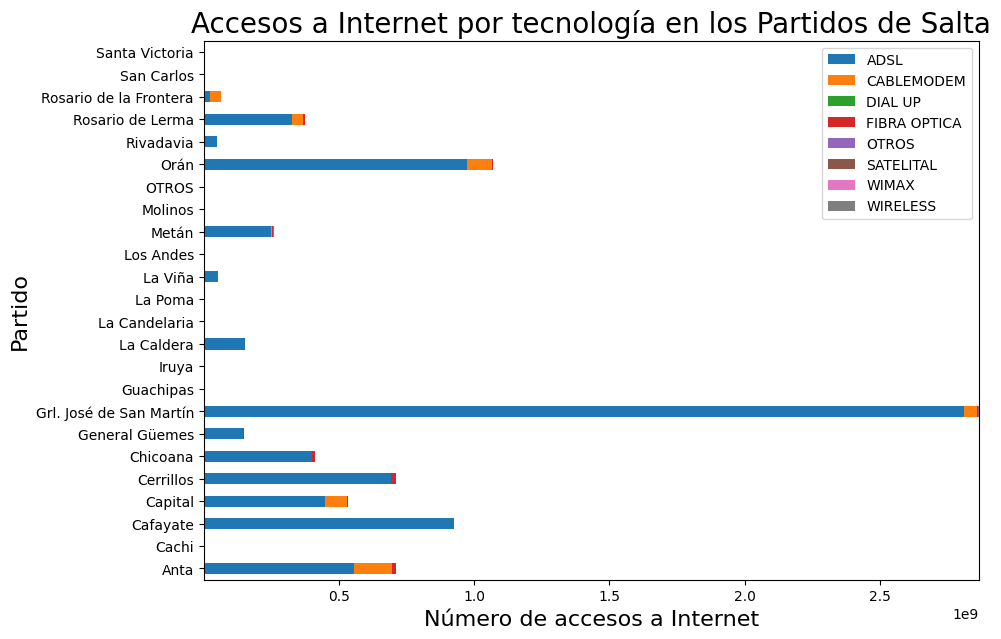

In [76]:
# Filtra los datos por la provincia de SALTA
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'SALTA']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Salta', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de Salta. El partido de Grl. José de San Martín tuvo	2811200000 accesos a internet a través de ADSL, 47970000 accesos a internet a traves de cablemodem y 4664000 accesos a internet a través de fibra óptica.

SAN JUAN

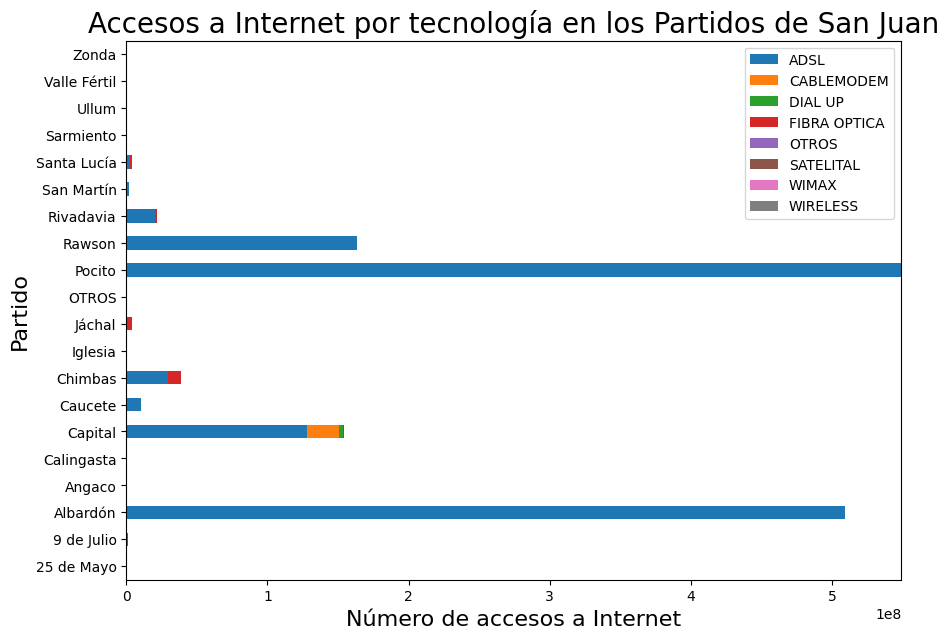

In [78]:
# Filtra los datos por la provincia de SAN JUAN
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'SAN JUAN']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de San Juan', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de San Juan. El partido de Pocito tuvo 549000000 accesos a internet a través de ADSL, el partido de Albardón	tuvo 509000000 accesos a través de ADSL, el partido de Chimbas tuvo 29400000 accesos a traves de ADSL y 9420000 accesos a internet a través de fibra óptica.

SAN LUIS

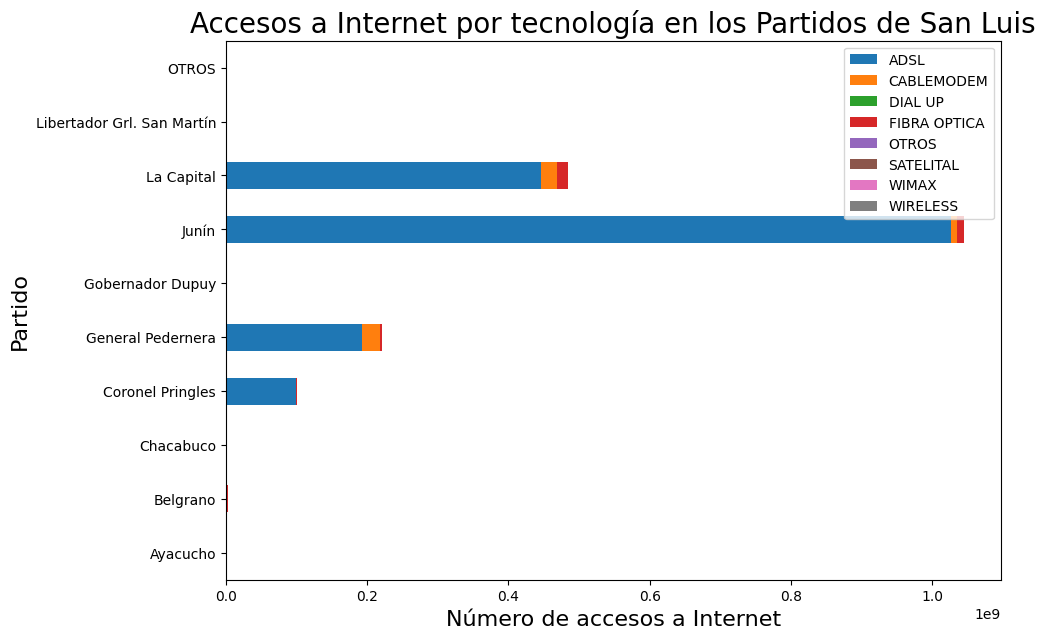

In [80]:
# Filtra los datos por la provincia de SAN LUIS
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'SAN LUIS']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de San Luis', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de San Luis. El partido de Junin tuvo 1026000000 accesos a internet a través de ADSL, 8600000 accesos a internet a través de cablemodem y 10000000 a través de fibra óptica. General Pedernera tuvo 192900000 accesos a internet a través de ADSL, 24730000 accesos a internet a través de cablemodem y 2760000 accesos a internet a través de fibra óptica.


SANTA CRUZ

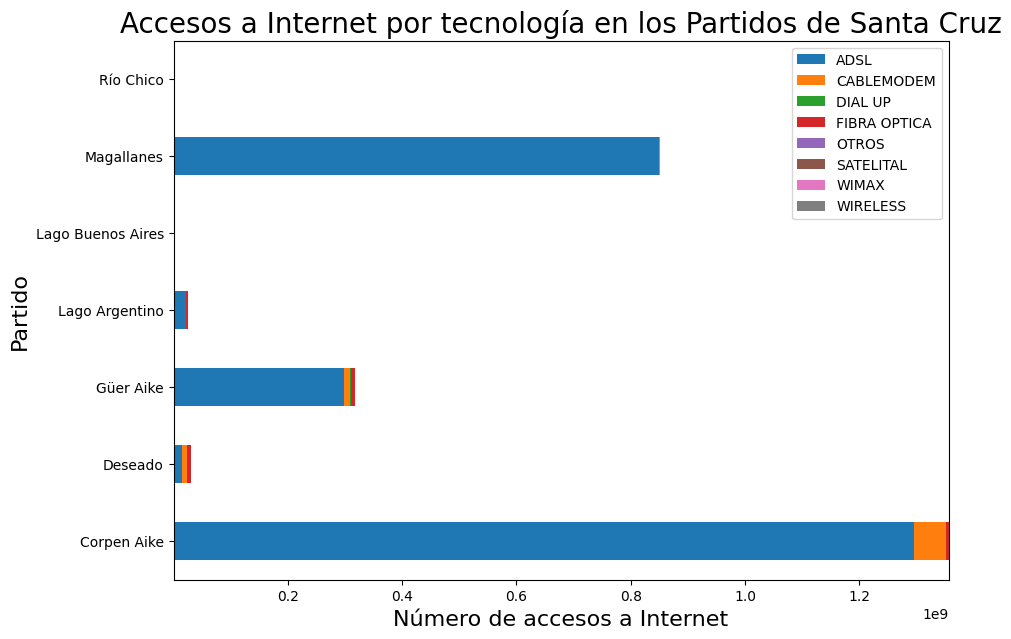

In [82]:
# Filtra los datos por la provincia de SANTA CRUZ
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'SANTA CRUZ']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Santa Cruz', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de Santa Cruz. El partido de Corpen Aike tuvo 1295000000 accesos a internet a través de ADSL, 56000000 accesos a internet a través de cablemodem y 5100000 accesos a internet a través de fibra óptica. El partido de Lago Argentino tuvo 21300000 accesos a internet a través de ADSL y 4779000 accesos a internet a través de fibra óptica.

SANTA FE

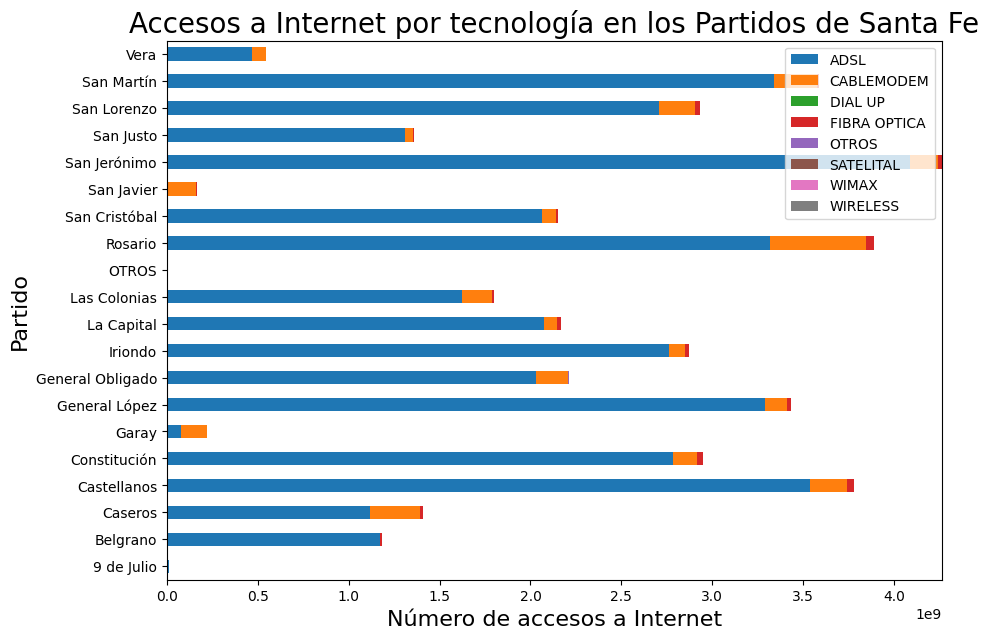

In [84]:
# Filtra los datos por la provincia de SANTA FE
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'SANTA FE']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Santa Fe', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de Santa Fe. El partido de San Jerónimo tuvo 4089100000 accesos a internet a través de ADSL, 153700000 accesos a internet a través de cablemodem y 17955000 accesos a internet a través de fibra óptica. El partido de Garay tuvo 77000000 accesos a internet a través de ADSL, 144800000 accesos a internet a través de cablemodem.

SANTIAGO DEL ESTERO

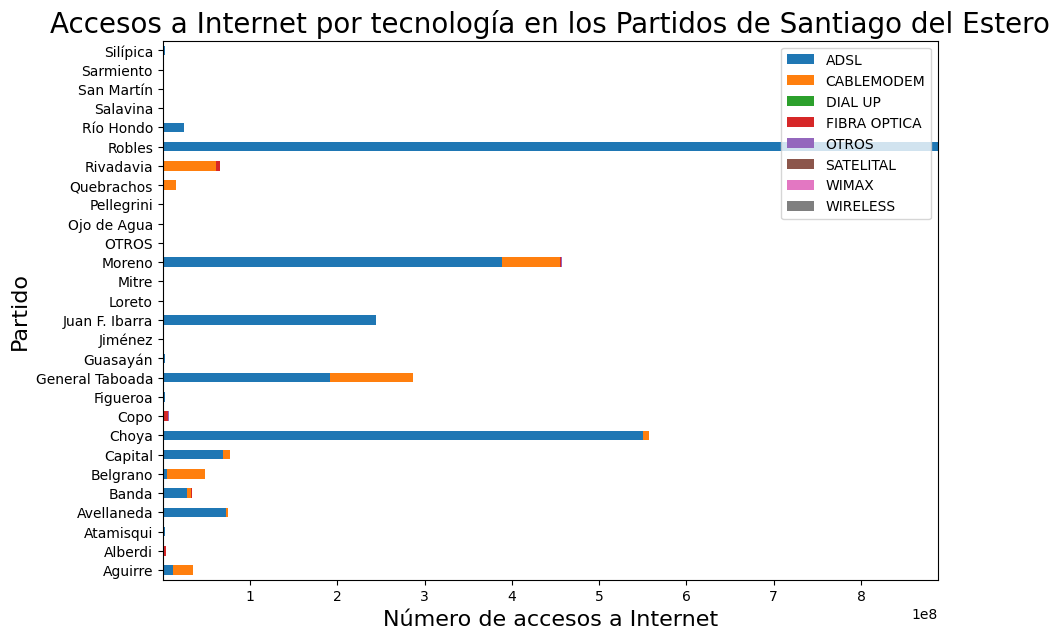

In [86]:
# Filtra los datos por la provincia de SANTIAGO DEL ESTERO 
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'SANTIAGO DEL ESTERO']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Santiago del Estero', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de Satiago del Estero. El partido de Robles tuvo 888000000 accesos a internet a través de ADSL, el partido de Choya tuvo 550800000 accesos a internet a través de ADSL y 5800000 accesos a internet a través de cablemodem.

TIERRA DEL FUEGO

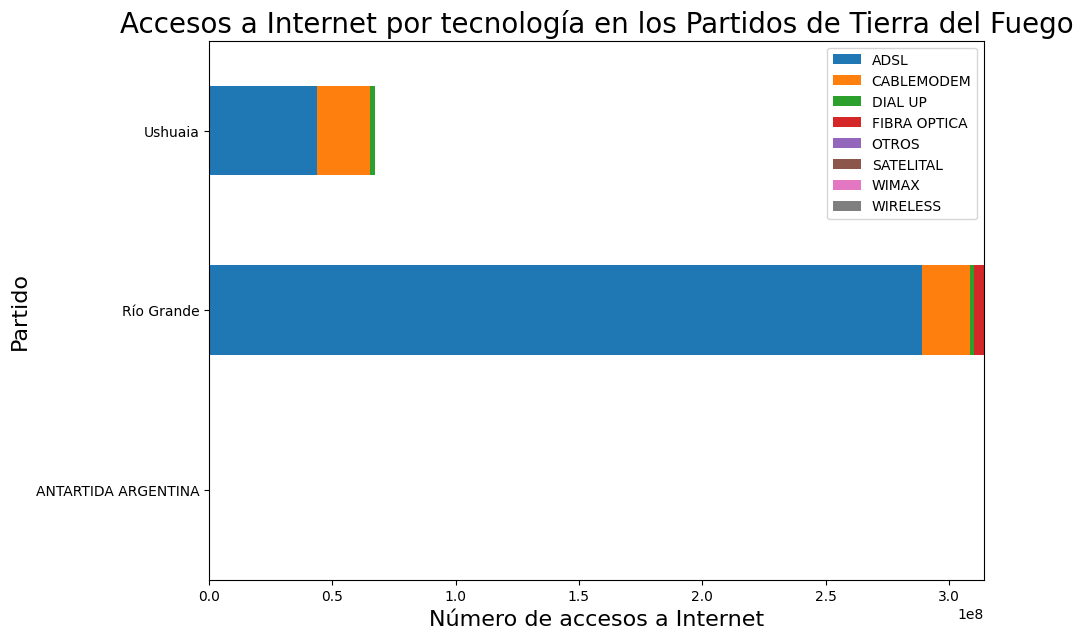

In [88]:
# Filtra los datos por la provincia de TIERRA DEL FUEGO
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'TIERRA DEL FUEGO']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Tierra del Fuego', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de Tierra del Fuego. El partido de Río Grande tuvo 289100000 accesos a internet a través de ADSL, 19560000 accesos a internet a través de cablemodem, 1370000 a través de dial up y 3990000 a través de fibra óptica. El partido de Ushuaia tuvo 43700000 acceso a internet a través de ADSL, 21730000  a través de cablemodem y 1750000 a través de dial up.

TUCUMÁN

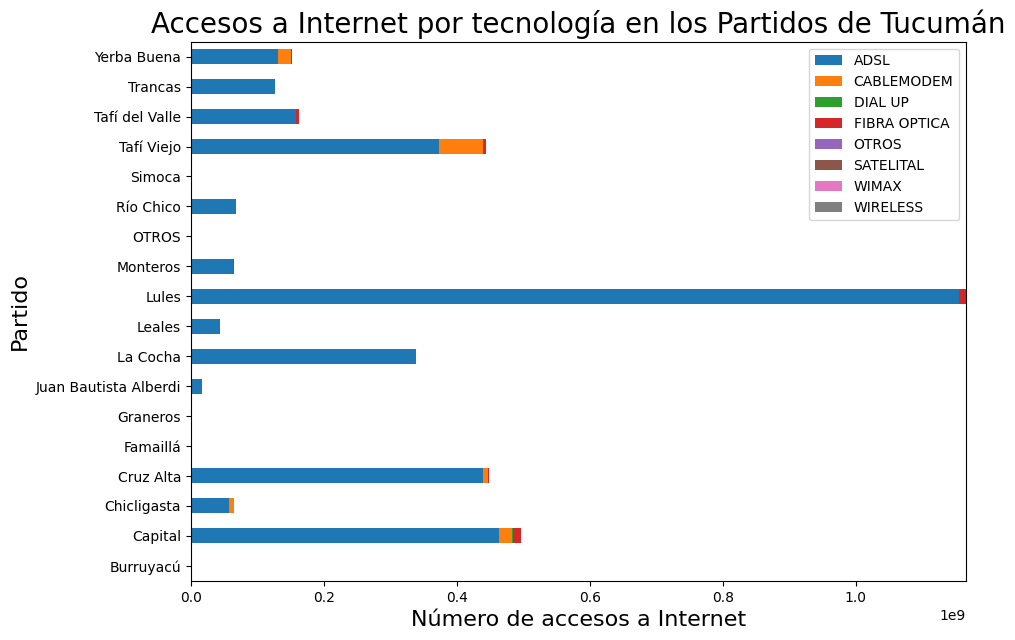

In [90]:
# Filtra los datos por la provincia de TUCUMAN
df_provincia = df_acceso_por_tec_y_localidad[df_acceso_por_tec_y_localidad['Provincia'] == 'TUCUMAN']

# Agrupa los datos por partido y tecnología y cuenta el número de accesos a Internet
df_grouped = df_provincia.groupby(['Partido'])[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA','OTROS','SATELITAL','WIMAX','WIRELESS']].sum()

# Ordena los partidos por número de accesos a Internet
df_sorted = df_grouped.sum(axis=1).sort_values(ascending=False)

# Crea un gráfico de barras con los partidos con mayores accesos a Internet
ax = df_grouped.plot(kind='barh', stacked=True, figsize=(10, 7))
ax.set_title('Accesos a Internet por tecnología en los Partidos de Tucumán', fontsize=20)
ax.set_ylabel('Partidos', fontsize=16)
ax.set_xlabel('Número de accesos a Internet', fontsize=16)
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

Este grafico muestra los accesos a internet por tecnologia de por Partidos de Tucumán. El partido de Lules tiene 1155300000 accesos a internet a través de ADSL y 9443000 accesos a internet a través de fibra óptica. El partido Capital tuvo 463900000 accesos a internet a través de ADSL, 19630000 a través de cablemodem, 300000 a través de dial up y 12958000 a través de fibra óptica.

Voy a crear un dataframe a partir de un csv listado de localidades con conectividad

In [102]:
df_localidad_conectividad = pd.read_csv('../ETL/conectividad.csv')

Voy a ver el dataframe

In [103]:
df_localidad_conectividad

Unnamed: 0     Provincia     Partido  \
0              0  BUENOS AIRES  9 de Julio   
1              1  BUENOS AIRES  9 de Julio   
2              2  BUENOS AIRES  9 de Julio   
3              3  BUENOS AIRES  9 de Julio   
4              4  BUENOS AIRES  9 de Julio   
...          ...           ...         ...   
4304        4306  BUENOS AIRES       Pilar   
4305        4307  BUENOS AIRES       Pilar   
4306        4308  BUENOS AIRES       Pilar   
4307        4309  BUENOS AIRES       Pilar   
4308        4310  BUENOS AIRES       Pilar   

                                    Localidad ADSL Cablemódem Dial Up  \
0     Alfredo Demarchi (Est. Facundo Quiroga)   SI         --      --   
1                           Carlos María Naón   --         --      --   
2                                    Dudignac   --         --      SI   
3                    La Aurora (Est. La Niña)   --         --      --   
4              Manuel B. Gonnet (Est. French)   SI         --      --   
...                                       ...  ...        ...     ...   
4304                                    Pilar   SI         SI      SI   
4305                        Presidente Derqui   SI         SI      --   
4306                       Roberto De Vicenzo   --         --      --   
4307                             Santa Teresa   --         --      --   
4308                              Tortuguitas   --         --      --   

     Fibra óptica  4G  3G Telefonía Fija Wireless Satelital  
0              --  SI  SI             SI       --        --  
1              --  SI  SI             SI       --        --  
2              --  SI  SI             SI       SI        --  
3              --  SI  --             --       --        --  
4              SI  SI  SI             SI       --        --  
...           ...  ..  ..            ...      ...       ...  
4304           SI  SI  SI             SI       SI        SI  
4305           SI  SI  SI             SI       SI        --  
4306           --  SI  SI             --       --        --  
4307           --  SI  SI             --       --        SI  
4308           SI  SI  SI             --       SI        SI  

[4309 rows x 13 columns]

Elimino la columna Unnamed

In [106]:
df_localidad_conectividad=df_localidad_conectividad.drop(columns='Unnamed: 0')

In [110]:
df_localidad_conectividad

Provincia     Partido                                Localidad ADSL  \
0     BUENOS AIRES  9 de Julio  Alfredo Demarchi (Est. Facundo Quiroga)   SI   
1     BUENOS AIRES  9 de Julio                        Carlos María Naón   --   
2     BUENOS AIRES  9 de Julio                                 Dudignac   --   
3     BUENOS AIRES  9 de Julio                 La Aurora (Est. La Niña)   --   
4     BUENOS AIRES  9 de Julio           Manuel B. Gonnet (Est. French)   SI   
...            ...         ...                                      ...  ...   
4304  BUENOS AIRES       Pilar                                    Pilar   SI   
4305  BUENOS AIRES       Pilar                        Presidente Derqui   SI   
4306  BUENOS AIRES       Pilar                       Roberto De Vicenzo   --   
4307  BUENOS AIRES       Pilar                             Santa Teresa   --   
4308  BUENOS AIRES       Pilar                              Tortuguitas   --   

     Cablemódem Dial Up Fibra óptica  4G  3G Telefonía Fija Wireless Satelital  
0            --      --           --  SI  SI             SI       --        --  
1            --      --           --  SI  SI             SI       --        --  
2            --      SI           --  SI  SI             SI       SI        --  
3            --      --           --  SI  --             --       --        --  
4            --      --           SI  SI  SI             SI       --        --  
...         ...     ...          ...  ..  ..            ...      ...       ...  
4304         SI      SI           SI  SI  SI             SI       SI        SI  
4305         SI      --           SI  SI  SI             SI       SI        --  
4306         --      --           --  SI  SI             --       --        --  
4307         --      --           --  SI  SI             --       --        SI  
4308         --      --           SI  SI  SI             --       SI        SI  

[4309 rows x 12 columns]

Voy a ver la información del dataframe y conoceré si tienes nulos

In [108]:
df_localidad_conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4309 entries, 0 to 4308
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provincia       4309 non-null   object
 1   Partido         4309 non-null   object
 2   Localidad       4309 non-null   object
 3   ADSL            4309 non-null   object
 4   Cablemódem      4309 non-null   object
 5   Dial Up         4309 non-null   object
 6   Fibra óptica    4309 non-null   object
 7   4G              4309 non-null   object
 8   3G              4309 non-null   object
 9   Telefonía Fija  4309 non-null   object
 10  Wireless        4309 non-null   object
 11  Satelital       4309 non-null   object
dtypes: object(12)
memory usage: 404.1+ KB


Analizaré si tiene duplicados 

In [109]:
duplicates = df_localidad_conectividad.duplicated()
if duplicates.any():
    print("Hay filas duplicadas en el conjunto de datos:")
    print(df_localidad_conectividad[duplicates])
else:
    print("No hay filas duplicadas en el conjunto de datos.")

No hay filas duplicadas en el conjunto de datos.


Este dataframe muestra las conexiones a internet en sus modalidades y por localidad, partido y provincia. No posee nulos y no tiene duplicados. Tiene 4309 filas y 12 columnas. Cada fila representa una localidad y cada columna representa una tecnología de acceso a Internet. Las tecnologías de acceso a Internet incluyen ADSL, Cablemódem, Dial Up, Fibra óptica, 4G, 3G, Telefonía Fija, Wireless y Satelital. Los valores en cada celda indican si la tecnología de acceso a Internet está disponible en la localidad correspondiente.

Voy a ver los accesos a internet ADLS por provincia

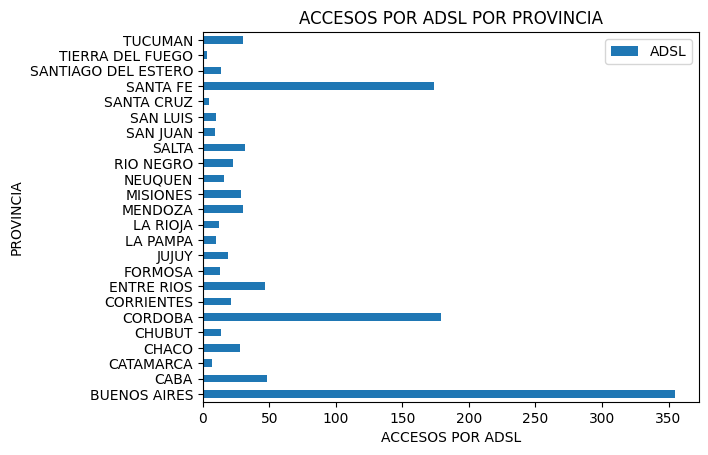

In [149]:
# Agrupa los datos por provincia y tecnología y cuenta el número de accesos a Internet
df_grouped = df_localidad_conectividad.groupby(['Provincia'])[['ADSL']].apply(lambda x: (x == 'SI').sum())

# Grafica los datos con los colores correspondientes
df_grouped.plot(kind='barh')

# Agrega el título al eje x
plt.xlabel('ACCESOS POR ADSL')

# Agrega el título al eje y
plt.ylabel('PROVINCIA')

# Agrega el título al gráfico
plt.title('ACCESOS POR ADSL POR PROVINCIA')

# Muestra el gráfico
plt.show()


Esta gráfico de barra muestra la cantidad de acceso por tecnología ADSL por provincia. En Buenos Aires hubo 355 accesos a internet por tecnología ADSL. En la provincia de Córdoba hubo 179 accesos a internet a través de ADSL. Y en la provinicia de Santa Fe hubo 174 accesos a internet a través de ADSL.

Voy a ver los accesos a internet Cablemódem por provincia

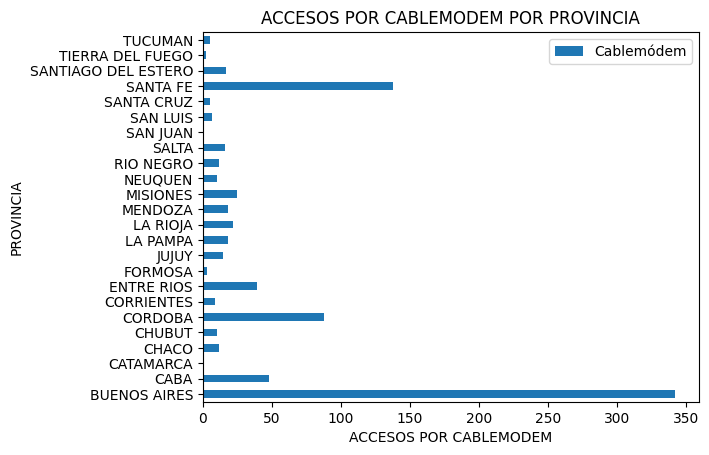

In [151]:
# Agrupo los datos por provincia y tecnología y cuenta el número de accesos a Internet
df_grouped = df_localidad_conectividad.groupby(['Provincia'])[['Cablemódem']].apply(lambda x: (x == 'SI').sum())

# Grafica los datos con los colores correspondientes
df_grouped.plot(kind='barh')

# Agrega el título al eje x
plt.xlabel('ACCESOS POR CABLEMODEM')

# Agrega el título al eje y
plt.ylabel('PROVINCIA')

# Agrega el título al gráfico
plt.title('ACCESOS POR CABLEMODEM POR PROVINCIA')

# Muestra el gráfico
plt.show()


Esta gráfico de barra muestra la cantidad de acceso por tecnología Cablemódem por provincia. En la provincia de Buenos Aires hubo 342 accesos a internet a través de Cablemódem. En la provincia de Santa Fe hubo 138 accesos a internet por cablemódem. En la provincia de Córdoba hubo 88 accesos a internet a través de Cablemódem.

Accesos a internet Dial Up por provincia

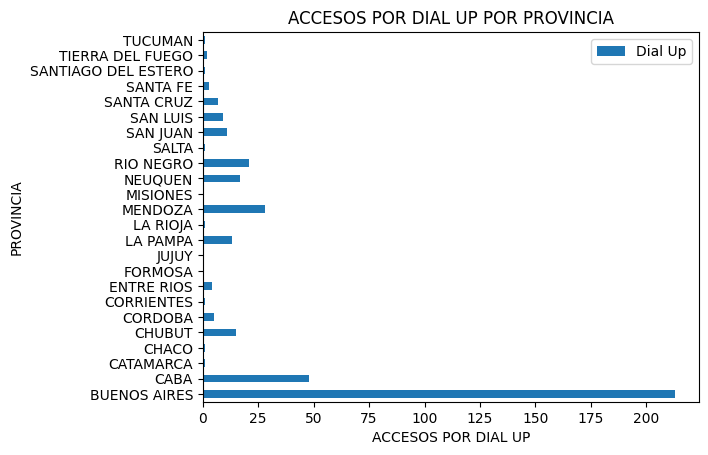

In [153]:
# Agrupo los datos por provincia y tecnología y cuenta el número de accesos a Internet
df_grouped = df_localidad_conectividad.groupby(['Provincia'])[['Dial Up']].apply(lambda x: (x == 'SI').sum())

# Grafica los datos con los colores correspondientes
df_grouped.plot(kind='barh')

# Agrega el título al eje x
plt.xlabel('ACCESOS POR DIAL UP')

# Agrega el título al eje y
plt.ylabel('PROVINCIA')

# Agrega el título al gráfico
plt.title('ACCESOS POR DIAL UP POR PROVINCIA')

# Muestra el gráfico
plt.show()

Este gráfico muestra la cantidad de accesos a internet a través de la tecnología Dial Up. En la provinicia de Buenos Aires hubo 213 accesos a internet a través de dial up. En CABA hubo 48 accesos a internet a través de dial up. Y en la provincia de Mendoza hubo 28 accesos a internet.

Accesos a internet Fibra óptica por provincia

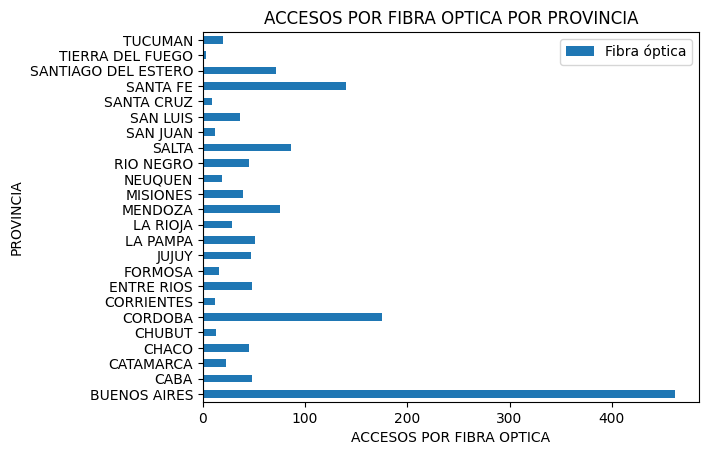

In [155]:
# Agrupo los datos por provincia y tecnología y cuenta el número de accesos a Internet
df_grouped = df_localidad_conectividad.groupby(['Provincia'])[['Fibra óptica']].apply(lambda x: (x == 'SI').sum())

# Grafica los datos con los colores correspondientes
df_grouped.plot(kind='barh')

# Agrega el título al eje x
plt.xlabel('ACCESOS POR FIBRA OPTICA')

# Agrega el título al eje y
plt.ylabel('PROVINCIA')

# Agrega el título al gráfico
plt.title('ACCESOS POR FIBRA OPTICA POR PROVINCIA')

# Muestra el gráfico
plt.show()

Este gráfico muestra los accesos a internet a través de Fibra óptica por provincia. En la provincia de Buenos Aires hubo 462 accesos a internet a través de fibra óptica. En la provincia de Córdoba hubo 175 accesos a internet a través de fibra óptica.

Accesos a internet 4G por provincia

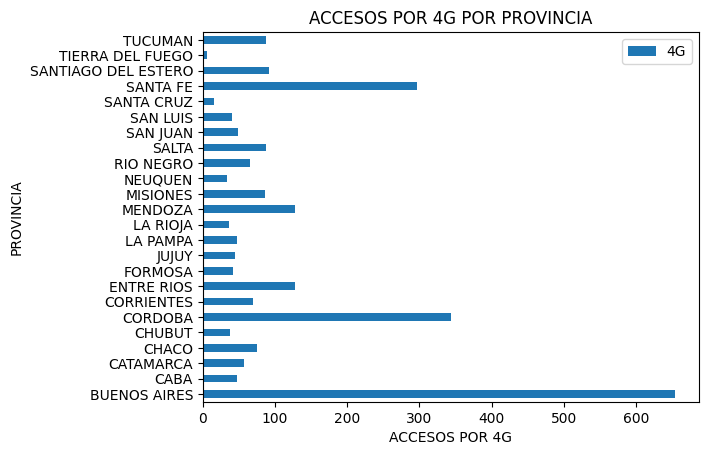

In [157]:
# Agrupo los datos por provincia y tecnología y cuenta el número de accesos a Internet
df_grouped = df_localidad_conectividad.groupby(['Provincia'])[['4G']].apply(lambda x: (x == 'SI').sum())

# Grafica los datos con los colores correspondientes
df_grouped.plot(kind='barh')

# Agrega el título al eje x
plt.xlabel('ACCESOS POR 4G')

# Agrega el título al eje y
plt.ylabel('PROVINCIA')

# Agrega el título al gráfico
plt.title('ACCESOS POR 4G POR PROVINCIA')

# Muestra el gráfico
plt.show()

Este gráfico de barra muestra los accesos a internet a través de 4G por provincia. En la provincia de Buenos Aires hubo 654 accesos a internet a través de 4G. En la provincia de Córdoba hubo 344 accesos a internet a través de 4G. Y en la provincia de Tierra del Fuego hubo 6 accesos a internet a través de 4G.

Accesos a internet 3G por provincia

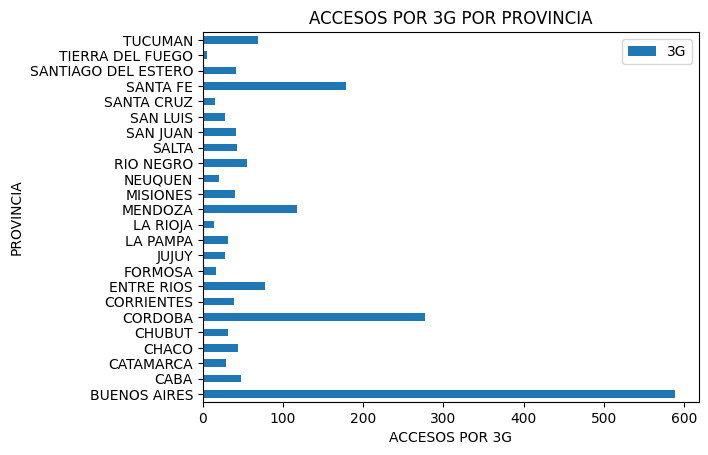

In [160]:
# Agrupo los datos por provincia y tecnología y cuenta el número de accesos a Internet
df_grouped = df_localidad_conectividad.groupby(['Provincia'])[['3G']].apply(lambda x: (x == 'SI').sum())

# Grafica los datos con los colores correspondientes
df_grouped.plot(kind='barh')

# Agrega el título al eje x
plt.xlabel('ACCESOS POR 3G')

# Agrega el título al eje y
plt.ylabel('PROVINCIA')

# Agrega el título al gráfico
plt.title('ACCESOS POR 3G POR PROVINCIA')

# Muestra el gráfico
plt.show()

Este gráfico de barra muestra la cantidad de accesos a internet a través de 3G. En la provincia de Buenos Aires hubo 589 accesos a internet a través de 3G. En la provincia de Córdoba hubo 277 accesos a internet a través de 3G.

Accesos a internet a través de Telefonía Fija por provincia

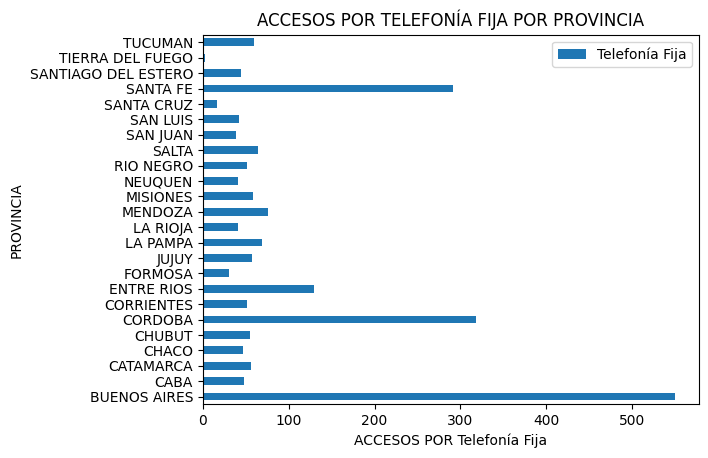

In [162]:
# Agrupo los datos por provincia y tecnología y cuenta el número de accesos a Internet
df_grouped = df_localidad_conectividad.groupby(['Provincia'])[['Telefonía Fija']].apply(lambda x: (x == 'SI').sum())

# Grafica los datos con los colores correspondientes
df_grouped.plot(kind='barh')

# Agrega el título al eje x
plt.xlabel('ACCESOS POR Telefonía Fija')

# Agrega el título al eje y
plt.ylabel('PROVINCIA')

# Agrega el título al gráfico
plt.title('ACCESOS POR TELEFONÍA FIJA POR PROVINCIA')

# Muestra el gráfico
plt.show()

Este gráfico de barra muestra los acceso por telefonía fija por provincia. En la provincia de Buenos Aires hubo 550 accesos a internet a través de telefonía fija. En la provincia de Córdoba hubo 318 accesos a internet a través de telefonia fija.

Accesos a internet a través de Wireless por provincia

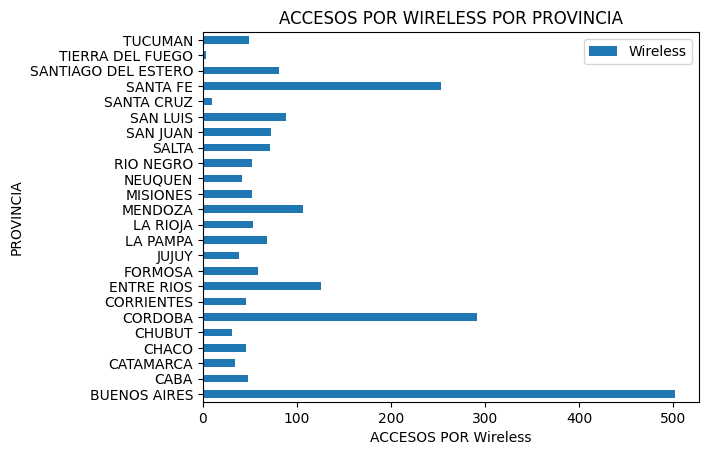

In [164]:
# Agrupo los datos por provincia y tecnología y cuenta el número de accesos a Internet
df_grouped = df_localidad_conectividad.groupby(['Provincia'])[['Wireless']].apply(lambda x: (x == 'SI').sum())

# Grafica los datos con los colores correspondientes
df_grouped.plot(kind='barh')

# Agrega el título al eje x
plt.xlabel('ACCESOS POR Wireless')

# Agrega el título al eje y
plt.ylabel('PROVINCIA')

# Agrega el título al gráfico
plt.title('ACCESOS POR WIRELESS POR PROVINCIA')

# Muestra el gráfico
plt.show()

Este gráfico de barra nos muestra los accesos a internet a través de Wireless por provincia. En la provincia de Buenos Aires hubo 502 accesos a internet a través de Wireless. En la provincia de Córdoba hubo 291 accesos a internet a través de Wireless.


Accesos a través de la modalidad Satelital por provincia

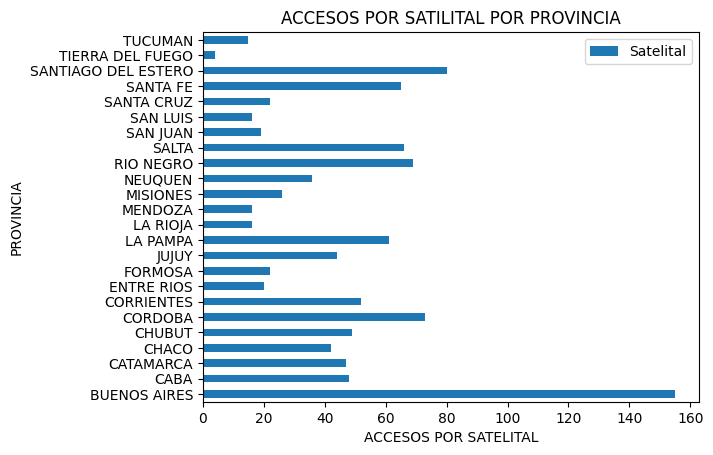

In [166]:
# Agrupo los datos por provincia y tecnología y cuenta el número de accesos a Internet
df_grouped = df_localidad_conectividad.groupby(['Provincia'])[['Satelital']].apply(lambda x: (x == 'SI').sum())

# Grafica los datos con los colores correspondientes
df_grouped.plot(kind='barh')

# Agrega el título al eje x
plt.xlabel('ACCESOS POR SATELITAL')

# Agrega el título al eje y
plt.ylabel('PROVINCIA')

# Agrega el título al gráfico
plt.title('ACCESOS POR SATILITAL POR PROVINCIA')

# Muestra el gráfico
plt.show()

Este gráfico muestra la cantidad de accesos a internet a través de modalidad Satelital. En la provincia de Buenos Aires hubo 155 accesos como a través de modalidad satelital.
En la provincia de Tierra del  Fuego hubo 4 accesos a internet a través de la modalidad satelital.



Voy a mostrar un cuadro con un resumen de los dos primeros dataframe analizados: df_penetracion_internet y df_penetracion_internet_hab

In [33]:
# Leer el archivo de Excel
df = pd.read_excel('../DATA/INTERNET/DATAFRAME 1.xlsx')

# Crear un DataFrame de Pandas a partir de los datos leídos
df_pandas = pd.DataFrame(df)

# Asignar la primera fila como los nombres de las columnas
df.columns = df.iloc[0]

# Eliminar la primera fila
df = df.iloc[1:]

# Mostrar el DataFrame en el archivo Markdown
print(df.to_markdown())

|    | CARACTERISTICAS                                                     | df_penetracion_internet                                                                                | df_penetracion_internet_hab                                                                                 |
|---:|:--------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------------------------|
|  1 | Datos que contiene                                                  | Contiene los accesos a internet por cada 100 hogares por provincia, trimestre y año                    | Contiene los accesos a internete por cada 100 hogares,  accesos por cada 100 habitantes por año y trimestre |
|  2 | Cantidad de filas                                                   | 864 filas                                      

Vamos a ver un resumen de dos dataframe df_Internet_BAF y df_internet_BAF_PCIA

In [34]:
# Leer el archivo de Excel
df = pd.read_excel('../DATA/INTERNET/DATAFRAME 2.xlsx')

# Crear un DataFrame de Pandas a partir de los datos leídos
df_pandas = pd.DataFrame(df)

# Asignar la primera fila como los nombres de las columnas
df.columns = df.iloc[0]

# Eliminar la primera fila
df = df.iloc[1:]

# Mostrar el DataFrame en el archivo Markdown
print(df.to_markdown())

|    | CARACTERISTICAS                                         | df_Internet_BAF                                                    | df_internet_BAF_PCIA                                                          |
|---:|:--------------------------------------------------------|:-------------------------------------------------------------------|:------------------------------------------------------------------------------|
|  1 | Datos que contiene                                      | Numeros de conexiones de banda ancha y dial up por trimestre y año | Número de conexiones de banda ancha y dial up por provincia, trimestre y año  |
|  2 | Cantidad de filas                                       | 36                                                                 | 864                                                                           |
|  3 | Cantidad de columnas                                    | 6                                                                  | 6         

Vamos a ver un resumen del dataframe df_Internet_acceos_por_velocidad

In [35]:
# Leer el archivo de Excel
df = pd.read_excel('../DATA/INTERNET/DATAFRAME 3.xlsx')

# Crear un DataFrame de Pandas a partir de los datos leídos
df_pandas = pd.DataFrame(df)

# Asignar la primera fila como los nombres de las columnas
df.columns = df.iloc[0]

# Eliminar la primera fila
df = df.iloc[1:]

# Mostrar el DataFrame en el archivo Markdown
print(df.to_markdown())

|    | CARACTERISTICAS                                                                 | df_Internet_acceso_por_velocidad                                             |
|---:|:--------------------------------------------------------------------------------|:-----------------------------------------------------------------------------|
|  1 | Datos que contiene                                                              | Información sobre acceso a Internet por provincia, trimestre y por velocidad |
|  2 | Cantidad de filas                                                               | 864                                                                          |
|  3 | Cantidad de columnas                                                            | 12                                                                           |
|  4 | ¿Tiene nulos?                                                                   | No posee nulos                                                         

Resumen del dataframe df_internet_por_tecnologia

In [36]:
# Leer el archivo de Excel
df = pd.read_excel('../DATA/INTERNET/Dataframe 4.xlsx')

# Crear un DataFrame de Pandas a partir de los datos leídos
df_pandas = pd.DataFrame(df)

# Asignar la primera fila como los nombres de las columnas
df.columns = df.iloc[0]

# Eliminar la primera fila
df = df.iloc[1:]

# Mostrar el DataFrame en el archivo Markdown
print(df.to_markdown())

|    | CARACTERISTICAS                                                          | df_internet_por_tecnologia                                                                                |
|---:|:-------------------------------------------------------------------------|:----------------------------------------------------------------------------------------------------------|
|  1 | Datos que contiene                                                       | Distintas modalidades de acceso a internet teniendo en cuenta la tecnología por trimestre y por provincia |
|  2 | Cantidad de filas                                                        | Tiene 864 filas                                                                                           |
|  3 | Cantidad de columnas                                                     | 9 columnas                                                                                                |
|  4 | ¿Tiene nulos?                              

Resumen del Dataframe df_accesos_por_tec_y_localidad

In [38]:
pd.set_option('display.max_rows', None)

In [39]:
# Leer el archivo de Excel
df = pd.read_excel('../DATA/INTERNET/Dataframe 5.xlsx')

# Crear un DataFrame de Pandas a partir de los datos leídos
df_pandas = pd.DataFrame(df)

# Asignar la primera fila como los nombres de las columnas
df.columns = df.iloc[0]

# Eliminar la primera fila
df = df.iloc[1:]

# Mostrar el DataFrame en el archivo Markdown
print(df.to_markdown())

|    | CARACTERISTICAS                                                                                        | df_acceso_por_tec_y_localidad                                                        |
|---:|:-------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------|
|  1 | Datos que contiene                                                                                     | Distintas modalidad de acceso por tecnología y localidades y provincias de Argentina |
|  2 | Cantidad de filas -Cantidada de columnas                                                               | Tiene 3137 filas- Tiene 13 columnas                                                  |
|  3 | ¿Tiene nulos?                                                                                          | No tiene nulos                                                                       |
|  4 

Resumen del Dataframe df_localidad_conectividad

In [40]:
# Leer el archivo de Excel
df = pd.read_excel('../DATA/INTERNET/Dataframe 6.xlsx')

# Crear un DataFrame de Pandas a partir de los datos leídos
df_pandas = pd.DataFrame(df)

# Asignar la primera fila como los nombres de las columnas
df.columns = df.iloc[0]

# Eliminar la primera fila
df = df.iloc[1:]

# Mostrar el DataFrame en el archivo Markdown
print(df.to_markdown())

|    | CARACTERISTICAS                                                        | df_localidad_conectiviadad                                                       |
|---:|:-----------------------------------------------------------------------|:---------------------------------------------------------------------------------|
|  1 | Datos que contiene                                                     | Las conexiones a Internet en sus modalidades, por localidad, partido y provincia |
|  2 | Cantidad de filas                                                      | Posee 4309 filas                                                                 |
|  3 | Cantidad de columnas                                                   | Tiene 12 columnas                                                                |
|  4 | ¿Tiene nulos?                                                          | No posee nulos                                                                   |
|  5 | ¿Tiene duplicad